In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pmlb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gplearn.gplearn.genetic import SymbolicRegressor
from gplearn.gplearn.model import ShapeNN
from temperature import generate_data
import time
import torch
import pickle
from utils import create_df_from_cached_results, load_share_from_checkpoint
from sklearn.metrics import r2_score

In [3]:
df = pmlb.fetch_data('feynman_I_18_12',return_X_y=False)
df = df.sample(200,random_state=0)
X = df[['r','F','theta']].values
y = df['target'].values
X_train = X[:100,:]
X_test = X[100:,:]
y_train = y[:100]
y_test = y[100:]

In [4]:
def test_share(device, n_jobs, population_size, generations, batch_size):
    task = 'regression'
    global_seed = 42

    constructor_dict_ShapeNN = {
        'n_hidden_layers':5,
        'width':10,
        'activation_name':'ELU'
        }

    gp_config = {
        'population_size':population_size,
        'generations':generations,
        'tournament_size':10,
        'function_set':('add','mul','div','shape'),
        'verbose':True,
        'random_state':global_seed,
        'const_range':None,
        'n_jobs':n_jobs,
        'p_crossover':0.4,
        'p_subtree_mutation':0.2,
        'p_point_mutation':0.2,
        'p_hoist_mutation':0.05,
        'p_point_replace':0.2,
        'parsimony_coefficient':0.0,
        'metric': ('mse' if task == 'regression' else 'log loss'),
        'parsimony_coefficient':0.0,
        'optim_dict': {
            'alg':'adam',
            'lr': 1e-2, # tuned automatically
            'max_n_epochs':1000,
            'tol':1e-3,
            'task':task,
            'device':device,
            'batch_size':batch_size,
            'shape_class':ShapeNN,
            'constructor_dict': constructor_dict_ShapeNN,
            'num_workers_dataloader': 0,
            'seed':42
            }
        }

    esr = SymbolicRegressor(**gp_config, categorical_variables={})
    esr.fit(X_train,y_train)
    return esr

In [5]:
t1 = time.time()
share2 = test_share('cpu',1,500,10,1000)
t2 = time.time()
print(f"{t2-t1} seconds")

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
None -> None -> add(X0, X1)
add(X0, X1) | raw_fitness: 86.54783917394467
1
None -> None -> add(X0, shape(X2))
add(X0, shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X0, shape(X2))
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is t

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_2aa50c8e-25cb-42c9-a8c0-941265e33ebe.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2aa50c8e-25cb-42c9-a8c0-941265e33ebe.ckpt
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `

add(X0, shape(X2))
add(X0, shape(X2)) | raw_fitness: 13.54150631744932
2
None -> None -> div(div(shape(X1), shape(X0)), shape(X2))
div(div(shape(X1), shape(X0)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:612: UserWarning: Checkpoint directory C:\PhD\Papers\ExtendedSR\share\checkpoints\2023-01-24T12.04.37 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.000630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d141f2d7-1aba-4880-8d3f-4089100c29bd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d141f2d7-1aba-4880-8d3f-4089100c29bd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(add(X0, shape(X1)), shape(X2)))


div(div(shape(X1), shape(X0)), shape(X2))
div(div(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 67.13542196609545
3
None -> None -> add(X0, X1)
Retrieved score for add(X0, X1)
None -> None -> shape(add(add(X0, shape(X1)), shape(X2)))
shape(add(add(X0, shape(X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_8bc359a4-374e-4e8d-b9be-568fce6a92a8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8bc359a4-374e-4e8d-b9be-568fce6a92a8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(mul(shape(X1), shape(X2))), shape(X0))


shape(add(add(X0, shape(X1)), shape(X2)))
shape(add(add(X0, shape(X1)), shape(X2))) | raw_fitness: 14.927940968805924
4
None -> None -> div(shape(mul(shape(X1), shape(X2))), shape(X0))
div(shape(mul(shape(X1), shape(X2))), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_67270ea2-9d69-4814-93e9-4f6c4600adfe.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_67270ea2-9d69-4814-93e9-4f6c4600adfe.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X1, mul(X2, shape(X0)))


div(shape(mul(shape(X1), shape(X2))), shape(X0))
div(shape(mul(shape(X1), shape(X2))), shape(X0)) | raw_fitness: 55.31606273236801
5
None -> None -> add(X1, mul(X2, shape(X0)))
add(X1, mul(X2, shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.012022644346174132
Restoring states from the checkpoint path at lightning_logs\.lr_find_36ba0e6f-cddf-4227-854c-0b339a58c93d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_36ba0e6f-cddf-4227-854c-0b339a58c93d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(div(shape(X2), X1), X0)


add(X1, mul(X2, shape(X0)))
add(X1, mul(X2, shape(X0))) | raw_fitness: 53.48431676656939
6
None -> None -> add(div(shape(X2), X1), X0)
add(div(shape(X2), X1), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_3bd40c6f-f33e-4d7a-9b42-5d1175f49b17.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3bd40c6f-f33e-4d7a-9b42-5d1175f49b17.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(div(shape(X0), shape(X2)), shape(X1)))


add(div(shape(X2), X1), X0)
add(div(shape(X2), X1), X0) | raw_fitness: 36.264827660745944
7
None -> None -> shape(div(div(shape(X0), shape(X2)), shape(X1)))
shape(div(div(shape(X0), shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_e0ecd9a8-b5df-4c8b-b4e7-7559b7a89b5d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e0ecd9a8-b5df-4c8b-b4e7-7559b7a89b5d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(shape(X2), shape(X1)), shape(X0))


shape(div(div(shape(X0), shape(X2)), shape(X1)))
shape(div(div(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 15.99927274065325
8
None -> None -> mul(mul(shape(X2), shape(X1)), shape(X0))
mul(mul(shape(X2), shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_aa1fc5ac-3bdc-4825-9e82-3a317415bb98.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aa1fc5ac-3bdc-4825-9e82-3a317415bb98.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(X2)


mul(mul(shape(X2), shape(X1)), shape(X0))
mul(mul(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 0.023827149224435438
9
None -> None -> shape(X2)
shape(X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_19c9e3e2-6974-40ed-b48b-e56a07fa0476.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_19c9e3e2-6974-40ed-b48b-e56a07fa0476.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(X2, shape(X1)), shape(X0))


shape(X2)
shape(X2) | raw_fitness: 14.186285528726875
10
None -> None -> div(mul(X2, shape(X1)), shape(X0))
div(mul(X2, shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.006918309709189364
Restoring states from the checkpoint path at lightning_logs\.lr_find_c758040d-b6f0-43a1-81e8-abc656fffb05.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c758040d-b6f0-43a1-81e8-abc656fffb05.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(X2, shape(X1)), X0)


div(mul(X2, shape(X1)), shape(X0))
div(mul(X2, shape(X1)), shape(X0)) | raw_fitness: 72.38661860838532
11
None -> None -> mul(mul(X2, shape(X1)), X0)
mul(mul(X2, shape(X1)), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.01445439770745928
Restoring states from the checkpoint path at lightning_logs\.lr_find_2ecfb82d-d79e-48f6-9199-d463a1fe9d02.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2ecfb82d-d79e-48f6-9199-d463a1fe9d02.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X0), add(X2, X1))


mul(mul(X2, shape(X1)), X0)
mul(mul(X2, shape(X1)), X0) | raw_fitness: 64.97060193296522
12
None -> None -> add(shape(X0), add(X2, X1))
add(shape(X0), add(X2, X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.017378008287493765
Restoring states from the checkpoint path at lightning_logs\.lr_find_b8b50f8a-f005-4f66-b852-6ee237e07935.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b8b50f8a-f005-4f66-b852-6ee237e07935.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(add(X2, X0), shape(X1)))


add(shape(X0), add(X2, X1))
add(shape(X0), add(X2, X1)) | raw_fitness: 77.90872532623354
13
None -> None -> shape(mul(add(X2, X0), shape(X1)))
shape(mul(add(X2, X0), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_03c38710-6c9e-4c3d-a81e-20b37fd519a8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_03c38710-6c9e-4c3d-a81e-20b37fd519a8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X1, div(shape(X0), X2)))


shape(mul(add(X2, X0), shape(X1)))
shape(mul(add(X2, X0), shape(X1))) | raw_fitness: 29.025750340013765
14
None -> None -> shape(add(X1, div(shape(X0), X2)))
shape(add(X1, div(shape(X0), X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_8839031b-935d-4103-b433-18c8bb63fb9e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8839031b-935d-4103-b433-18c8bb63fb9e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X1, add(X0, shape(X2)))


shape(add(X1, div(shape(X0), X2)))
shape(add(X1, div(shape(X0), X2))) | raw_fitness: 16.62160269399872
15
None -> None -> div(X1, add(X0, shape(X2)))
div(X1, add(X0, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.2754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_d17f7b30-0cca-4beb-b0fd-176b918af0e7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d17f7b30-0cca-4beb-b0fd-176b918af0e7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X2, shape(add(shape(X1), X0)))


div(X1, add(X0, shape(X2)))
div(X1, add(X0, shape(X2))) | raw_fitness: 70.46979598924517
16
None -> None -> add(X2, shape(add(shape(X1), X0)))
add(X2, shape(add(shape(X1), X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_97e15ecf-2df7-4649-9355-39d201c27c3d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_97e15ecf-2df7-4649-9355-39d201c27c3d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(X0, X1))


add(X2, shape(add(shape(X1), X0)))
add(X2, shape(add(shape(X1), X0))) | raw_fitness: 85.19569675029639
17
None -> None -> shape(mul(X0, X1))
shape(mul(X0, X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.19054607179632482
Restoring states from the checkpoint path at lightning_logs\.lr_find_d666eafa-a1b6-4293-90dc-224c6964a3c4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d666eafa-a1b6-4293-90dc-224c6964a3c4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(X2), shape(X1))


shape(mul(X0, X1))
shape(mul(X0, X1)) | raw_fitness: 69.29400267892169
18
None -> None -> div(shape(X2), shape(X1))
div(shape(X2), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 88 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_dc388ff4-6652-44e3-8e5f-aca99051e900.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_dc388ff4-6652-44e3-8e5f-aca99051e900.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(X1)


div(shape(X2), shape(X1))
div(shape(X2), shape(X1)) | raw_fitness: 4.888034438604809
19
None -> None -> shape(X1)
shape(X1)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.012022644346174132
Restoring states from the checkpoint path at lightning_logs\.lr_find_c1e31547-01f1-48a1-beaa-1c1eecda60fb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c1e31547-01f1-48a1-beaa-1c1eecda60fb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X1, shape(X0))


shape(X1)
shape(X1) | raw_fitness: 65.63150456608506
20
None -> None -> add(X1, shape(X0))
add(X1, shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_cc388bce-ce0b-485d-a9e0-0a56768e9352.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cc388bce-ce0b-485d-a9e0-0a56768e9352.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(shape(X2), shape(X0)))


add(X1, shape(X0))
add(X1, shape(X0)) | raw_fitness: 67.88765275063983
21
None -> None -> shape(div(shape(X2), shape(X0)))
shape(div(shape(X2), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_10daa40e-6569-4ab1-b7b3-e9e4d2739f7b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_10daa40e-6569-4ab1-b7b3-e9e4d2739f7b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X1, shape(add(shape(X0), X2)))


shape(div(shape(X2), shape(X0)))
shape(div(shape(X2), shape(X0))) | raw_fitness: 5.480584474147715
22
None -> None -> div(X1, shape(add(shape(X0), X2)))
div(X1, shape(add(shape(X0), X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.006918309709189364
Restoring states from the checkpoint path at lightning_logs\.lr_find_11ae876d-9881-4d25-9550-941038ae1b2f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_11ae876d-9881-4d25-9550-941038ae1b2f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X2), shape(div(X0, X1)))


div(X1, shape(add(shape(X0), X2)))
div(X1, shape(add(shape(X0), X2))) | raw_fitness: 45.94368284956003
23
None -> None -> mul(shape(X2), shape(div(X0, X1)))
mul(shape(X2), shape(div(X0, X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_7ab49f68-a335-4ac5-9da0-0dcffbb4c834.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7ab49f68-a335-4ac5-9da0-0dcffbb4c834.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X2), shape(X0))


mul(shape(X2), shape(div(X0, X1)))
mul(shape(X2), shape(div(X0, X1))) | raw_fitness: 15.829180405247024
24
None -> None -> mul(shape(X2), shape(X0))
mul(shape(X2), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.47863009232263803
Restoring states from the checkpoint path at lightning_logs\.lr_find_9a863643-f7bc-477f-bd30-37c04c017225.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9a863643-f7bc-477f-bd30-37c04c017225.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(shape(X1), shape(X2)), shape(X0))


mul(shape(X2), shape(X0))
mul(shape(X2), shape(X0)) | raw_fitness: 1444.8042239379884
25
None -> None -> mul(div(X0, X2), X1)
mul(div(X0, X2), X1) | raw_fitness: 4189.473209344642
26
None -> None -> mul(add(shape(X1), shape(X2)), shape(X0))
mul(add(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_dadbbe0a-c7dd-41b5-ad30-29c98456850c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_dadbbe0a-c7dd-41b5-ad30-29c98456850c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(div(shape(X0), shape(X2)), shape(X1))


mul(add(shape(X1), shape(X2)), shape(X0))
mul(add(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 5.265320822025679
27
None -> None -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
None -> None -> add(div(shape(X0), shape(X2)), shape(X1))
add(div(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_e7b189a9-25d0-488f-bc08-f4ac182fc593.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e7b189a9-25d0-488f-bc08-f4ac182fc593.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X1, shape(X2))


add(div(shape(X0), shape(X2)), shape(X1))
add(div(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 30.610241440352983
28
None -> None -> add(X1, shape(X2))
add(X1, shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_b82d4f46-be6e-425a-ade7-047a3bd944f4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b82d4f46-be6e-425a-ade7-047a3bd944f4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(div(shape(X2), X0)), shape(X1))


add(X1, shape(X2))
add(X1, shape(X2)) | raw_fitness: 14.352965518103447
29
None -> None -> mul(shape(div(shape(X2), X0)), shape(X1))
mul(shape(div(shape(X2), X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_b519cead-c68f-4c74-b11f-9ced96afb4ec.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b519cead-c68f-4c74-b11f-9ced96afb4ec.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(X0)


mul(shape(div(shape(X2), X0)), shape(X1))
mul(shape(div(shape(X2), X0)), shape(X1)) | raw_fitness: 0.809807347257447
30
None -> None -> shape(X0)
shape(X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.13182567385564073
Restoring states from the checkpoint path at lightning_logs\.lr_find_20f8cd81-2ab1-40a3-8dc8-b6d7c97ba16f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_20f8cd81-2ab1-40a3-8dc8-b6d7c97ba16f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(X0, X1), shape(X2))


shape(X0)
shape(X0) | raw_fitness: 64.97292019588407
31
None -> None -> mul(add(X0, X1), shape(X2))
mul(add(X0, X1), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_66cd6509-f573-437d-9143-86024ee16fdd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_66cd6509-f573-437d-9143-86024ee16fdd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(X1), shape(X2)))


mul(add(X0, X1), shape(X2))
mul(add(X0, X1), shape(X2)) | raw_fitness: 3.656762791585352
32
None -> None -> shape(mul(shape(X1), shape(X2)))
shape(mul(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_00cd596b-b714-459f-ac82-3b4200bf5699.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_00cd596b-b714-459f-ac82-3b4200bf5699.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(shape(X0), shape(X1)), shape(X2))


shape(mul(shape(X1), shape(X2)))
shape(mul(shape(X1), shape(X2))) | raw_fitness: 4.711513838235751
33
None -> None -> div(mul(shape(X0), shape(X1)), shape(X2))
div(mul(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0003019951720402019
Restoring states from the checkpoint path at lightning_logs\.lr_find_aac633ce-1ed6-4779-a794-bb4999eb51ab.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aac633ce-1ed6-4779-a794-bb4999eb51ab.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X1), shape(X0))


div(mul(shape(X0), shape(X1)), shape(X2))
div(mul(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 34.38711348261888
34
None -> None -> add(shape(X1), shape(X0))
add(shape(X1), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.15848931924611143
Restoring states from the checkpoint path at lightning_logs\.lr_find_89754c9d-8136-44e5-a0fe-a8e0b33b2741.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_89754c9d-8136-44e5-a0fe-a8e0b33b2741.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(add(shape(X0), shape(X1)), shape(X2))


add(shape(X1), shape(X0))
add(shape(X1), shape(X0)) | raw_fitness: 67.85172565690007
35
None -> None -> add(add(shape(X0), shape(X1)), shape(X2))
add(add(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_25edc2bb-87d8-4aed-9b9c-dd3b683467d0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_25edc2bb-87d8-4aed-9b9c-dd3b683467d0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(div(shape(X0), shape(X1)), shape(X2))


add(add(shape(X0), shape(X1)), shape(X2))
add(add(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 10.078771443329273
36
None -> None -> add(div(shape(X0), shape(X1)), shape(X2))
add(div(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_81263ba1-8036-47ce-b105-315378fce6ed.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_81263ba1-8036-47ce-b105-315378fce6ed.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(shape(X0), shape(X2)), shape(X1)))


add(div(shape(X0), shape(X1)), shape(X2))
add(div(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 13.90541259478312
37
None -> None -> shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
shape(mul(mul(shape(X0), shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.15848931924611143
Restoring states from the checkpoint path at lightning_logs\.lr_find_3aa6bafc-bc54-4cd6-a02b-77a6dab17402.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3aa6bafc-bc54-4cd6-a02b-77a6dab17402.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X2, shape(X0))


shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
shape(mul(mul(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 68.94412830205401
38
None -> None -> add(X2, shape(X0))
add(X2, shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_a8b00e8f-56ad-49b0-8cc6-d2908ba378b9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a8b00e8f-56ad-49b0-8cc6-d2908ba378b9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(shape(X0), shape(X2)), shape(X1))


add(X2, shape(X0))
add(X2, shape(X0)) | raw_fitness: 87.36067016485963
39
None -> None -> mul(X2, X0)
mul(X2, X0) | raw_fitness: 177.61145887706428
40
None -> None -> mul(div(shape(X0), shape(X2)), shape(X1))
mul(div(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 91 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_bb905506-bbaf-415f-b190-000848fe17b3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bb905506-bbaf-415f-b190-000848fe17b3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(shape(X0), shape(X1)), shape(X2))


mul(div(shape(X0), shape(X2)), shape(X1))
mul(div(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 51.47027815765003
41
None -> None -> mul(add(shape(X0), shape(X1)), shape(X2))
mul(add(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.017378008287493765
Restoring states from the checkpoint path at lightning_logs\.lr_find_125da4e1-8625-4727-8970-b68a161290ba.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_125da4e1-8625-4727-8970-b68a161290ba.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X2, mul(X0, X1)))


mul(add(shape(X0), shape(X1)), shape(X2))
mul(add(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 0.5426497713404774
42
None -> None -> shape(add(X2, mul(X0, X1)))
shape(add(X2, mul(X0, X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_1655651f-bf6f-4399-94a3-a47304212331.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1655651f-bf6f-4399-94a3-a47304212331.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(X0), shape(X2))


shape(add(X2, mul(X0, X1)))
shape(add(X2, mul(X0, X1))) | raw_fitness: 64.43638191984036
43
None -> None -> add(X0, X1)
Retrieved score for add(X0, X1)
None -> None -> div(shape(X0), shape(X2))
div(shape(X0), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_22351186-edd5-4b77-8049-9dc1ad1d27fa.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_22351186-edd5-4b77-8049-9dc1ad1d27fa.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(add(shape(X0), shape(X1))), shape(X2))


div(shape(X0), shape(X2))
div(shape(X0), shape(X2)) | raw_fitness: 65.7696240733564
44
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> add(shape(add(shape(X0), shape(X1))), shape(X2))
add(shape(add(shape(X0), shape(X1))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_0c7f308b-fb84-4970-a83d-0c684493c859.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0c7f308b-fb84-4970-a83d-0c684493c859.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(shape(X1), shape(X2)), shape(X0))


add(shape(add(shape(X0), shape(X1))), shape(X2))
add(shape(add(shape(X0), shape(X1))), shape(X2)) | raw_fitness: 13.110834869699465
45
None -> None -> div(mul(shape(X1), shape(X2)), shape(X0))
div(mul(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.3311311214825908
Restoring states from the checkpoint path at lightning_logs\.lr_find_81fa6b8b-89ef-419c-b1f1-8f90d9a2f572.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_81fa6b8b-89ef-419c-b1f1-8f90d9a2f572.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(X2), shape(X0))


div(mul(shape(X1), shape(X2)), shape(X0))
div(mul(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 64.3901034143567
46
None -> None -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
None -> None -> div(shape(X2), shape(X0))
div(shape(X2), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_91073c4e-b005-4818-b0a4-921af6d821a8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_91073c4e-b005-4818-b0a4-921af6d821a8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(X2), X1)


div(shape(X2), shape(X0))
div(shape(X2), shape(X0)) | raw_fitness: 67.48681372829697
47
None -> None -> div(shape(X2), X1)
div(shape(X2), X1)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_542a1dd3-5e49-4627-969f-4523ca7cc3fe.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_542a1dd3-5e49-4627-969f-4523ca7cc3fe.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, div(shape(X1), X2))


div(shape(X2), X1)
div(shape(X2), X1) | raw_fitness: 38.93881920542481
48
None -> None -> mul(X0, div(shape(X1), X2))
mul(X0, div(shape(X1), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_0bd17caf-3701-473f-8eeb-b41a6ad635ca.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0bd17caf-3701-473f-8eeb-b41a6ad635ca.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(mul(shape(X1), X2), shape(X0))


mul(X0, div(shape(X1), X2))
mul(X0, div(shape(X1), X2)) | raw_fitness: 72.09143552224151
49
None -> None -> add(mul(shape(X1), X2), shape(X0))
add(mul(shape(X1), X2), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_8ccc08a2-095a-481d-ba2c-d6e635806c01.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8ccc08a2-095a-481d-ba2c-d6e635806c01.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X1, add(shape(X2), X0))


add(mul(shape(X1), X2), shape(X0))
add(mul(shape(X1), X2), shape(X0)) | raw_fitness: 39.00788492682033
50
None -> None -> div(X1, add(shape(X2), X0))
div(X1, add(shape(X2), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.2754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_e13e5565-f1b7-4c89-b8c7-149b80c6970f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e13e5565-f1b7-4c89-b8c7-149b80c6970f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(div(shape(X1), shape(X0)), shape(X2)))


div(X1, add(shape(X2), X0))
div(X1, add(shape(X2), X0)) | raw_fitness: 70.46979598924517
51
None -> None -> add(X0, add(X2, X1))
add(X0, add(X2, X1)) | raw_fitness: 128.7950729244575
52
None -> None -> shape(add(div(shape(X1), shape(X0)), shape(X2)))
shape(add(div(shape(X1), shape(X0)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_b2590442-b226-49f8-858d-ebbb9501ffc4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b2590442-b226-49f8-858d-ebbb9501ffc4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(div(shape(X2), shape(X0))), shape(X1))


shape(add(div(shape(X1), shape(X0)), shape(X2)))
shape(add(div(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 23.329544082731008
53
None -> None -> mul(shape(div(shape(X2), shape(X0))), shape(X1))
mul(shape(div(shape(X2), shape(X0))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_280427bb-4c58-44aa-8825-09e984477d74.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_280427bb-4c58-44aa-8825-09e984477d74.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X2, shape(div(X0, X1)))


mul(shape(div(shape(X2), shape(X0))), shape(X1))
mul(shape(div(shape(X2), shape(X0))), shape(X1)) | raw_fitness: 0.02445869457518654
54
None -> None -> mul(X2, shape(div(X0, X1)))
mul(X2, shape(div(X0, X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.008317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_de9d244c-bb83-4a6a-9afe-13e9c7e184dc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_de9d244c-bb83-4a6a-9afe-13e9c7e184dc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, shape(X1))


mul(X2, shape(div(X0, X1)))
mul(X2, shape(div(X0, X1))) | raw_fitness: 70.48082986965775
55
None -> None -> mul(X0, shape(X1))
mul(X0, shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.006918309709189364
Restoring states from the checkpoint path at lightning_logs\.lr_find_1b14bfd2-d497-48e5-bf21-bcc0eb5e823f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1b14bfd2-d497-48e5-bf21-bcc0eb5e823f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X1), X0)


mul(X0, shape(X1))
mul(X0, shape(X1)) | raw_fitness: 64.38199753950467
56
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> mul(shape(X1), X0)
mul(shape(X1), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.006918309709189364
Restoring states from the checkpoint path at lightning_logs\.lr_find_8f367616-1151-4f8c-8202-ccc94f06f9dd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8f367616-1151-4f8c-8202-ccc94f06f9dd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(shape(X1), shape(X0)), shape(X2))


mul(shape(X1), X0)
mul(shape(X1), X0) | raw_fitness: 64.38199753950467
57
None -> None -> mul(mul(shape(X1), shape(X0)), shape(X2))
mul(mul(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.017378008287493765
Restoring states from the checkpoint path at lightning_logs\.lr_find_f8bdee53-ee45-46ff-a9fb-18b7847e6965.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f8bdee53-ee45-46ff-a9fb-18b7847e6965.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(div(shape(X0), shape(X1)), shape(X2))


mul(mul(shape(X1), shape(X0)), shape(X2))
mul(mul(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 0.03667813283209185
58
None -> None -> div(div(shape(X0), shape(X1)), shape(X2))
div(div(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.000630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e4d2681f-cef0-4e18-9f28-05135f93f68d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e4d2681f-cef0-4e18-9f28-05135f93f68d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X0, add(X2, shape(X1)))


div(div(shape(X0), shape(X1)), shape(X2))
div(div(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 67.16095302943548
59
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> add(X0, add(X2, shape(X1)))
add(X0, add(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.017378008287493765
Restoring states from the checkpoint path at lightning_logs\.lr_find_c4c3ef77-efa0-41e0-bb76-dd270dbf6589.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c4c3ef77-efa0-41e0-bb76-dd270dbf6589.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(div(shape(X0), shape(X2)), shape(X1)))


add(X0, add(X2, shape(X1)))
add(X0, add(X2, shape(X1))) | raw_fitness: 85.85997062329886
60
None -> None -> shape(add(div(shape(X0), shape(X2)), shape(X1)))
shape(add(div(shape(X0), shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_64bedf58-742f-4a9f-abed-824c7be5d0fb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_64bedf58-742f-4a9f-abed-824c7be5d0fb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X1, shape(X2)))


shape(add(div(shape(X0), shape(X2)), shape(X1)))
shape(add(div(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 79.93394905854016
61
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> add(X1, mul(X2, shape(X0)))
Retrieved score for add(X1, mul(X2, shape(X0)))
None -> None -> shape(add(X1, shape(X2)))
shape(add(X1, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_3a55f31a-5315-4d37-b1cc-70c5a68ae775.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3a55f31a-5315-4d37-b1cc-70c5a68ae775.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(shape(X0), shape(X2)))


shape(add(X1, shape(X2)))
shape(add(X1, shape(X2))) | raw_fitness: 13.685090230502247
62
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(div(shape(X0), shape(X2)))
shape(div(shape(X0), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_86a9da7a-7ff0-4534-b10e-96e6e33a7c07.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_86a9da7a-7ff0-4534-b10e-96e6e33a7c07.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(X0), shape(X2)))


shape(div(shape(X0), shape(X2)))
shape(div(shape(X0), shape(X2))) | raw_fitness: 48.764455519920446
63
None -> None -> shape(mul(shape(X0), shape(X2)))
shape(mul(shape(X0), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6cb92c32-a9a4-40b6-8922-8d1587e1617f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6cb92c32-a9a4-40b6-8922-8d1587e1617f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X1, mul(shape(X0), X2))


shape(mul(shape(X0), shape(X2)))
shape(mul(shape(X0), shape(X2))) | raw_fitness: 20.787370081886184
64
None -> None -> mul(X2, X0)
Retrieved score for mul(X2, X0)
None -> None -> mul(X1, mul(shape(X0), X2))
mul(X1, mul(shape(X0), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_fc224817-9eda-40fa-9cb4-4b3bc4176474.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fc224817-9eda-40fa-9cb4-4b3bc4176474.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X0), shape(X1))


mul(X1, mul(shape(X0), X2))
mul(X1, mul(shape(X0), X2)) | raw_fitness: 71.23124500006372
65
None -> None -> mul(shape(X0), shape(X1))
mul(shape(X0), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_06a8266c-ec5f-440c-b60d-28ff73db9d77.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_06a8266c-ec5f-440c-b60d-28ff73db9d77.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X2), shape(X0))


mul(shape(X0), shape(X1))
mul(shape(X0), shape(X1)) | raw_fitness: 67.9058111326769
66
None -> None -> div(X0, X1)
div(X0, X1) | raw_fitness: 70.03032703539357
67
None -> None -> add(shape(X2), shape(X0))
add(shape(X2), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_09c443b1-12a4-4c32-b52a-a622745b49bc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_09c443b1-12a4-4c32-b52a-a622745b49bc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(div(shape(X2), shape(X0)), shape(X1)))


add(shape(X2), shape(X0))
add(shape(X2), shape(X0)) | raw_fitness: 13.939988940648618
68
None -> None -> shape(add(div(shape(X2), shape(X0)), shape(X1)))
shape(add(div(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_8619ddd8-edac-42cc-829d-92631f815621.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8619ddd8-edac-42cc-829d-92631f815621.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(X0, shape(X2)), shape(X1))


shape(add(div(shape(X2), shape(X0)), shape(X1)))
shape(add(div(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 68.54973932047841
69
None -> None -> add(X0, X1)
Retrieved score for add(X0, X1)
None -> None -> div(mul(X0, shape(X2)), shape(X1))
div(mul(X0, shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_f01c42c6-3f4b-4e98-9871-c3908a4c7dd4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f01c42c6-3f4b-4e98-9871-c3908a4c7dd4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X0), add(X2, shape(X1)))


div(mul(X0, shape(X2)), shape(X1))
div(mul(X0, shape(X2)), shape(X1)) | raw_fitness: 72.63440775863826
70
None -> None -> add(shape(X0), add(X2, shape(X1)))
add(shape(X0), add(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_a138481f-efa2-44ea-827c-05cc04a05167.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a138481f-efa2-44ea-827c-05cc04a05167.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(div(shape(X1), X2), X0)


add(shape(X0), add(X2, shape(X1)))
add(shape(X0), add(X2, shape(X1))) | raw_fitness: 87.63040020074695
71
None -> None -> add(div(shape(X1), X2), X0)
add(div(shape(X1), X2), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.13182567385564073
Restoring states from the checkpoint path at lightning_logs\.lr_find_71d6f158-4af7-4430-8ca6-b8ccdb194893.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_71d6f158-4af7-4430-8ca6-b8ccdb194893.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(X1), shape(X2)))


add(div(shape(X1), X2), X0)
add(div(shape(X1), X2), X0) | raw_fitness: 68.47384135092565
72
None -> None -> shape(add(shape(X1), shape(X2)))
shape(add(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_7e64f638-5eac-4acd-ac95-eef8e6665e30.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7e64f638-5eac-4acd-ac95-eef8e6665e30.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X2, shape(mul(shape(X0), X1))))


shape(add(shape(X1), shape(X2)))
shape(add(shape(X1), shape(X2))) | raw_fitness: 8.597916998028376
73
None -> None -> div(shape(X0), shape(X2))
Retrieved score for div(shape(X0), shape(X2))
None -> None -> shape(add(X2, shape(mul(shape(X0), X1))))
shape(add(X2, shape(mul(shape(X0), X1))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_9a236d04-90eb-44f1-a7a5-fae793b11202.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9a236d04-90eb-44f1-a7a5-fae793b11202.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(div(shape(X2), shape(X1)), shape(X0))


shape(add(X2, shape(mul(shape(X0), X1))))
shape(add(X2, shape(mul(shape(X0), X1)))) | raw_fitness: 19.15116131180199
74
None -> None -> add(div(shape(X2), shape(X1)), shape(X0))
add(div(shape(X2), shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.00478630092322638
Restoring states from the checkpoint path at lightning_logs\.lr_find_995f554f-71de-433d-bcbb-ca3cb70dfcf1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_995f554f-71de-433d-bcbb-ca3cb70dfcf1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(div(shape(X2), shape(X1)), shape(X0)))


add(div(shape(X2), shape(X1)), shape(X0))
add(div(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 67.58415259932052
75
None -> None -> shape(add(div(shape(X2), shape(X1)), shape(X0)))
shape(add(div(shape(X2), shape(X1)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_5ab75c61-e0aa-4011-8b8a-9d79bccbc4f1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5ab75c61-e0aa-4011-8b8a-9d79bccbc4f1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(X1, shape(X0)))


shape(add(div(shape(X2), shape(X1)), shape(X0)))
shape(add(div(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 69.19092294275761
76
None -> None -> shape(mul(X1, shape(X0)))
shape(mul(X1, shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_5d5c3ca1-1c6c-4ef6-bb48-b4b2a419164a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5d5c3ca1-1c6c-4ef6-bb48-b4b2a419164a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X0, add(X2, X1)))


shape(mul(X1, shape(X0)))
shape(mul(X1, shape(X0))) | raw_fitness: 67.4962641718204
77
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(add(X0, add(X2, X1)))
shape(add(X0, add(X2, X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_f7f76f50-296a-4387-afe1-0227e19abd30.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f7f76f50-296a-4387-afe1-0227e19abd30.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(add(shape(X1), shape(X0)), shape(X2))


shape(add(X0, add(X2, X1)))
shape(add(X0, add(X2, X1))) | raw_fitness: 35.459692740240136
78
None -> None -> div(add(shape(X1), shape(X0)), shape(X2))
div(add(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0010964781961431851
Restoring states from the checkpoint path at lightning_logs\.lr_find_fcc35adb-d719-4ef7-b946-a605aab48063.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fcc35adb-d719-4ef7-b946-a605aab48063.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(div(shape(X0), shape(X2)), shape(X1))


div(add(shape(X1), shape(X0)), shape(X2))
div(add(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 33.470210079189854
79
None -> None -> div(div(shape(X0), shape(X2)), shape(X1))
div(div(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.000630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_875ba2c5-98c3-4c78-9eea-c0996a19b4d3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_875ba2c5-98c3-4c78-9eea-c0996a19b4d3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(mul(shape(X0), shape(X2)), shape(X1))


div(div(shape(X0), shape(X2)), shape(X1))
div(div(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 73.60284584015608
80
None -> None -> add(mul(shape(X0), shape(X2)), shape(X1))
add(mul(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_9771139c-74e0-4973-9212-8634022c2746.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9771139c-74e0-4973-9212-8634022c2746.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X0), mul(X1, shape(X2)))


add(mul(shape(X0), shape(X2)), shape(X1))
add(mul(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 5.949826559906844
81
None -> None -> mul(shape(X0), mul(X1, shape(X2)))
mul(shape(X0), mul(X1, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_e22e3ce9-8aa6-4727-841e-e0e9abad9308.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e22e3ce9-8aa6-4727-841e-e0e9abad9308.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(add(X0, X1), X2))


mul(shape(X0), mul(X1, shape(X2)))
mul(shape(X0), mul(X1, shape(X2))) | raw_fitness: 0.026104937459199392
82
None -> None -> shape(add(add(X0, X1), X2))
shape(add(add(X0, X1), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_55e30de5-d7bd-4e22-80eb-34da0c3b214c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_55e30de5-d7bd-4e22-80eb-34da0c3b214c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(add(shape(X2), shape(X0))), shape(X1))


shape(add(add(X0, X1), X2))
shape(add(add(X0, X1), X2)) | raw_fitness: 35.461592172784734
83
None -> None -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
None -> None -> add(shape(add(shape(X2), shape(X0))), shape(X1))
add(shape(add(shape(X2), shape(X0))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_67a23979-1890-46b5-9916-8c84fb3881cc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_67a23979-1890-46b5-9916-8c84fb3881cc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(X0), shape(X1))


add(shape(add(shape(X2), shape(X0))), shape(X1))
add(shape(add(shape(X2), shape(X0))), shape(X1)) | raw_fitness: 8.8992688568827
84
None -> None -> div(shape(X0), shape(X1))
div(shape(X0), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.19054607179632482
Restoring states from the checkpoint path at lightning_logs\.lr_find_c03539e2-0225-4d22-a695-3e542bd69c7e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c03539e2-0225-4d22-a695-3e542bd69c7e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(add(shape(X0), shape(X1)), shape(X2)))


div(shape(X0), shape(X1))
div(shape(X0), shape(X1)) | raw_fitness: 68.15653711237013
85
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(add(add(shape(X0), shape(X1)), shape(X2)))
shape(add(add(shape(X0), shape(X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_b727e0ff-c061-4b02-88e9-1aa45e8f151b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b727e0ff-c061-4b02-88e9-1aa45e8f151b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(div(shape(X2), shape(X1))), shape(X0))


shape(add(add(shape(X0), shape(X1)), shape(X2)))
shape(add(add(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 4.565258220561682
86
None -> None -> div(shape(div(shape(X2), shape(X1))), shape(X0))
div(shape(div(shape(X2), shape(X1))), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_facd093e-089d-4e29-85e2-044c6b81c764.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_facd093e-089d-4e29-85e2-044c6b81c764.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X0), shape(X1))


div(shape(div(shape(X2), shape(X1))), shape(X0))
div(shape(div(shape(X2), shape(X1))), shape(X0)) | raw_fitness: 59.79277025709585
87
None -> None -> add(shape(X0), shape(X1))
add(shape(X0), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_106dfcca-68b3-41aa-9244-7d46b94903f6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_106dfcca-68b3-41aa-9244-7d46b94903f6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X0), X2)


add(shape(X0), shape(X1))
add(shape(X0), shape(X1)) | raw_fitness: 69.41003153064521
88
None -> None -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
None -> None -> mul(shape(X0), X2)
mul(shape(X0), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_7667f9aa-4446-4b77-8f36-3f654ba9b38b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7667f9aa-4446-4b77-8f36-3f654ba9b38b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(mul(X1, shape(X0)), shape(X2))


mul(shape(X0), X2)
mul(shape(X0), X2) | raw_fitness: 150.42637226793914
89
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> add(mul(X1, shape(X0)), shape(X2))
add(mul(X1, shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_d707ad0a-732d-4d8b-ae2a-1dd9debb8f98.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d707ad0a-732d-4d8b-ae2a-1dd9debb8f98.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X0), shape(X2))


add(mul(X1, shape(X0)), shape(X2))
add(mul(X1, shape(X0)), shape(X2)) | raw_fitness: 12.770689417294706
90
None -> None -> mul(shape(X0), shape(X2))
mul(shape(X0), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_29cf02c7-43e7-417f-8bb2-ab1b6e803486.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_29cf02c7-43e7-417f-8bb2-ab1b6e803486.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X2, shape(X1))


mul(shape(X0), shape(X2))
mul(shape(X0), shape(X2)) | raw_fitness: 5.553974033390404
91
None -> None -> div(X2, shape(X1))
div(X2, shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.00478630092322638
Restoring states from the checkpoint path at lightning_logs\.lr_find_56003950-bfa2-4bfe-ab54-d9fbdfc8763d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_56003950-bfa2-4bfe-ab54-d9fbdfc8763d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(div(shape(X0), shape(X1))), shape(X2))


div(X2, shape(X1))
div(X2, shape(X1)) | raw_fitness: 69.26670494627207
92
None -> None -> add(shape(div(shape(X0), shape(X1))), shape(X2))
add(shape(div(shape(X0), shape(X1))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_e38fd95d-230f-404a-ba1e-2e680c6485c5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e38fd95d-230f-404a-ba1e-2e680c6485c5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X2), shape(X1))


add(shape(div(shape(X0), shape(X1))), shape(X2))
add(shape(div(shape(X0), shape(X1))), shape(X2)) | raw_fitness: 13.603143026445832
93
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> mul(shape(X2), shape(X1))
mul(shape(X2), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_165241e1-ae0b-4536-9caf-aea05a4d7d33.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_165241e1-ae0b-4536-9caf-aea05a4d7d33.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(shape(X2), shape(X1)), shape(X0))


mul(shape(X2), shape(X1))
mul(shape(X2), shape(X1)) | raw_fitness: 4.713789337793714
94
None -> None -> div(mul(shape(X2), shape(X1)), shape(X0))
div(mul(shape(X2), shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_d1e878fb-31d6-4944-8c73-d1e2d2799c6c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d1e878fb-31d6-4944-8c73-d1e2d2799c6c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X1), shape(X2))


div(mul(shape(X2), shape(X1)), shape(X0))
div(mul(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 4.768439115640121
95
None -> None -> mul(shape(X1), shape(X2))
mul(shape(X1), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_bfc879a1-4e70-47ba-995f-732a2e9caaad.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bfc879a1-4e70-47ba-995f-732a2e9caaad.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X2, add(X1, shape(X0)))


mul(shape(X1), shape(X2))
mul(shape(X1), shape(X2)) | raw_fitness: 4.535959954808095
96
None -> None -> div(X2, add(X1, shape(X0)))
div(X2, add(X1, shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_e3925b2b-23cf-4284-96f5-9470215ce7fa.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e3925b2b-23cf-4284-96f5-9470215ce7fa.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(add(X1, shape(X0)), X2))


div(X2, add(X1, shape(X0)))
div(X2, add(X1, shape(X0))) | raw_fitness: 72.68028535276652
97
None -> None -> shape(div(add(X1, shape(X0)), X2))
shape(div(add(X1, shape(X0)), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_5b9d13dc-56aa-40ee-820c-fa21161929a3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5b9d13dc-56aa-40ee-820c-fa21161929a3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(mul(shape(X2), shape(X0)), shape(X1)))


shape(div(add(X1, shape(X0)), X2))
shape(div(add(X1, shape(X0)), X2)) | raw_fitness: 16.13333658999298
98
None -> None -> shape(add(mul(shape(X2), shape(X0)), shape(X1)))
shape(add(mul(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_7c72639b-e4d1-4bd4-b8a9-7aaa432c2fe5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7c72639b-e4d1-4bd4-b8a9-7aaa432c2fe5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(add(shape(X0), shape(X1)), shape(X2))


shape(add(mul(shape(X2), shape(X0)), shape(X1)))
shape(add(mul(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 2.795101066899879
99
None -> None -> add(add(X0, X1), X2)
add(add(X0, X1), X2) | raw_fitness: 128.79507377859204
100
None -> None -> div(add(shape(X0), shape(X1)), shape(X2))
div(add(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0010964781961431851
Restoring states from the checkpoint path at lightning_logs\.lr_find_609681e2-a469-4d66-ab88-dc4707674828.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_609681e2-a469-4d66-ab88-dc4707674828.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(div(shape(X2), shape(X0)), shape(X1)))


div(add(shape(X0), shape(X1)), shape(X2))
div(add(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 32.20948111274279
101
None -> None -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.13182567385564073
Restoring states from the checkpoint path at lightning_logs\.lr_find_18f525c5-e177-4c7d-86ed-b9c03d391bf9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_18f525c5-e177-4c7d-86ed-b9c03d391bf9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, div(X2, shape(X1)))


shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 0.02009166459872233
102
None -> None -> mul(X0, div(X2, shape(X1)))
mul(X0, div(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_95b04103-a400-46b3-8cbd-b55e2f0286ec.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_95b04103-a400-46b3-8cbd-b55e2f0286ec.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(mul(shape(X2), shape(X0))), shape(X1))


mul(X0, div(X2, shape(X1)))
mul(X0, div(X2, shape(X1))) | raw_fitness: 70.79502193555236
103
None -> None -> div(shape(mul(shape(X2), shape(X0))), shape(X1))
div(shape(mul(shape(X2), shape(X0))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_979b0b34-4d16-4628-8b16-9bb7c1a5e6f8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_979b0b34-4d16-4628-8b16-9bb7c1a5e6f8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(shape(X1), shape(X0)), shape(X2))


div(shape(mul(shape(X2), shape(X0))), shape(X1))
div(shape(mul(shape(X2), shape(X0))), shape(X1)) | raw_fitness: 0.03988394688329208
104
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> mul(X0, shape(X1))
Retrieved score for mul(X0, shape(X1))
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> mul(div(shape(X1), shape(X0)), shape(X2))
mul(div(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_bbe9bc8e-afa0-4b00-8dc1-3d036eea711e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bbe9bc8e-afa0-4b00-8dc1-3d036eea711e.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X1, shape(add(shape(X0), shape(X2))))


mul(div(shape(X1), shape(X0)), shape(X2))
mul(div(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 78.30345059955027
105
None -> None -> div(shape(X2), shape(X0))
Retrieved score for div(shape(X2), shape(X0))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(X1, shape(add(shape(X0), shape(X2))))
div(X1, shape(add(shape(X0), shape(X2))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.006918309709189364
Restoring states from the checkpoint path at lightning_logs\.lr_find_31c082c6-985c-46c9-a038-e06aa94be4a2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_31c082c6-985c-46c9-a038-e06aa94be4a2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(add(shape(X1), shape(X2)), shape(X0))


div(X1, shape(add(shape(X0), shape(X2))))
div(X1, shape(add(shape(X0), shape(X2)))) | raw_fitness: 46.24925950770674
106
None -> None -> add(add(shape(X1), shape(X2)), shape(X0))
add(add(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_ca6f499a-11e9-4446-951f-f4fff668360b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ca6f499a-11e9-4446-951f-f4fff668360b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(div(shape(X1), X0)), shape(X2))


add(add(shape(X1), shape(X2)), shape(X0))
add(add(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 11.520665388081115
107
None -> None -> div(shape(div(shape(X1), X0)), shape(X2))
div(shape(div(shape(X1), X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0013182567385564075
Restoring states from the checkpoint path at lightning_logs\.lr_find_37656b1b-2c96-4724-894b-9e2e66b40f05.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_37656b1b-2c96-4724-894b-9e2e66b40f05.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X1), shape(X0))


div(shape(div(shape(X1), X0)), shape(X2))
div(shape(div(shape(X1), X0)), shape(X2)) | raw_fitness: 33.37233823500915
108
None -> None -> mul(shape(X1), shape(X0))
mul(shape(X1), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_172b714f-106d-4119-ab0e-d65333202e92.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_172b714f-106d-4119-ab0e-d65333202e92.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(div(shape(X0), shape(X1))), shape(X2))


mul(shape(X1), shape(X0))
mul(shape(X1), shape(X0)) | raw_fitness: 68.15232671724269
109
None -> None -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_35fcc1be-9606-4b61-b79d-776300b398b6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_35fcc1be-9606-4b61-b79d-776300b398b6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(shape(X0), shape(X2)), shape(X1))


mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) | raw_fitness: 0.06766324001461556
110
None -> None -> div(shape(mul(shape(X2), shape(X0))), shape(X1))
Retrieved score for div(shape(mul(shape(X2), shape(X0))), shape(X1))
None -> None -> add(div(X1, X0), X2)
add(div(X1, X0), X2) | raw_fitness: 90.08189256051323
111
None -> None -> add(add(X2, X0), X1)
add(add(X2, X0), X1) | raw_fitness: 128.79507438387722
112
None -> None -> shape(add(div(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(add(div(shape(X0), shape(X2)), shape(X1)))
None -> None -> mul(add(shape(X0), shape(X2)), shape(X1))
mul(add(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_bb7e3d0f-b017-4a99-90d4-6b751eb5b62e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bb7e3d0f-b017-4a99-90d4-6b751eb5b62e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(X2), X0)


mul(add(shape(X0), shape(X2)), shape(X1))
mul(add(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 3.5906376837058294
113
None -> None -> div(X2, shape(X1))
Retrieved score for div(X2, shape(X1))
None -> None -> div(shape(X2), X1)
Retrieved score for div(shape(X2), X1)
None -> None -> div(shape(X2), X0)
div(shape(X2), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_1e712834-92b8-4155-a6d9-f82c1c91b97c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1e712834-92b8-4155-a6d9-f82c1c91b97c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(X1), X0)


div(shape(X2), X0)
div(shape(X2), X0) | raw_fitness: 40.09996011668816
114
None -> None -> div(shape(X1), X0)
div(shape(X1), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_141bf0d1-38c1-48b6-8bc5-2057cc26b840.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_141bf0d1-38c1-48b6-8bc5-2057cc26b840.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(mul(shape(X0), shape(X2))), shape(X1))


div(shape(X1), X0)
div(shape(X1), X0) | raw_fitness: 65.24004598842629
115
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> add(shape(mul(shape(X0), shape(X2))), shape(X1))
add(shape(mul(shape(X0), shape(X2))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_c5347272-e387-4566-b9d8-cfad53cad869.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c5347272-e387-4566-b9d8-cfad53cad869.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, shape(mul(X1, shape(X2))))


add(shape(mul(shape(X0), shape(X2))), shape(X1))
add(shape(mul(shape(X0), shape(X2))), shape(X1)) | raw_fitness: 16.785045279338956
116
None -> None -> mul(X0, shape(mul(X1, shape(X2))))
mul(X0, shape(mul(X1, shape(X2))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_9a7752b8-f54d-4735-a124-afa66d68ce4f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9a7752b8-f54d-4735-a124-afa66d68ce4f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(div(shape(X1), shape(X2)), shape(X0)))


mul(X0, shape(mul(X1, shape(X2))))
mul(X0, shape(mul(X1, shape(X2)))) | raw_fitness: 0.022721461978489402
117
None -> None -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
None -> None -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
shape(add(div(shape(X1), shape(X2)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_922ea03a-63bb-4de2-9d31-c1ea020b93bb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_922ea03a-63bb-4de2-9d31-c1ea020b93bb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(div(shape(X1), shape(X0))), shape(X2))


shape(add(div(shape(X1), shape(X2)), shape(X0)))
shape(add(div(shape(X1), shape(X2)), shape(X0))) | raw_fitness: 11.055624132187585
118
None -> None -> div(shape(div(shape(X1), shape(X0))), shape(X2))
div(shape(div(shape(X1), shape(X0))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0019054607179632484
Restoring states from the checkpoint path at lightning_logs\.lr_find_f1e9dd55-7aea-45ed-9c0a-0315e2b14398.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f1e9dd55-7aea-45ed-9c0a-0315e2b14398.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X2), mul(shape(X1), X0))


div(shape(div(shape(X1), shape(X0))), shape(X2))
div(shape(div(shape(X1), shape(X0))), shape(X2)) | raw_fitness: 62.677974152928215
119
None -> None -> mul(shape(X2), mul(shape(X1), X0))
mul(shape(X2), mul(shape(X1), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_722ab5ce-d664-4614-84cc-dfbd42e847af.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_722ab5ce-d664-4614-84cc-dfbd42e847af.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(add(X0, shape(X1))), shape(X2)))


mul(shape(X2), mul(shape(X1), X0))
mul(shape(X2), mul(shape(X1), X0)) | raw_fitness: 0.02107274270751077
120
None -> None -> shape(mul(shape(add(X0, shape(X1))), shape(X2)))
shape(mul(shape(add(X0, shape(X1))), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_2a06ba73-2def-44d8-a368-3fdd6a0facae.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2a06ba73-2def-44d8-a368-3fdd6a0facae.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(div(shape(X2), shape(X1))), X0)


shape(mul(shape(add(X0, shape(X1))), shape(X2)))
shape(mul(shape(add(X0, shape(X1))), shape(X2))) | raw_fitness: 0.08876629600440537
121
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> mul(shape(div(shape(X2), shape(X1))), X0)
mul(shape(div(shape(X2), shape(X1))), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_98e0143a-3a3e-49ec-ba56-36f5b15c51be.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_98e0143a-3a3e-49ec-ba56-36f5b15c51be.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(shape(X1), shape(X0)))


mul(shape(div(shape(X2), shape(X1))), X0)
mul(shape(div(shape(X2), shape(X1))), X0) | raw_fitness: 5.804005373976542
122
None -> None -> shape(div(shape(X1), shape(X0)))
shape(div(shape(X1), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.15848931924611143
Restoring states from the checkpoint path at lightning_logs\.lr_find_97df24fa-f6e5-4341-a6f2-7535a3aaf498.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_97df24fa-f6e5-4341-a6f2-7535a3aaf498.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(div(X0, X1)), shape(X2))


shape(div(shape(X1), shape(X0)))
shape(div(shape(X1), shape(X0))) | raw_fitness: 69.04788932953495
123
None -> None -> add(shape(div(X0, X1)), shape(X2))
add(shape(div(X0, X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_202eeb08-dfbe-4657-af6b-687a39475139.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_202eeb08-dfbe-4657-af6b-687a39475139.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(div(shape(X0), shape(X1)), shape(X2)))


add(shape(div(X0, X1)), shape(X2))
add(shape(div(X0, X1)), shape(X2)) | raw_fitness: 17.739894431431313
124
None -> None -> shape(mul(div(shape(X0), shape(X1)), shape(X2)))
shape(mul(div(shape(X0), shape(X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_5e52129b-9c55-4909-ab55-5175fb108e58.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5e52129b-9c55-4909-ab55-5175fb108e58.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X2), X1)


shape(mul(div(shape(X0), shape(X1)), shape(X2)))
shape(mul(div(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 0.4806480401054523
125
None -> None -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
None -> None -> add(shape(X2), X1)
add(shape(X2), X1)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_d87fa408-5b5c-45e7-8e02-b8cf9fceb401.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d87fa408-5b5c-45e7-8e02-b8cf9fceb401.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X2, shape(X1))


add(shape(X2), X1)
add(shape(X2), X1) | raw_fitness: 14.352965518103447
126
None -> None -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
None -> None -> mul(X2, shape(X1))
mul(X2, shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.008317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_0d3fecfa-d2fb-4453-af61-0ba6a3601623.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0d3fecfa-d2fb-4453-af61-0ba6a3601623.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X2), add(shape(X0), shape(X1)))


mul(X2, shape(X1))
mul(X2, shape(X1)) | raw_fitness: 70.27026502728462
127
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
None -> None -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
None -> None -> div(shape(X2), shape(X0))
Retrieved score for div(shape(X2), shape(X0))
None -> None -> add(shape(X2), add(shape(X0), shape(X1)))
add(shape(X2), add(shape(X0), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_ba4310b2-7717-4d04-86a1-2d88e20cb3d4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ba4310b2-7717-4d04-86a1-2d88e20cb3d4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(shape(X2), shape(X0)), shape(X1))


add(shape(X2), add(shape(X0), shape(X1)))
add(shape(X2), add(shape(X0), shape(X1))) | raw_fitness: 12.777261242533568
128
None -> None -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
None -> None -> div(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for div(mul(shape(X1), shape(X2)), shape(X0))
None -> None -> mul(X2, X0)
Retrieved score for mul(X2, X0)
None -> None -> div(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for div(add(shape(X1), shape(X0)), shape(X2))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> mul(add(shape(X2), shape(X0)), shape(X1))
mul(add(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_632cb08d-1a56-4446-99b7-59acad63ef1e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_632cb08d-1a56-4446-99b7-59acad63ef1e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(X0, shape(X1)), X2)


mul(add(shape(X2), shape(X0)), shape(X1))
mul(add(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 3.0671410268719774
129
None -> None -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
None -> None -> mul(mul(X0, shape(X1)), X2)
mul(mul(X0, shape(X1)), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.01445439770745928
Restoring states from the checkpoint path at lightning_logs\.lr_find_02213abf-7b74-4f3c-86da-3da27923b60a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_02213abf-7b74-4f3c-86da-3da27923b60a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(X1), shape(X2))


mul(mul(X0, shape(X1)), X2)
mul(mul(X0, shape(X1)), X2) | raw_fitness: 69.05020666470752
130
None -> None -> div(shape(X1), shape(X2))
div(shape(X1), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 92 steps due to diverging loss.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_a91bb965-2a12-4f1f-a8d3-1f8b6d2dfa7e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a91bb965-2a12-4f1f-a8d3-1f8b6d2dfa7e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(X2), shape(X0)))


div(shape(X1), shape(X2))
div(shape(X1), shape(X2)) | raw_fitness: 57.28405274540186
131
None -> None -> shape(add(shape(X2), shape(X0)))
shape(add(shape(X2), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_4e8fd48d-5804-4c44-b7a2-5a5461973a90.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4e8fd48d-5804-4c44-b7a2-5a5461973a90.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(div(shape(X2), shape(X1))), shape(X0))


shape(add(shape(X2), shape(X0)))
shape(add(shape(X2), shape(X0))) | raw_fitness: 8.077740116701316
132
None -> None -> mul(shape(div(shape(X2), shape(X1))), shape(X0))
mul(shape(div(shape(X2), shape(X1))), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 91 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_1ca4e555-74e6-41b9-b100-2111c3942ef9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1ca4e555-74e6-41b9-b100-2111c3942ef9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(add(shape(X0), shape(X2)), shape(X1))


mul(shape(div(shape(X2), shape(X1))), shape(X0))
mul(shape(div(shape(X2), shape(X1))), shape(X0)) | raw_fitness: 17.02156797557138
133
None -> None -> shape(add(shape(X2), shape(X0)))
Retrieved score for shape(add(shape(X2), shape(X0)))
None -> None -> div(add(shape(X0), shape(X2)), shape(X1))
div(add(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0010964781961431851
Restoring states from the checkpoint path at lightning_logs\.lr_find_f4466f00-16fc-48a2-8348-f417cf5d5271.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f4466f00-16fc-48a2-8348-f417cf5d5271.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X1), div(shape(X2), X0))


div(add(shape(X0), shape(X2)), shape(X1))
div(add(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 4.414112376659177
134
None -> None -> add(shape(X1), div(shape(X2), X0))
add(shape(X1), div(shape(X2), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.19054607179632482
Restoring states from the checkpoint path at lightning_logs\.lr_find_4b903587-92f5-4d94-a18e-d53194db72e7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4b903587-92f5-4d94-a18e-d53194db72e7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(mul(shape(X2), shape(X0)), shape(X1))


add(shape(X1), div(shape(X2), X0))
add(shape(X1), div(shape(X2), X0)) | raw_fitness: 68.12986916885
135
None -> None -> div(shape(X1), shape(X2))
Retrieved score for div(shape(X1), shape(X2))
None -> None -> add(mul(shape(X2), shape(X0)), shape(X1))
add(mul(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_649284d9-3b2c-4023-8c54-2aa55e956a12.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_649284d9-3b2c-4023-8c54-2aa55e956a12.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(div(shape(X0), shape(X1)), shape(X2)))


add(mul(shape(X2), shape(X0)), shape(X1))
add(mul(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 5.770047390119362
136
None -> None -> shape(div(div(shape(X0), shape(X1)), shape(X2)))
shape(div(div(shape(X0), shape(X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_4d04b849-dd09-4d71-8a16-46a82b57ceae.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4d04b849-dd09-4d71-8a16-46a82b57ceae.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X2, add(shape(X1), X0))


shape(div(div(shape(X0), shape(X1)), shape(X2)))
shape(div(div(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 70.38882784771063
137
None -> None -> add(X2, add(shape(X1), X0))
add(X2, add(shape(X1), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.017378008287493765
Restoring states from the checkpoint path at lightning_logs\.lr_find_f344f087-22a6-423b-8d19-8aed449bf32e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f344f087-22a6-423b-8d19-8aed449bf32e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(shape(X2), shape(X0)), shape(X1))


add(X2, add(shape(X1), X0))
add(X2, add(shape(X1), X0)) | raw_fitness: 85.85996974895126
138
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> mul(div(shape(X2), shape(X0)), shape(X1))
mul(div(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.15848931924611143
Restoring states from the checkpoint path at lightning_logs\.lr_find_aac85488-e5ab-4b37-a92f-e57ddba18f0b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aac85488-e5ab-4b37-a92f-e57ddba18f0b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X2), X1)


mul(div(shape(X2), shape(X0)), shape(X1))
mul(div(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 72.74957040931564
139
None -> None -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
None -> None -> div(X2, shape(X1))
Retrieved score for div(X2, shape(X1))
None -> None -> mul(shape(X2), X1)
mul(shape(X2), X1)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_a51d28b2-02ea-4f46-b916-5480fd327f43.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a51d28b2-02ea-4f46-b916-5480fd327f43.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(div(shape(X2), shape(X1)), shape(X0))


mul(shape(X2), X1)
mul(shape(X2), X1) | raw_fitness: 4.940838126799208
140
None -> None -> div(div(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(div(shape(X0), shape(X1)), shape(X2))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for div(add(shape(X1), shape(X0)), shape(X2))
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> add(X0, X2)
add(X0, X2) | raw_fitness: 98.23752204551595
141
None -> None -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
None -> None -> div(div(shape(X2), shape(X1)), shape(X0))
div(div(shape(X2), shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.000630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_49f84e4a-78e8-431d-81e5-f2d4e048c87d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_49f84e4a-78e8-431d-81e5-f2d4e048c87d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(X2, X0), shape(X1))


div(div(shape(X2), shape(X1)), shape(X0))
div(div(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 74.32520918491151
142
None -> None -> div(mul(X2, X0), shape(X1))
div(mul(X2, X0), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_e35ade8c-68bc-441b-a7c7-bc50acf07b4f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e35ade8c-68bc-441b-a7c7-bc50acf07b4f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X1, add(shape(X0), X2))


div(mul(X2, X0), shape(X1))
div(mul(X2, X0), shape(X1)) | raw_fitness: 70.79502140268683
143
None -> None -> mul(X1, X0)
mul(X1, X0) | raw_fitness: 149.5526910227652
144
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> add(mul(shape(X2), shape(X0)), shape(X1))
Retrieved score for add(mul(shape(X2), shape(X0)), shape(X1))
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> div(X1, add(shape(X0), X2))
div(X1, add(shape(X0), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.008317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_9c5e2e61-40ba-4d8d-8ec3-36e9bc3fd53b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9c5e2e61-40ba-4d8d-8ec3-36e9bc3fd53b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X0, div(shape(X1), shape(X2)))


div(X1, add(shape(X0), X2))
div(X1, add(shape(X0), X2)) | raw_fitness: 458.79527384139595
145
None -> None -> div(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for div(mul(shape(X1), shape(X2)), shape(X0))
None -> None -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
None -> None -> div(X0, div(shape(X1), shape(X2)))
div(X0, div(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_802f73aa-11ab-4acb-bc17-d0a4654a7b7c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_802f73aa-11ab-4acb-bc17-d0a4654a7b7c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(mul(shape(X1), X2), X0))


div(X0, div(shape(X1), shape(X2)))
div(X0, div(shape(X1), shape(X2))) | raw_fitness: 68.81209225563565
146
None -> None -> mul(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(mul(shape(X1), shape(X0)), shape(X2))
None -> None -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
None -> None -> add(add(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(add(shape(X0), shape(X1)), shape(X2))
None -> None -> shape(div(mul(shape(X1), X2), X0))
shape(div(mul(shape(X1), X2), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_3feb8f46-8727-41ac-ac43-e5a283c89e98.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3feb8f46-8727-41ac-ac43-e5a283c89e98.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, div(shape(X1), shape(X2)))


shape(div(mul(shape(X1), X2), X0))
shape(div(mul(shape(X1), X2), X0)) | raw_fitness: 25.275052922591566
147
None -> None -> add(X2, shape(X0))
Retrieved score for add(X2, shape(X0))
None -> None -> mul(X0, div(shape(X1), shape(X2)))
mul(X0, div(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.19054607179632482
Restoring states from the checkpoint path at lightning_logs\.lr_find_6768dc72-e0b8-464f-a190-f755bbf314c3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6768dc72-e0b8-464f-a190-f755bbf314c3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(X1, X0))


mul(X0, div(shape(X1), shape(X2)))
mul(X0, div(shape(X1), shape(X2))) | raw_fitness: 67.02408160045744
148
None -> None -> shape(div(X1, X0))
shape(div(X1, X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.012022644346174132
Restoring states from the checkpoint path at lightning_logs\.lr_find_ab9d51a3-2d88-402c-a292-c9a391ddb009.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ab9d51a3-2d88-402c-a292-c9a391ddb009.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X2), shape(X1))


shape(div(X1, X0))
shape(div(X1, X0)) | raw_fitness: 69.03063086798531
149
None -> None -> add(shape(X2), shape(X1))
add(shape(X2), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_f945bb30-e4d7-45b5-9f0a-da1918503c86.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f945bb30-e4d7-45b5-9f0a-da1918503c86.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X0), shape(X2))


add(shape(X2), shape(X1))
add(shape(X2), shape(X1)) | raw_fitness: 14.377737247626937
150
None -> None -> add(shape(X0), shape(X2))
add(shape(X0), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_ec27e76d-3132-4cbb-884a-6e6432841241.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ec27e76d-3132-4cbb-884a-6e6432841241.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(X1, shape(X2)), shape(X0))


add(shape(X0), shape(X2))
add(shape(X0), shape(X2)) | raw_fitness: 14.365152540128474
151
None -> None -> mul(add(X1, shape(X2)), shape(X0))
mul(add(X1, shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_821086a7-2b97-4f28-9742-4eeef0224a15.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_821086a7-2b97-4f28-9742-4eeef0224a15.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(X0, shape(X2)), shape(X1))


mul(add(X1, shape(X2)), shape(X0))
mul(add(X1, shape(X2)), shape(X0)) | raw_fitness: 5.994701071664167
152
None -> None -> mul(mul(X0, shape(X2)), shape(X1))
mul(mul(X0, shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_8e2e3d69-97f7-4917-b6a7-a64472ed3b86.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8e2e3d69-97f7-4917-b6a7-a64472ed3b86.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(add(shape(X0), X2), X1))


mul(mul(X0, shape(X2)), shape(X1))
mul(mul(X0, shape(X2)), shape(X1)) | raw_fitness: 0.021293910619551753
153
None -> None -> shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_a90409a9-7947-4e3c-9254-09a8c6274f41.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a90409a9-7947-4e3c-9254-09a8c6274f41.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(div(shape(X1), shape(X2)), shape(X0)))


shape(div(add(shape(X0), X2), X1))
shape(div(add(shape(X0), X2), X1)) | raw_fitness: 27.049141314793378
154
None -> None -> shape(div(div(shape(X1), shape(X2)), shape(X0)))
shape(div(div(shape(X1), shape(X2)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_82915df0-7669-4754-8b11-a6a61a073f5d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_82915df0-7669-4754-8b11-a6a61a073f5d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X2, div(shape(X0), shape(X1)))


shape(div(div(shape(X1), shape(X2)), shape(X0)))
shape(div(div(shape(X1), shape(X2)), shape(X0))) | raw_fitness: 5.93480233574709
155
None -> None -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
None -> None -> mul(X2, div(shape(X0), shape(X1)))
mul(X2, div(shape(X0), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.006918309709189364
Restoring states from the checkpoint path at lightning_logs\.lr_find_f7e2be32-2565-47f2-b07e-1edadebc8c5b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f7e2be32-2565-47f2-b07e-1edadebc8c5b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(mul(X2, shape(X0))), shape(X1)))


mul(X2, div(shape(X0), shape(X1)))
mul(X2, div(shape(X0), shape(X1))) | raw_fitness: 70.42386767519638
156
None -> None -> shape(add(shape(mul(X2, shape(X0))), shape(X1)))
shape(add(shape(mul(X2, shape(X0))), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_a14d8e86-13cb-48e7-8e59-bd1e9975b62f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a14d8e86-13cb-48e7-8e59-bd1e9975b62f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(div(shape(X0), shape(X2))), shape(X1))


shape(add(shape(mul(X2, shape(X0))), shape(X1)))
shape(add(shape(mul(X2, shape(X0))), shape(X1))) | raw_fitness: 17.018818346690388
157
None -> None -> add(shape(div(shape(X0), shape(X2))), shape(X1))
add(shape(div(shape(X0), shape(X2))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_f36cf310-dca9-4a0c-93e9-f86f1e68bb2d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f36cf310-dca9-4a0c-93e9-f86f1e68bb2d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(div(shape(X0), shape(X1))), shape(X2))


add(shape(div(shape(X0), shape(X2))), shape(X1))
add(shape(div(shape(X0), shape(X2))), shape(X1)) | raw_fitness: 26.246051939660685
158
None -> None -> add(X2, X1)
add(X2, X1) | raw_fitness: 98.16537240919179
159
None -> None -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
None -> None -> div(shape(div(shape(X0), shape(X1))), shape(X2))
div(shape(div(shape(X0), shape(X1))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_95692551-3624-48c2-aa36-8576db053e3b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_95692551-3624-48c2-aa36-8576db053e3b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(shape(X2), shape(X1)), shape(X0))


div(shape(div(shape(X0), shape(X1))), shape(X2))
div(shape(div(shape(X0), shape(X1))), shape(X2)) | raw_fitness: 66.75022532133879
160
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
None -> None -> div(div(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(div(shape(X0), shape(X1)), shape(X2))
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(add(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(add(mul(shape(X2), shape(X0)), shape(X1)))
None -> None -> mul(X0, shape(X1))
Retrieved score for mul(X0, shape(X1))
None -> None -> mul(div(shape(X2), shape(X1)), shape(X0))
mul(div(shape(X2), shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_6df89fdd-f996-429d-aa33-ddd479795070.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6df89fdd-f996-429d-aa33-ddd479795070.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(div(shape(X1), shape(X2)), shape(X0))


mul(div(shape(X2), shape(X1)), shape(X0))
mul(div(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 0.5174567262631171
161
None -> None -> div(div(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(div(shape(X0), shape(X1)), shape(X2))
None -> None -> div(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(div(shape(X0), shape(X2)), shape(X1))
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> add(div(shape(X1), shape(X2)), shape(X0))
add(div(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_f679b5c4-243a-45c1-b8b0-f33848b5bbd3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f679b5c4-243a-45c1-b8b0-f33848b5bbd3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(shape(X1), shape(X2)))


add(div(shape(X1), shape(X2)), shape(X0))
add(div(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 57.24741474058719
162
None -> None -> shape(div(shape(X1), shape(X2)))
shape(div(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_97941863-8c2e-4aae-ba9f-d0befb617118.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_97941863-8c2e-4aae-ba9f-d0befb617118.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0)))


shape(div(shape(X1), shape(X2)))
shape(div(shape(X1), shape(X2))) | raw_fitness: 66.10098027153872
163
None -> None -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
None -> None -> shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0)))
shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_8bf08956-70b9-4434-b1df-ea6cf0c7b66c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8bf08956-70b9-4434-b1df-ea6cf0c7b66c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(mul(X0, shape(X2)), shape(X1))


shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0)))
shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0))) | raw_fitness: 0.16551502573202925
164
None -> None -> add(mul(X0, shape(X2)), shape(X1))
add(mul(X0, shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_a93823d0-419e-4098-bd64-7d3660b8a2f6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a93823d0-419e-4098-bd64-7d3660b8a2f6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(X1, shape(add(shape(X2), shape(X0)))))


add(mul(X0, shape(X2)), shape(X1))
add(mul(X0, shape(X2)), shape(X1)) | raw_fitness: 6.32801272894445
165
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(div(X1, shape(add(shape(X2), shape(X0)))))
shape(div(X1, shape(add(shape(X2), shape(X0)))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_59a90d62-ddc0-4a4e-bf28-f6a5133388b0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_59a90d62-ddc0-4a4e-bf28-f6a5133388b0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(mul(shape(X2), shape(X1)), shape(X0))


shape(div(X1, shape(add(shape(X2), shape(X0)))))
shape(div(X1, shape(add(shape(X2), shape(X0))))) | raw_fitness: 11.227885974791425
166
None -> None -> mul(add(shape(X2), shape(X0)), shape(X1))
Retrieved score for mul(add(shape(X2), shape(X0)), shape(X1))
None -> None -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
None -> None -> add(mul(shape(X2), shape(X1)), shape(X0))
add(mul(shape(X2), shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_aa634fc8-35bf-4d06-a220-94aa531f1b6c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aa634fc8-35bf-4d06-a220-94aa531f1b6c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(add(shape(X2), shape(X1)), shape(X0)))


add(mul(shape(X2), shape(X1)), shape(X0))
add(mul(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 4.2410729350225305
167
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> div(div(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(div(shape(X0), shape(X1)), shape(X2))
None -> None -> add(shape(add(shape(X2), shape(X0))), shape(X1))
Retrieved score for add(shape(add(shape(X2), shape(X0))), shape(X1))
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(mul(add(shape(X2), shape(X1)), shape(X0)))
shape(mul(add(shape(X2), shape(X1)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_bda899ac-e436-44bf-afb8-65391fcdbc2e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bda899ac-e436-44bf-afb8-65391fcdbc2e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(mul(X0, X1)), X2)


shape(mul(add(shape(X2), shape(X1)), shape(X0)))
shape(mul(add(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 3.617932758035895
168
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> div(shape(X0), shape(X1))
Retrieved score for div(shape(X0), shape(X1))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
None -> None -> mul(mul(X2, X1), X0)
mul(mul(X2, X1), X0) | raw_fitness: 1066.2715056305212
169
None -> None -> add(shape(mul(X0, X1)), X2)
add(shape(mul(X0, X1)), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_39540dc0-c8a9-430b-9fb0-20bc93d8d5ab.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_39540dc0-c8a9-430b-9fb0-20bc93d8d5ab.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X2, shape(X0))


add(shape(mul(X0, X1)), X2)
add(shape(mul(X0, X1)), X2) | raw_fitness: 83.67999180656014
170
None -> None -> div(shape(X0), shape(X2))
Retrieved score for div(shape(X0), shape(X2))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> add(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for add(div(shape(X0), shape(X2)), shape(X1))
None -> None -> mul(X2, shape(X0))
mul(X2, shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_94487726-0a98-4734-a423-9204af19c3a3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_94487726-0a98-4734-a423-9204af19c3a3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(add(shape(X1), shape(X0)), X2)


mul(X2, shape(X0))
mul(X2, shape(X0)) | raw_fitness: 150.42637226793914
171
None -> None -> div(add(shape(X1), shape(X0)), X2)
div(add(shape(X1), shape(X0)), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_64f59ec4-4507-470c-b693-f98ec0f511ed.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_64f59ec4-4507-470c-b693-f98ec0f511ed.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(add(X2, shape(X0)), shape(X1)))


div(add(shape(X1), shape(X0)), X2)
div(add(shape(X1), shape(X0)), X2) | raw_fitness: 63.57013460044749
172
None -> None -> mul(mul(X1, X0), X2)
mul(mul(X1, X0), X2) | raw_fitness: 1066.2715221105227
173
None -> None -> div(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(div(shape(X0), shape(X2)), shape(X1))
None -> None -> shape(div(add(X2, shape(X0)), shape(X1)))
shape(div(add(X2, shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_f262bdce-d300-45e5-8f9f-c905a8cc1af7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f262bdce-d300-45e5-8f9f-c905a8cc1af7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(X1), add(X2, X0))


shape(div(add(X2, shape(X0)), shape(X1)))
shape(div(add(X2, shape(X0)), shape(X1))) | raw_fitness: 17.708812672542432
174
None -> None -> shape(add(shape(X2), shape(X0)))
Retrieved score for shape(add(shape(X2), shape(X0)))
None -> None -> div(shape(X1), add(X2, X0))
div(shape(X1), add(X2, X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_38f92249-d569-442d-aa95-e891bca0d7e1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_38f92249-d569-442d-aa95-e891bca0d7e1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X1, div(shape(X0), X2))


div(shape(X1), add(X2, X0))
div(shape(X1), add(X2, X0)) | raw_fitness: 62.67801348451408
175
None -> None -> mul(X1, div(shape(X0), X2))
mul(X1, div(shape(X0), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.003311311214825908
Restoring states from the checkpoint path at lightning_logs\.lr_find_43de3ccd-ba0d-4a79-9077-f5159e75b9b2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_43de3ccd-ba0d-4a79-9077-f5159e75b9b2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(X2, shape(mul(X1, X0))))


mul(X1, div(shape(X0), X2))
mul(X1, div(shape(X0), X2)) | raw_fitness: 72.32872142037377
176
None -> None -> div(div(shape(X1), shape(X0)), shape(X2))
Retrieved score for div(div(shape(X1), shape(X0)), shape(X2))
None -> None -> add(div(X0, X1), X2)
add(div(X0, X1), X2) | raw_fitness: 90.3141797481291
177
None -> None -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
None -> None -> shape(div(X2, shape(mul(X1, X0))))
shape(div(X2, shape(mul(X1, X0))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_510ee6c1-c1f9-4993-a696-8c08585a2b67.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_510ee6c1-c1f9-4993-a696-8c08585a2b67.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(div(shape(X2), shape(X0))), shape(X1))


shape(div(X2, shape(mul(X1, X0))))
shape(div(X2, shape(mul(X1, X0)))) | raw_fitness: 81.12023068857074
178
None -> None -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
None -> None -> add(shape(div(shape(X2), shape(X0))), shape(X1))
add(shape(div(shape(X2), shape(X0))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_559ae038-b190-4776-827a-e9441dcfafca.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_559ae038-b190-4776-827a-e9441dcfafca.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X2, div(X0, shape(X1)))


add(shape(div(shape(X2), shape(X0))), shape(X1))
add(shape(div(shape(X2), shape(X0))), shape(X1)) | raw_fitness: 5.480341945110413
179
None -> None -> add(X2, div(X0, shape(X1)))
add(X2, div(X0, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_e283459d-76a9-4171-8223-991e315a6341.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e283459d-76a9-4171-8223-991e315a6341.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(add(shape(X0), X2), shape(X1)))


add(X2, div(X0, shape(X1)))
add(X2, div(X0, shape(X1))) | raw_fitness: 87.65878913577646
180
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(mul(add(shape(X0), X2), shape(X1)))
shape(mul(add(shape(X0), X2), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_01923b64-f3fd-4ff9-8508-f2b0e784da74.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_01923b64-f3fd-4ff9-8508-f2b0e784da74.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(shape(X1), shape(X2)), shape(X0))


shape(mul(add(shape(X0), X2), shape(X1)))
shape(mul(add(shape(X0), X2), shape(X1))) | raw_fitness: 68.67279579894597
181
None -> None -> mul(mul(shape(X1), shape(X2)), shape(X0))
mul(mul(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_66552008-0fda-4483-bab2-608af892fbc0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_66552008-0fda-4483-bab2-608af892fbc0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(shape(X2), shape(X1)))


mul(mul(shape(X1), shape(X2)), shape(X0))
mul(mul(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 0.07141386920699916
182
None -> None -> shape(div(shape(X2), shape(X1)))
shape(div(shape(X2), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_709b6121-725f-460c-a09b-39b637dec216.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_709b6121-725f-460c-a09b-39b637dec216.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(X2, X1), shape(X0))


shape(div(shape(X2), shape(X1)))
shape(div(shape(X2), shape(X1))) | raw_fitness: 11.339638775052444
183
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> shape(div(shape(X2), shape(X0)))
Retrieved score for shape(div(shape(X2), shape(X0)))
None -> None -> div(shape(X2), X0)
Retrieved score for div(shape(X2), X0)
None -> None -> mul(mul(X2, X1), shape(X0))
mul(mul(X2, X1), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_7ea53f4b-868b-4b81-ad98-506c94b8e398.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7ea53f4b-868b-4b81-ad98-506c94b8e398.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(add(shape(X2), shape(X1))), shape(X0))


mul(mul(X2, X1), shape(X0))
mul(mul(X2, X1), shape(X0)) | raw_fitness: 71.23124301109506
184
None -> None -> shape(add(div(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(add(div(shape(X2), shape(X1)), shape(X0)))
None -> None -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
None -> None -> mul(shape(add(shape(X2), shape(X1))), shape(X0))
mul(shape(add(shape(X2), shape(X1))), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_9a0e37f3-5ffb-4ecf-8933-21b103c9d0db.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9a0e37f3-5ffb-4ecf-8933-21b103c9d0db.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(X1), shape(X0))


mul(shape(add(shape(X2), shape(X1))), shape(X0))
mul(shape(add(shape(X2), shape(X1))), shape(X0)) | raw_fitness: 2.0349948786437744
185
None -> None -> div(shape(X1), shape(X0))
div(shape(X1), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.017378008287493765
Restoring states from the checkpoint path at lightning_logs\.lr_find_b2b259bd-f9cf-4f3a-bf14-86c7221cd1a9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b2b259bd-f9cf-4f3a-bf14-86c7221cd1a9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(mul(shape(X0), shape(X2))), shape(X1))


div(shape(X1), shape(X0))
div(shape(X1), shape(X0)) | raw_fitness: 66.65771476828027
186
None -> None -> div(shape(mul(shape(X0), shape(X2))), shape(X1))
div(shape(mul(shape(X0), shape(X2))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_e1b847d3-1880-438b-a137-7ab12830a6f7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e1b847d3-1880-438b-a137-7ab12830a6f7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, mul(shape(X1), shape(X2)))


div(shape(mul(shape(X0), shape(X2))), shape(X1))
div(shape(mul(shape(X0), shape(X2))), shape(X1)) | raw_fitness: 72.54361310511827
187
None -> None -> mul(X0, mul(shape(X1), shape(X2)))
mul(X0, mul(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_bac4e1e8-708b-43b7-b314-3f845012c52f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bac4e1e8-708b-43b7-b314-3f845012c52f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(add(X1, X0), shape(X2)))


mul(X0, mul(shape(X1), shape(X2)))
mul(X0, mul(shape(X1), shape(X2))) | raw_fitness: 0.04016798751117449
188
None -> None -> shape(mul(add(X1, X0), shape(X2)))
shape(mul(add(X1, X0), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_badbd606-598c-4937-b395-ce023159d6f5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_badbd606-598c-4937-b395-ce023159d6f5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(X1), shape(X0)))


shape(mul(add(X1, X0), shape(X2)))
shape(mul(add(X1, X0), shape(X2))) | raw_fitness: 0.16456132597730175
189
None -> None -> shape(add(shape(X1), shape(X0)))
shape(add(shape(X1), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_58065a9c-1124-4863-8423-87559f26b027.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_58065a9c-1124-4863-8423-87559f26b027.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, add(shape(X1), shape(X2)))


shape(add(shape(X1), shape(X0)))
shape(add(shape(X1), shape(X0))) | raw_fitness: 66.98494109545253
190
None -> None -> mul(X0, add(shape(X1), shape(X2)))
mul(X0, add(shape(X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_f38dc43d-38cf-41c4-820f-d3ebb17f955a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f38dc43d-38cf-41c4-820f-d3ebb17f955a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(add(shape(X0), shape(X2)), shape(X1)))


mul(X0, add(shape(X1), shape(X2)))
mul(X0, add(shape(X1), shape(X2))) | raw_fitness: 6.006240347993444
191
None -> None -> div(shape(X0), shape(X1))
Retrieved score for div(shape(X0), shape(X1))
None -> None -> shape(mul(add(shape(X0), shape(X2)), shape(X1)))
shape(mul(add(shape(X0), shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.13182567385564073
Restoring states from the checkpoint path at lightning_logs\.lr_find_d330ed2d-aa4a-4a89-926f-738d4738e37a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d330ed2d-aa4a-4a89-926f-738d4738e37a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(add(shape(X0), shape(X1)), shape(X2)))


shape(mul(add(shape(X0), shape(X2)), shape(X1)))
shape(mul(add(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 67.99521305481576
192
None -> None -> shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(div(add(shape(X0), shape(X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_ca289c86-d3c0-4e72-98d8-3fef698369ba.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ca289c86-d3c0-4e72-98d8-3fef698369ba.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(mul(shape(X1), shape(X2)), shape(X0)))


shape(div(add(shape(X0), shape(X1)), shape(X2)))
shape(div(add(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 5.582164174753416
193
None -> None -> div(shape(X1), shape(X0))
Retrieved score for div(shape(X1), shape(X0))
None -> None -> add(div(shape(X1), shape(X2)), shape(X0))
Retrieved score for add(div(shape(X1), shape(X2)), shape(X0))
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> add(add(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(add(shape(X0), shape(X1)), shape(X2))
None -> None -> shape(div(mul(shape(X1), shape(X2)), shape(X0)))
shape(div(mul(shape(X1), shape(X2)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_6efd1a4b-756c-4507-ad32-2b074a3e8ca5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6efd1a4b-756c-4507-ad32-2b074a3e8ca5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(mul(shape(X0), shape(X1)), shape(X2))


shape(div(mul(shape(X1), shape(X2)), shape(X0)))
shape(div(mul(shape(X1), shape(X2)), shape(X0))) | raw_fitness: 0.04526772735182476
194
None -> None -> add(mul(shape(X0), shape(X1)), shape(X2))
add(mul(shape(X0), shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_6ffcf199-5bf9-45fc-9c4b-4e42e02b13a7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6ffcf199-5bf9-45fc-9c4b-4e42e02b13a7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(X2, add(shape(X1), shape(X0))))


add(mul(shape(X0), shape(X1)), shape(X2))
add(mul(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 9.18485054314835
195
None -> None -> shape(mul(X2, add(shape(X1), shape(X0))))
shape(mul(X2, add(shape(X1), shape(X0))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_e0b30255-ec4e-451a-b96e-21518569fd9d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e0b30255-ec4e-451a-b96e-21518569fd9d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(add(X0, shape(X1)), X2))


shape(mul(X2, add(shape(X1), shape(X0))))
shape(mul(X2, add(shape(X1), shape(X0)))) | raw_fitness: 15.0404604863422
196
None -> None -> shape(mul(add(X0, shape(X1)), X2))
shape(mul(add(X0, shape(X1)), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_a384daab-2ece-41e5-beb9-49ecf50c7096.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a384daab-2ece-41e5-beb9-49ecf50c7096.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(add(shape(X1), shape(X0))), shape(X2))


shape(mul(add(X0, shape(X1)), X2))
shape(mul(add(X0, shape(X1)), X2)) | raw_fitness: 18.22572708000429
197
None -> None -> mul(mul(X0, shape(X1)), X2)
Retrieved score for mul(mul(X0, shape(X1)), X2)
None -> None -> add(shape(add(shape(X1), shape(X0))), shape(X2))
add(shape(add(shape(X1), shape(X0))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_8539e6c2-df5f-4776-a8e6-c01a414c9778.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8539e6c2-df5f-4776-a8e6-c01a414c9778.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(X1, shape(X2)))


add(shape(add(shape(X1), shape(X0))), shape(X2))
add(shape(add(shape(X1), shape(X0))), shape(X2)) | raw_fitness: 15.717221888238564
198
None -> None -> shape(mul(X1, shape(X2)))
shape(mul(X1, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_912989d6-a546-477d-bd1c-430ec4ce78e9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_912989d6-a546-477d-bd1c-430ec4ce78e9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X1, add(shape(X2), X0)))


shape(mul(X1, shape(X2)))
shape(mul(X1, shape(X2))) | raw_fitness: 5.386393074896769
199
None -> None -> shape(add(X1, add(shape(X2), X0)))
shape(add(X1, add(shape(X2), X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_fa3008f3-f807-49df-bdbb-82a3cddabb12.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fa3008f3-f807-49df-bdbb-82a3cddabb12.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(X0, X2), shape(X1))


shape(add(X1, add(shape(X2), X0)))
shape(add(X1, add(shape(X2), X0))) | raw_fitness: 5.964004380409284
200
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> mul(div(X0, X2), shape(X1))
mul(div(X0, X2), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_44b0c9f5-3718-4f55-b79a-ed70b709105c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_44b0c9f5-3718-4f55-b79a-ed70b709105c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(mul(X2, shape(X1)), X0))


mul(div(X0, X2), shape(X1))
mul(div(X0, X2), shape(X1)) | raw_fitness: 67.42633408356458
201
None -> None -> shape(add(mul(X2, shape(X1)), X0))
shape(add(mul(X2, shape(X1)), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_a9f1ad65-dc8e-4fe0-bc58-6b7560362b3b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a9f1ad65-dc8e-4fe0-bc58-6b7560362b3b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(X1), X2))


shape(add(mul(X2, shape(X1)), X0))
shape(add(mul(X2, shape(X1)), X0)) | raw_fitness: 25.006033857496913
202
None -> None -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(add(shape(X2), shape(X0)))
Retrieved score for shape(add(shape(X2), shape(X0)))
None -> None -> div(div(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(div(shape(X2), shape(X1)), shape(X0))
None -> None -> div(shape(X1), X0)
Retrieved score for div(shape(X1), X0)
None -> None -> add(shape(X2), X1)
Retrieved score for add(shape(X2), X1)
None -> None -> shape(mul(shape(X1), X2))
shape(mul(shape(X1), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_5cabee2c-644f-433e-939f-a435f6f7a63b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5cabee2c-644f-433e-939f-a435f6f7a63b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X2), mul(X1, shape(X0)))


shape(mul(shape(X1), X2))
shape(mul(shape(X1), X2)) | raw_fitness: 23.628864013993297
203
None -> None -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
None -> None -> add(shape(X2), mul(X1, shape(X0)))
add(shape(X2), mul(X1, shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_fc2c3316-ba9d-4d94-8c40-6d8a5bd1b0b7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fc2c3316-ba9d-4d94-8c40-6d8a5bd1b0b7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(add(shape(X1), shape(X2)), shape(X0))


add(shape(X2), mul(X1, shape(X0)))
add(shape(X2), mul(X1, shape(X0))) | raw_fitness: 16.798681595846137
204
None -> None -> div(add(shape(X1), shape(X2)), shape(X0))
div(add(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0010964781961431851
Restoring states from the checkpoint path at lightning_logs\.lr_find_af10fa05-a4f1-4050-a48c-1686e8c6699b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_af10fa05-a4f1-4050-a48c-1686e8c6699b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(div(X2, shape(X0)), X1))


div(add(shape(X1), shape(X2)), shape(X0))
div(add(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 5.911521457750187
205
None -> None -> shape(add(div(X2, shape(X0)), X1))
shape(add(div(X2, shape(X0)), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_f11e299b-fbbc-49f3-93dc-0b09481355c4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f11e299b-fbbc-49f3-93dc-0b09481355c4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(X2), shape(X1)))


shape(add(div(X2, shape(X0)), X1))
shape(add(div(X2, shape(X0)), X1)) | raw_fitness: 14.411773328243289
206
None -> None -> shape(mul(shape(X2), shape(X1)))
shape(mul(shape(X2), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_8ac5f523-c72d-49d6-a1a8-3f93772aa3b9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8ac5f523-c72d-49d6-a1a8-3f93772aa3b9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(X0), shape(X1)))


shape(mul(shape(X2), shape(X1)))
shape(mul(shape(X2), shape(X1))) | raw_fitness: 5.430494273387831
207
None -> None -> shape(div(div(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(div(div(shape(X0), shape(X1)), shape(X2)))
None -> None -> shape(add(shape(X0), shape(X1)))
shape(add(shape(X0), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_8b2bf02e-f1f6-44b8-b9e9-edf862ef69af.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8b2bf02e-f1f6-44b8-b9e9-edf862ef69af.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X1, add(X0, shape(X2)))


shape(add(shape(X0), shape(X1)))
shape(add(shape(X0), shape(X1))) | raw_fitness: 78.39529091211357
208
None -> None -> shape(mul(add(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(mul(add(shape(X0), shape(X2)), shape(X1)))
None -> None -> mul(X1, add(X0, shape(X2)))
mul(X1, add(X0, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_514e9124-2a74-46eb-a4fd-c324184a6cc2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_514e9124-2a74-46eb-a4fd-c324184a6cc2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(div(shape(X2), shape(X0)), shape(X1))


mul(X1, add(X0, shape(X2)))
mul(X1, add(X0, shape(X2))) | raw_fitness: 9.993718773510336
209
None -> None -> add(div(shape(X2), shape(X0)), shape(X1))
add(div(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.15848931924611143
Restoring states from the checkpoint path at lightning_logs\.lr_find_f17a71d4-08e5-49da-b2e3-324e9ae8cf58.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f17a71d4-08e5-49da-b2e3-324e9ae8cf58.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(add(shape(X2), shape(X0)), shape(X1))


add(div(shape(X2), shape(X0)), shape(X1))
add(div(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 22.97989006321062
210
None -> None -> div(mul(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(mul(shape(X0), shape(X1)), shape(X2))
None -> None -> div(add(shape(X0), shape(X1)), shape(X2))
Retrieved score for div(add(shape(X0), shape(X1)), shape(X2))
None -> None -> mul(mul(X1, X2), X0)
mul(mul(X1, X2), X0) | raw_fitness: 1066.2715056305212
211
None -> None -> add(add(shape(X2), shape(X0)), shape(X1))
add(add(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_e149f2e9-709b-43a6-9329-8853936c2100.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e149f2e9-709b-43a6-9329-8853936c2100.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(X0), shape(X2)))


add(add(shape(X2), shape(X0)), shape(X1))
add(add(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 11.048613206201662
212
None -> None -> shape(add(shape(X0), shape(X2)))
shape(add(shape(X0), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_b23eb03d-1f23-4cf6-9b87-8879ac7333a9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b23eb03d-1f23-4cf6-9b87-8879ac7333a9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(add(X2, shape(X1)), X0)


shape(add(shape(X0), shape(X2)))
shape(add(shape(X0), shape(X2))) | raw_fitness: 8.788175556003699
213
None -> None -> add(X1, X0)
add(X1, X0) | raw_fitness: 86.54783917394467
214
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> div(add(X2, shape(X1)), X0)
div(add(X2, shape(X1)), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_b7979b56-f28a-4c56-9e87-4add79930c7c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b7979b56-f28a-4c56-9e87-4add79930c7c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(shape(X2), shape(X0)), shape(X1)))


div(add(X2, shape(X1)), X0)
div(add(X2, shape(X1)), X0) | raw_fitness: 72.02952989402664
215
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_f2af0dd4-f436-4797-990e-e2de913c4648.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f2af0dd4-f436-4797-990e-e2de913c4648.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(mul(X2, shape(X1)), X0)


shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 0.023821477136271484
216
None -> None -> div(shape(X2), X0)
Retrieved score for div(shape(X2), X0)
None -> None -> add(mul(X2, shape(X1)), X0)
add(mul(X2, shape(X1)), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.012022644346174132
Restoring states from the checkpoint path at lightning_logs\.lr_find_417a6f75-e925-40d2-ba2b-bd1b401f2c1c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_417a6f75-e925-40d2-ba2b-bd1b401f2c1c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(X0, shape(X2)), shape(X1))


add(mul(X2, shape(X1)), X0)
add(mul(X2, shape(X1)), X0) | raw_fitness: 52.23882717765868
217
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> mul(add(X0, shape(X2)), shape(X1))
mul(add(X0, shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_47c02835-bc4a-476b-83d4-b9f9dbaeed95.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_47c02835-bc4a-476b-83d4-b9f9dbaeed95.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(add(shape(X1), shape(X0)), shape(X2))


mul(add(X0, shape(X2)), shape(X1))
mul(add(X0, shape(X2)), shape(X1)) | raw_fitness: 4.352395057900176
218
None -> None -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
None -> None -> mul(mul(X0, X2), X1)
mul(mul(X0, X2), X1) | raw_fitness: 1066.2714924435602
219
None -> None -> div(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(div(shape(X0), shape(X2)), shape(X1))
None -> None -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
None -> None -> add(add(shape(X1), shape(X0)), shape(X2))
add(add(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_fd7defd4-e7ff-410f-9af3-8ba2884a5815.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fd7defd4-e7ff-410f-9af3-8ba2884a5815.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(shape(X2), X1), shape(X0))


add(add(shape(X1), shape(X0)), shape(X2))
add(add(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 10.407199640414328
220
None -> None -> div(mul(shape(X2), X1), shape(X0))
div(mul(shape(X2), X1), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 75 steps due to diverging loss.
Learning rate set to 0.008317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_de348ae0-eb1b-485b-b59c-f75c736e9fe2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_de348ae0-eb1b-485b-b59c-f75c736e9fe2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(X2, shape(X1)), X0)


div(mul(shape(X2), X1), shape(X0))
div(mul(shape(X2), X1), shape(X0)) | raw_fitness: 0.02796817548118497
221
None -> None -> div(shape(X2), X0)
Retrieved score for div(shape(X2), X0)
None -> None -> div(mul(X2, shape(X1)), X0)
div(mul(X2, shape(X1)), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_ce58e1d3-6526-4530-ab7e-6d8d241dda2d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ce58e1d3-6526-4530-ab7e-6d8d241dda2d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X1, shape(mul(X2, shape(X0))))


div(mul(X2, shape(X1)), X0)
div(mul(X2, shape(X1)), X0) | raw_fitness: 69.76461391478777
222
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(X1, shape(mul(X2, shape(X0))))
div(X1, shape(mul(X2, shape(X0))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.006918309709189364
Restoring states from the checkpoint path at lightning_logs\.lr_find_d13da4af-ef23-4731-84bb-cf1fbc18a164.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d13da4af-ef23-4731-84bb-cf1fbc18a164.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(div(shape(X2), shape(X0)), shape(X1))


div(X1, shape(mul(X2, shape(X0))))
div(X1, shape(mul(X2, shape(X0)))) | raw_fitness: 45.526605448622725
223
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(div(shape(X2), shape(X0)), shape(X1))
div(div(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.000630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_926f5b9f-4608-4fc0-b052-ba8b01e70de0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_926f5b9f-4608-4fc0-b052-ba8b01e70de0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, shape(X2))


div(div(shape(X2), shape(X0)), shape(X1))
div(div(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 74.08066953506554
224
None -> None -> div(shape(X1), shape(X2))
Retrieved score for div(shape(X1), shape(X2))
None -> None -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
None -> None -> mul(X1, X0)
Retrieved score for mul(X1, X0)
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> mul(X0, shape(X2))
mul(X0, shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_54c6af3e-114e-422a-980a-6db263141d98.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_54c6af3e-114e-422a-980a-6db263141d98.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(shape(mul(X0, shape(X2))), X1))


mul(X0, shape(X2))
mul(X0, shape(X2)) | raw_fitness: 5.697864597223452
225
None -> None -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> add(shape(X2), shape(X1))
Retrieved score for add(shape(X2), shape(X1))
None -> None -> shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(shape(mul(X0, shape(X2))), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_0a0df816-547e-442c-b76b-5cc4196d21e0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0a0df816-547e-442c-b76b-5cc4196d21e0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X2, div(shape(X0), X1))


shape(div(shape(mul(X0, shape(X2))), X1))
shape(div(shape(mul(X0, shape(X2))), X1)) | raw_fitness: 28.607604437127012
226
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> mul(X0, shape(X1))
Retrieved score for mul(X0, shape(X1))
None -> None -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
None -> None -> mul(add(X1, X0), X2)
mul(add(X1, X0), X2) | raw_fitness: 424.4202599645104
227
None -> None -> mul(X2, div(shape(X0), X1))
mul(X2, div(shape(X0), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_f2a1c6c0-3f2e-4e2c-a0fa-85be620b6758.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f2a1c6c0-3f2e-4e2c-a0fa-85be620b6758.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(X2, shape(X1)))


mul(X2, div(shape(X0), X1))
mul(X2, div(shape(X0), X1)) | raw_fitness: 67.63458619173616
228
None -> None -> div(shape(div(shape(X2), shape(X1))), shape(X0))
Retrieved score for div(shape(div(shape(X2), shape(X1))), shape(X0))
None -> None -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
None -> None -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(div(X2, shape(X1)))
shape(div(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_28ea72aa-057f-41ba-85e9-8f9b29c04ee3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_28ea72aa-057f-41ba-85e9-8f9b29c04ee3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))


shape(div(X2, shape(X1)))
shape(div(X2, shape(X1))) | raw_fitness: 13.540662998243933
229
None -> None -> div(shape(X1), shape(X0))
Retrieved score for div(shape(X1), shape(X0))
None -> None -> shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_5927ce9c-816e-4fbf-8fd7-fcf4e7a53387.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5927ce9c-816e-4fbf-8fd7-fcf4e7a53387.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(shape(X1), shape(X0)), shape(X2))


shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2))) | raw_fitness: 7.513948657073488
230
None -> None -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
None -> None -> mul(add(shape(X1), shape(X0)), shape(X2))
mul(add(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.017378008287493765
Restoring states from the checkpoint path at lightning_logs\.lr_find_309d4b34-3069-44e8-863f-53be4cce5b7a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_309d4b34-3069-44e8-863f-53be4cce5b7a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(mul(X1, shape(X0)), X2)


mul(add(shape(X1), shape(X0)), shape(X2))
mul(add(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 0.6292770893048146
231
None -> None -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
None -> None -> add(mul(X1, shape(X0)), X2)
add(mul(X1, shape(X0)), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_0f13c2a4-b659-4d30-b127-0b811730fa2a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0f13c2a4-b659-4d30-b127-0b811730fa2a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(shape(X2), X0), shape(X1))


add(mul(X1, shape(X0)), X2)
add(mul(X1, shape(X0)), X2) | raw_fitness: 87.06275008562487
232
None -> None -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
None -> None -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
None -> None -> mul(X0, X2)
mul(X0, X2) | raw_fitness: 177.61145887706428
233
None -> None -> div(mul(shape(X2), X0), shape(X1))
div(mul(shape(X2), X0), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_d23ca54c-d14c-431d-80a7-4d8902e2588b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d23ca54c-d14c-431d-80a7-4d8902e2588b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))


div(mul(shape(X2), X0), shape(X1))
div(mul(shape(X2), X0), shape(X1)) | raw_fitness: 72.63440775863826
234
None -> None -> div(mul(X2, X0), X1)
div(mul(X2, X0), X1) | raw_fitness: 94.50520525632426
235
None -> None -> div(shape(X1), shape(X2))
Retrieved score for div(shape(X1), shape(X2))
None -> None -> shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_2a8592e6-cd9e-4da0-bb8a-a8ec5a9c74dc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2a8592e6-cd9e-4da0-bb8a-a8ec5a9c74dc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(shape(div(shape(X1), shape(X0))), X2))


shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))
shape(add(shape(div(shape(X1), shape(X0))), shape(X2))) | raw_fitness: 8.640483680562546
236
None -> None -> shape(div(shape(div(shape(X1), shape(X0))), X2))
shape(div(shape(div(shape(X1), shape(X0))), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_5539ac8a-2818-443f-8799-f128fcdfd398.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5539ac8a-2818-443f-8799-f128fcdfd398.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(add(shape(X0), shape(X2))), shape(X1))


shape(div(shape(div(shape(X1), shape(X0))), X2))
shape(div(shape(div(shape(X1), shape(X0))), X2)) | raw_fitness: 17.160972343467876
237
None -> None -> div(shape(X0), shape(X1))
Retrieved score for div(shape(X0), shape(X1))
None -> None -> add(shape(add(shape(X0), shape(X2))), shape(X1))
add(shape(add(shape(X0), shape(X2))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_b51bdf5c-e8ea-421a-b54f-457c57640602.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b51bdf5c-e8ea-421a-b54f-457c57640602.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X0), X1)


add(shape(add(shape(X0), shape(X2))), shape(X1))
add(shape(add(shape(X0), shape(X2))), shape(X1)) | raw_fitness: 7.839826600787055
238
None -> None -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> add(X0, X2)
Retrieved score for add(X0, X2)
None -> None -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
None -> None -> mul(shape(X0), X1)
mul(shape(X0), X1)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.13182567385564073
Restoring states from the checkpoint path at lightning_logs\.lr_find_271bcd6d-a322-4009-8a0e-a30e8b923eff.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_271bcd6d-a322-4009-8a0e-a30e8b923eff.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(X2), shape(X0)))


mul(shape(X0), X1)
mul(shape(X0), X1) | raw_fitness: 67.13261842073872
239
None -> None -> shape(mul(shape(X2), shape(X0)))
shape(mul(shape(X2), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_c35953fc-1152-4e02-8e91-512515b79951.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c35953fc-1152-4e02-8e91-512515b79951.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X1, shape(X2))


shape(mul(shape(X2), shape(X0)))
shape(mul(shape(X2), shape(X0))) | raw_fitness: 6.420611687500605
240
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> div(X1, shape(X2))
div(X1, shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.006918309709189364
Restoring states from the checkpoint path at lightning_logs\.lr_find_16b38c84-0479-4406-8f82-bd064a00a281.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_16b38c84-0479-4406-8f82-bd064a00a281.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X1, X0))


div(X1, shape(X2))
div(X1, shape(X2)) | raw_fitness: 46.909576582517474
241
None -> None -> shape(add(X1, X0))
shape(add(X1, X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_ffb4bac5-628c-4666-ab29-defc0aa9bbb4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ffb4bac5-628c-4666-ab29-defc0aa9bbb4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X1, shape(X2))


shape(add(X1, X0))
shape(add(X1, X0)) | raw_fitness: 918.7008718872071
242
None -> None -> mul(X1, shape(X2))
mul(X1, shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_285324ec-4602-4e79-b1a8-bb605f9b4399.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_285324ec-4602-4e79-b1a8-bb605f9b4399.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(add(shape(X1), shape(X2)), shape(X0)))


mul(X1, shape(X2))
mul(X1, shape(X2)) | raw_fitness: 4.940838126799208
243
None -> None -> shape(add(add(shape(X1), shape(X2)), shape(X0)))
shape(add(add(shape(X1), shape(X2)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_c174e71b-e802-45be-94bb-8faf1aade93f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c174e71b-e802-45be-94bb-8faf1aade93f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, mul(X2, shape(X1)))


shape(add(add(shape(X1), shape(X2)), shape(X0)))
shape(add(add(shape(X1), shape(X2)), shape(X0))) | raw_fitness: 5.239717132216319
244
None -> None -> mul(X0, mul(X2, shape(X1)))
mul(X0, mul(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.01445439770745928
Restoring states from the checkpoint path at lightning_logs\.lr_find_65bf49ae-d541-4635-af1d-8bb920838b0c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_65bf49ae-d541-4635-af1d-8bb920838b0c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(X1), shape(X0)))


mul(X0, mul(X2, shape(X1)))
mul(X0, mul(X2, shape(X1))) | raw_fitness: 64.97060193296522
245
None -> None -> shape(mul(shape(X1), shape(X0)))
shape(mul(shape(X1), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.19054607179632482
Restoring states from the checkpoint path at lightning_logs\.lr_find_b3e3949d-62cb-4624-bd75-832af95bfc31.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b3e3949d-62cb-4624-bd75-832af95bfc31.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(div(X0, shape(X1)), shape(X2))


shape(mul(shape(X1), shape(X0)))
shape(mul(shape(X1), shape(X0))) | raw_fitness: 68.7870427416957
246
None -> None -> add(add(X1, X2), X0)
add(add(X1, X2), X0) | raw_fitness: 128.7950729244575
247
None -> None -> add(mul(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(mul(shape(X0), shape(X1)), shape(X2))
None -> None -> add(div(X0, shape(X1)), shape(X2))
add(div(X0, shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.006918309709189364
Restoring states from the checkpoint path at lightning_logs\.lr_find_be5e23f3-0f84-4c05-ac69-6960e5a0bcd0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_be5e23f3-0f84-4c05-ac69-6960e5a0bcd0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(shape(X2), shape(X0)), shape(X1))


add(div(X0, shape(X1)), shape(X2))
add(div(X0, shape(X1)), shape(X2)) | raw_fitness: 17.2847618416138
248
None -> None -> div(mul(shape(X2), shape(X0)), shape(X1))
div(mul(shape(X2), shape(X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.3311311214825908
Restoring states from the checkpoint path at lightning_logs\.lr_find_3b82bbfe-6fab-4872-8713-938c801cf21b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3b82bbfe-6fab-4872-8713-938c801cf21b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X2, mul(shape(X1), shape(X0)))


div(mul(shape(X2), shape(X0)), shape(X1))
div(mul(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 43.71254809820355
249
None -> None -> mul(div(shape(X2), shape(X0)), shape(X1))
Retrieved score for mul(div(shape(X2), shape(X0)), shape(X1))
None -> None -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
None -> None -> div(X0, X1)
Retrieved score for div(X0, X1)
None -> None -> div(shape(X2), X1)
Retrieved score for div(shape(X2), X1)
None -> None -> div(X2, mul(shape(X1), shape(X0)))
div(X2, mul(shape(X1), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_55907437-bbdd-4062-adb8-91088a5909ee.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_55907437-bbdd-4062-adb8-91088a5909ee.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(shape(X0), shape(X2)), shape(X1))


div(X2, mul(shape(X1), shape(X0)))
div(X2, mul(shape(X1), shape(X0))) | raw_fitness: 81.3898252931796
250
None -> None -> div(shape(X0), shape(X2))
Retrieved score for div(shape(X0), shape(X2))
None -> None -> mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_c97c9504-8958-4971-9dd1-3a91b25b9a90.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c97c9504-8958-4971-9dd1-3a91b25b9a90.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(add(shape(X0), shape(X1)), X2))


mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 0.013061505238901532
251
None -> None -> shape(mul(shape(X2), shape(X0)))
Retrieved score for shape(mul(shape(X2), shape(X0)))
None -> None -> shape(div(add(shape(X0), shape(X1)), X2))
shape(div(add(shape(X0), shape(X1)), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.19054607179632482
Restoring states from the checkpoint path at lightning_logs\.lr_find_a35ba140-8077-450b-8b95-844504071a9b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a35ba140-8077-450b-8b95-844504071a9b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(add(X0, shape(X1)), shape(X2))


shape(div(add(shape(X0), shape(X1)), X2))
shape(div(add(shape(X0), shape(X1)), X2)) | raw_fitness: 69.01650973404016
252
None -> None -> add(add(X0, shape(X1)), shape(X2))
add(add(X0, shape(X1)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_ceb5868b-f93c-4a09-965d-baad93a9f81f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ceb5868b-f93c-4a09-965d-baad93a9f81f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(X2), X1))


add(add(X0, shape(X1)), shape(X2))
add(add(X0, shape(X1)), shape(X2)) | raw_fitness: 9.256671996807855
253
None -> None -> div(X1, X2)
div(X1, X2) | raw_fitness: 272.2504117303342
254
None -> None -> add(mul(X1, X0), X2)
add(mul(X1, X0), X2) | raw_fitness: 207.78393632173538
255
None -> None -> add(shape(X2), shape(X1))
Retrieved score for add(shape(X2), shape(X1))
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(mul(shape(X2), X1))
shape(mul(shape(X2), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_886a0f92-4c7b-4111-b810-d125afcbb2fc.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_886a0f92-4c7b-4111-b810-d125afcbb2fc.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(div(shape(X1), shape(X2)), X0)


shape(mul(shape(X2), X1))
shape(mul(shape(X2), X1)) | raw_fitness: 5.386393074896769
256
None -> None -> add(div(shape(X1), shape(X2)), X0)
add(div(shape(X1), shape(X2)), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_75561b1a-abe6-451e-9eff-0263e4f8924b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_75561b1a-abe6-451e-9eff-0263e4f8924b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(shape(X0), shape(X2)), shape(X1))


add(div(shape(X1), shape(X2)), X0)
add(div(shape(X1), shape(X2)), X0) | raw_fitness: 69.3578616594639
257
None -> None -> div(mul(shape(X0), shape(X2)), shape(X1))
div(mul(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.2290867652767775
Restoring states from the checkpoint path at lightning_logs\.lr_find_aa25ec5d-51c2-461a-a4c8-3a4ed3fa6d1b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aa25ec5d-51c2-461a-a4c8-3a4ed3fa6d1b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X0, mul(shape(X2), X1))


div(mul(shape(X0), shape(X2)), shape(X1))
div(mul(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 0.02977945528579994
258
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> add(X0, mul(shape(X2), X1))
add(X0, mul(shape(X2), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_86afb2e1-d8f2-4b36-8117-0a16ab556229.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_86afb2e1-d8f2-4b36-8117-0a16ab556229.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(add(shape(X2), shape(X1)), shape(X0)))


add(X0, mul(shape(X2), X1))
add(X0, mul(shape(X2), X1)) | raw_fitness: 5.818228097250685
259
None -> None -> shape(div(shape(X1), shape(X2)))
Retrieved score for shape(div(shape(X1), shape(X2)))
None -> None -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
None -> None -> shape(add(add(shape(X2), shape(X1)), shape(X0)))
shape(add(add(shape(X2), shape(X1)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_a861e61f-eaf8-4cf3-9d83-4ba06d4eaa2b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a861e61f-eaf8-4cf3-9d83-4ba06d4eaa2b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(X0, shape(X1)))


shape(add(add(shape(X2), shape(X1)), shape(X0)))
shape(add(add(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 13.30047307236605
260
None -> None -> shape(X1)
Retrieved score for shape(X1)
None -> None -> add(shape(X2), shape(X0))
Retrieved score for add(shape(X2), shape(X0))
None -> None -> shape(div(X0, shape(X1)))
shape(div(X0, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.012022644346174132
Restoring states from the checkpoint path at lightning_logs\.lr_find_60537f03-d7c4-41e8-b36a-7c110f45e255.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_60537f03-d7c4-41e8-b36a-7c110f45e255.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(X0, mul(shape(X1), shape(X2))))


shape(div(X0, shape(X1)))
shape(div(X0, shape(X1))) | raw_fitness: 72.19058419861365
261
None -> None -> shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_5b06645c-e0cd-4a0f-8b79-2f27d356a92f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5b06645c-e0cd-4a0f-8b79-2f27d356a92f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(X1, shape(X2)), shape(X0))


shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(X0, mul(shape(X1), shape(X2)))) | raw_fitness: 0.036913376138873556
262
None -> None -> div(mul(X1, shape(X2)), shape(X0))
div(mul(X1, shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 75 steps due to diverging loss.
Learning rate set to 0.008317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_cca15e75-f35d-44de-ae9d-95fb5dcf3484.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cca15e75-f35d-44de-ae9d-95fb5dcf3484.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(shape(X0), X1))


div(mul(X1, shape(X2)), shape(X0))
div(mul(X1, shape(X2)), shape(X0)) | raw_fitness: 0.02796817548118497
263
None -> None -> shape(div(shape(X0), X1))
shape(div(shape(X0), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.012022644346174132
Restoring states from the checkpoint path at lightning_logs\.lr_find_7198ebb6-57b4-48f5-8c54-d3361907d548.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7198ebb6-57b4-48f5-8c54-d3361907d548.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(X2), X1))


shape(div(shape(X0), X1))
shape(div(shape(X0), X1)) | raw_fitness: 68.57030419276096
264
None -> None -> shape(add(shape(X2), X1))
shape(add(shape(X2), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_ae61c393-f023-427a-b30e-0f27169a01b1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ae61c393-f023-427a-b30e-0f27169a01b1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(X0), shape(X1)))


shape(add(shape(X2), X1))
shape(add(shape(X2), X1)) | raw_fitness: 13.685090230502247
265
None -> None -> add(shape(X2), shape(X0))
Retrieved score for add(shape(X2), shape(X0))
None -> None -> shape(mul(shape(X0), shape(X1)))
shape(mul(shape(X0), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_cef0fb50-adf3-4be3-8e09-6d7ffb7d1fde.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cef0fb50-adf3-4be3-8e09-6d7ffb7d1fde.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X2, shape(X0))


shape(mul(shape(X0), shape(X1)))
shape(mul(shape(X0), shape(X1))) | raw_fitness: 85.63280952936242
266
None -> None -> div(div(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(div(shape(X2), shape(X1)), shape(X0))
None -> None -> shape(add(shape(X1), shape(X2)))
Retrieved score for shape(add(shape(X1), shape(X2)))
None -> None -> div(X2, shape(X0))
div(X2, shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.00478630092322638
Restoring states from the checkpoint path at lightning_logs\.lr_find_109012dc-cf68-46fd-a79a-136aa2eb5762.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_109012dc-cf68-46fd-a79a-136aa2eb5762.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(shape(X0), X1), X2))


div(X2, shape(X0))
div(X2, shape(X0)) | raw_fitness: 71.1888246742636
267
None -> None -> shape(mul(mul(shape(X0), X1), X2))
shape(mul(mul(shape(X0), X1), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_e94226d1-4bdf-4d37-bb60-ed35e1adbb95.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e94226d1-4bdf-4d37-bb60-ed35e1adbb95.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X2, shape(div(shape(X1), X0)))


shape(mul(mul(shape(X0), X1), X2))
shape(mul(mul(shape(X0), X1), X2)) | raw_fitness: 30.17890325114131
268
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
None -> None -> mul(mul(X1, X0), X2)
Retrieved score for mul(mul(X1, X0), X2)
None -> None -> add(mul(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(mul(shape(X0), shape(X1)), shape(X2))
None -> None -> div(shape(X1), shape(X0))
Retrieved score for div(shape(X1), shape(X0))
None -> None -> add(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for add(mul(shape(X2), shape(X1)), shape(X0))
None -> None -> div(X2, shape(div(shape(X1), X0)))
div(X2, shape(div(shape(X1), X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.00478630092322638
Restoring states from the checkpoint path at lightning_logs\.lr_find_3c4b789e-868e-4b5e-b99d-82759f93cc75.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3c4b789e-868e-4b5e-b99d-82759f93cc75.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X2), add(X1, X0))


div(X2, shape(div(shape(X1), X0)))
div(X2, shape(div(shape(X1), X0))) | raw_fitness: 69.28403232246637
269
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> shape(X0)
Retrieved score for shape(X0)
None -> None -> mul(X1, X0)
Retrieved score for mul(X1, X0)
None -> None -> shape(add(shape(X1), shape(X0)))
Retrieved score for shape(add(shape(X1), shape(X0)))
None -> None -> mul(shape(X2), add(X1, X0))
mul(shape(X2), add(X1, X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_d9ed9f85-2d37-48c3-930c-6adae801a362.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d9ed9f85-2d37-48c3-930c-6adae801a362.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(add(shape(X0), shape(X2)), shape(X1))


mul(shape(X2), add(X1, X0))
mul(shape(X2), add(X1, X0)) | raw_fitness: 3.656762791585352
270
None -> None -> shape(add(shape(X0), shape(X1)))
Retrieved score for shape(add(shape(X0), shape(X1)))
None -> None -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
None -> None -> add(add(shape(X0), shape(X2)), shape(X1))
add(add(shape(X0), shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_5475409b-c7f3-4d0e-bb7e-64a61d366554.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5475409b-c7f3-4d0e-bb7e-64a61d366554.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(X0, shape(X2)))


add(add(shape(X0), shape(X2)), shape(X1))
add(add(shape(X0), shape(X2)), shape(X1)) | raw_fitness: 14.807220055806683
271
None -> None -> shape(div(X0, shape(X2)))
shape(div(X0, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.19054607179632482
Restoring states from the checkpoint path at lightning_logs\.lr_find_9fb18b0a-bee1-4b1d-acb9-4dfef9d2a555.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9fb18b0a-bee1-4b1d-acb9-4dfef9d2a555.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(shape(X1), shape(X2)), shape(X0))


shape(div(X0, shape(X2)))
shape(div(X0, shape(X2))) | raw_fitness: 71.79777448852082
272
None -> None -> div(div(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(div(shape(X2), shape(X1)), shape(X0))
None -> None -> mul(X0, shape(X1))
Retrieved score for mul(X0, shape(X1))
None -> None -> mul(div(shape(X1), shape(X2)), shape(X0))
mul(div(shape(X1), shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.6918309709189363
Restoring states from the checkpoint path at lightning_logs\.lr_find_f7b85815-1712-4d9e-975e-4c5bd4f0e44c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f7b85815-1712-4d9e-975e-4c5bd4f0e44c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(add(shape(X2), shape(X0)), shape(X1)))


mul(div(shape(X1), shape(X2)), shape(X0))
mul(div(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 66.63881149364636
273
None -> None -> shape(add(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(div(shape(X1), shape(X2)), shape(X0)))
None -> None -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
None -> None -> mul(X0, mul(X1, X2))
mul(X0, mul(X1, X2)) | raw_fitness: 1066.2715056305212
274
None -> None -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
None -> None -> shape(div(add(shape(X2), shape(X0)), shape(X1)))
shape(div(add(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_f4d39b5e-c55a-4e51-8fcc-dfee4c68d596.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f4d39b5e-c55a-4e51-8fcc-dfee4c68d596.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(mul(shape(X1), shape(X0)), shape(X2))


shape(div(add(shape(X2), shape(X0)), shape(X1)))
shape(div(add(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 4.856795326928841
275
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> add(mul(shape(X1), shape(X0)), shape(X2))
add(mul(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_73809308-5180-441f-a394-9280d822e50c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_73809308-5180-441f-a394-9280d822e50c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(div(shape(X1), X2)), X0)


add(mul(shape(X1), shape(X0)), shape(X2))
add(mul(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 6.506452935602283
276
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> div(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for div(add(shape(X1), shape(X0)), shape(X2))
None -> None -> div(div(shape(X2), shape(X0)), shape(X1))
Retrieved score for div(div(shape(X2), shape(X0)), shape(X1))
None -> None -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
None -> None -> div(shape(div(shape(X1), X2)), X0)
div(shape(div(shape(X1), X2)), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.13182567385564073
Restoring states from the checkpoint path at lightning_logs\.lr_find_951643af-c941-4704-a029-e8366f09a195.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_951643af-c941-4704-a029-e8366f09a195.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(div(shape(X2), shape(X1)), shape(X0)))


div(shape(div(shape(X1), X2)), X0)
div(shape(div(shape(X1), X2)), X0) | raw_fitness: 54.80234162063338
277
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(div(div(shape(X2), shape(X1)), shape(X0)))
shape(div(div(shape(X2), shape(X1)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_ddc35ca7-41a9-44ab-9d7d-9827f74104f9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ddc35ca7-41a9-44ab-9d7d-9827f74104f9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(shape(X1), shape(X0)), shape(X2)))


shape(div(div(shape(X2), shape(X1)), shape(X0)))
shape(div(div(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 31.050002323491498
278
None -> None -> shape(X2)
Retrieved score for shape(X2)
None -> None -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_e3034fa0-8a29-4a0a-98e1-f94545245a56.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e3034fa0-8a29-4a0a-98e1-f94545245a56.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X2, shape(div(X0, shape(X1)))))


shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 0.013057460170957711
279
Best program: shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
   0     5.77          92.9732        9        0.0130575              N/A     73.34m
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(div(shape(div(shape(X1), shape(X0))), X2)) -> Subtree Mutation -> shape(add(X2, shape(div(X0, shape(X1)))))
shape(add(X2, shape(div(X0, shape(X1)))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_c67a0b07-9a0a-4885-9839-c28a6fbcccc8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c67a0b07-9a0a-4885-9839-c28a6fbcccc8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(mul(shape(X2), shape(X1))), shape(X0))


shape(add(X2, shape(div(X0, shape(X1)))))
shape(add(X2, shape(div(X0, shape(X1))))) | raw_fitness: 18.520394127026666
280
shape(add(mul(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(add(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(add(mul(shape(X2), shape(X0)), shape(X1)))
mul(shape(div(shape(X2), X0)), shape(X1)) -> Reproduction -> mul(shape(div(shape(X2), X0)), shape(X1))
Retrieved score for mul(shape(div(shape(X2), X0)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(div(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(div(shape(X2), shape(X1)), shape(X0))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(shape(X2), shape(X1)))
Retrieved score for shape(mul(shape(X2), shape(X1)))
mul(mul(shape(X1), shape(X0)), shape(X2)) -> Crossover -> mul(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(mul(shape(X1), shape(X0)), shape(X2))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Reprodu

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_caa0571e-2868-49e8-a366-70dc7dcc1bd4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_caa0571e-2868-49e8-a366-70dc7dcc1bd4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(X2), shape(mul(shape(X0), shape(X1))))


div(shape(mul(shape(X2), shape(X1))), shape(X0))
div(shape(mul(shape(X2), shape(X1))), shape(X0)) | raw_fitness: 70.34581788386451
281
mul(mul(shape(X1), shape(X0)), shape(X2)) -> Crossover -> shape(mul(X1, shape(X2)))
Retrieved score for shape(mul(X1, shape(X2)))
div(mul(shape(X2), shape(X1)), shape(X0)) -> Reproduction -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
shape(add(div(shape(X1), shape(X2)), shape(X0))) -> Subtree Mutation -> div(X0, X2)
div(X0, X2) | raw_fitness: 423.02269145882923
282
div(shape(mul(shape(X2), shape(X0))), shape(X1)) -> Crossover -> div(shape(mul(shape(X2), shape(X0))), shape(X1))
Retrieved score for div(shape(mul(shape(X2), shape(X0))), shape(X1))
div(shape(X2), shape(X1)) -> Subtree Mutation -> div(shape(X2), shape(mul(shape(X0), shape(X1))))
div(shape(X2), shape(mul(shape(X0), shape(X1))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_519ce401-08c1-47d5-a014-f8c0e3cc8860.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_519ce401-08c1-47d5-a014-f8c0e3cc8860.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(X2, shape(X0)))


div(shape(X2), shape(mul(shape(X0), shape(X1))))
div(shape(X2), shape(mul(shape(X0), shape(X1)))) | raw_fitness: 0.1088022135461415
283
shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0))) -> Crossover -> shape(mul(X2, shape(X0)))
shape(mul(X2, shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_fb59aedc-97cc-4bf3-b27a-b26f4eaffcff.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fb59aedc-97cc-4bf3-b27a-b26f4eaffcff.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(mul(shape(X1), shape(X0)), shape(X2)))


shape(mul(X2, shape(X0)))
shape(mul(X2, shape(X0))) | raw_fitness: 19.429855762320223
284
add(mul(shape(X1), shape(X0)), shape(X2)) -> Crossover -> add(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for add(mul(shape(X1), shape(X0)), shape(X2))
shape(add(mul(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(add(mul(shape(X1), shape(X0)), shape(X2)))
shape(add(mul(shape(X1), shape(X0)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_1cdaf049-fad2-4510-a88f-c17224eb4fe0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1cdaf049-fad2-4510-a88f-c17224eb4fe0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, shape(mul(shape(X1), shape(X2))))


shape(add(mul(shape(X1), shape(X0)), shape(X2)))
shape(add(mul(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 4.679118623346785
285
add(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> add(shape(X1), shape(X0))
Retrieved score for add(shape(X1), shape(X0))
mul(add(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(add(shape(X0), shape(X2)), shape(X1))
mul(shape(X2), shape(X1)) -> Crossover -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(shape(X2), mul(shape(X1), X0)) -> Point Mutation -> mul(shape(X2), mul(shape(X1), X0))
Retrieved score for mul(shape(X2), mul(shape(X1), X0))
mul(shape(add(shape(X2), shape(X1))), shape(X0)) -> Point Mutation -> mul(shape(add(shape(X2), shape(X1))), shape(X0))
Retrieve

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_e6cf1550-9bae-42ac-84d1-734a47dcf70d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e6cf1550-9bae-42ac-84d1-734a47dcf70d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(div(X1, shape(X2))), shape(X0))


mul(X0, shape(mul(shape(X1), shape(X2))))
mul(X0, shape(mul(shape(X1), shape(X2)))) | raw_fitness: 0.044908926217030964
286
shape(div(mul(shape(X1), shape(X2)), shape(X0))) -> Hoist Mutation -> shape(div(mul(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(div(mul(shape(X1), shape(X2)), shape(X0)))
shape(mul(shape(add(X0, shape(X1))), shape(X2))) -> Crossover -> shape(mul(shape(add(X0, shape(X1))), shape(X2)))
Retrieved score for shape(mul(shape(add(X0, shape(X1))), shape(X2)))
div(shape(X2), shape(X1)) -> Subtree Mutation -> div(shape(X2), shape(X0))
Retrieved score for div(shape(X2), shape(X0))
mul(shape(X1), shape(X2)) -> Point Mutation -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> div

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_df7f0eb0-40df-4f18-a35d-1fb294faf3d9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_df7f0eb0-40df-4f18-a35d-1fb294faf3d9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X1), shape(X2))


add(shape(div(X1, shape(X2))), shape(X0))
add(shape(div(X1, shape(X2))), shape(X0)) | raw_fitness: 14.4390451966424
288
shape(add(mul(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(add(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(add(mul(shape(X2), shape(X0)), shape(X1)))
mul(shape(X0), mul(X1, shape(X2))) -> Hoist Mutation -> mul(X1, shape(X2))
Retrieved score for mul(X1, shape(X2))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
mul(X1, add(X0, shape(X2))) -> Reproduction -> mul(X1, add(X0, shape(X2)))
Retrieved score for mul(X1, add(X0, shape(X2)))
mul(shape(X2), shape(X1)) -> Point Mutation -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
add(shape(add(shape(X0), shape(X1))), sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_9f603b43-c817-4523-b424-5221526ed184.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9f603b43-c817-4523-b424-5221526ed184.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(div(X0, X2)), shape(X1))


add(shape(X1), shape(X2))
add(shape(X1), shape(X2)) | raw_fitness: 15.041955588189667
289
div(shape(X2), shape(X1)) -> Reproduction -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
mul(div(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(div(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(div(shape(X2), shape(X1)), shape(X0))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
mul(mul(X0, shape(X2)), shape(X1)) -> Point Mutation -> mul(mul(X0, shape(X2)), shape(X1))
Retrieved score for mul(mul(X0, shape(X2)), shape(X1))
div(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
div(add(shape(X0), shape(X2)), shape(X1)) -> Crossover -> div(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(add(shape(X0), shape(X2)), shape(X1))

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_a2f75051-71d3-4050-9827-c3630fc659e6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a2f75051-71d3-4050-9827-c3630fc659e6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X0), div(shape(X2), shape(X1)))


div(shape(div(X0, X2)), shape(X1))
div(shape(div(X0, X2)), shape(X1)) | raw_fitness: 18.23618084245187
290
add(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> add(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for add(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(shape(X1), shape(X2))) -> Crossover -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
div(add(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> div(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(add(shape(X0), shape(X2)), shape(X1))
div(add(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(add(shape(X2), shape(X0)), shape(X1))
Retrieved score for mul(add(shape(X2), shape(X0)), shape(X1))
add(add(shape(X1), shape(X2)), shape(X0)) -> Crossover -> add(add(shape(X1), shape(X2)), shape(X0))
Retrieved score for add(add(shape(X1), shape(X2)), shape(X0))
mul(add(shape(X1), shape(X0)), shape(X2)) -> Reproduction -> mul(add(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_02ea2d7b-9a22-4709-a602-17e7471f4843.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_02ea2d7b-9a22-4709-a602-17e7471f4843.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(X0, X1))


mul(shape(X0), div(shape(X2), shape(X1)))
mul(shape(X0), div(shape(X2), shape(X1))) | raw_fitness: 73.09023531693965
291
mul(shape(X1), shape(X2)) -> Point Mutation -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
shape(mul(shape(add(X0, shape(X1))), shape(X2))) -> Crossover -> shape(mul(shape(X2), shape(X1)))
Retrieved score for shape(mul(shape(X2), shape(X1)))
div(add(shape(X0), shape(X2)), shape(X1)) -> Crossover -> div(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(add(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X1), shape(X0)), shape(X2)) -> Subtree Mutation -> mul(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(mul(shape(X1), shape(X0)), shape(X2))
shape(div(add(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(div(add(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(div(add(shape(X2), shape(X0)), shape(X1)))
mul(shape(X0), shape(X2)) -> Reproduction -> mul(shape(X0), shape(X2))
Retrieved score for m

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.012022644346174132
Restoring states from the checkpoint path at lightning_logs\.lr_find_3dbbd882-11bf-4b81-aa02-0db6adefd47e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3dbbd882-11bf-4b81-aa02-0db6adefd47e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(add(shape(X2), shape(X0)), shape(X1))


shape(div(X0, X1))
shape(div(X0, X1)) | raw_fitness: 69.01897379605565
292
mul(add(shape(X0), shape(X1)), shape(X2)) -> Reproduction -> mul(add(shape(X0), shape(X1)), shape(X2))
Retrieved score for mul(add(shape(X0), shape(X1)), shape(X2))
mul(shape(X2), mul(shape(X1), X0)) -> Crossover -> mul(shape(X2), mul(shape(X1), X0))
Retrieved score for mul(shape(X2), mul(shape(X1), X0))
shape(mul(shape(add(X0, shape(X1))), shape(X2))) -> Reproduction -> shape(mul(shape(add(X0, shape(X1))), shape(X2)))
Retrieved score for shape(mul(shape(add(X0, shape(X1))), shape(X2)))
add(shape(add(shape(X0), shape(X2))), shape(X1)) -> Point Mutation -> add(shape(add(shape(X0), shape(X2))), shape(X1))
Retrieved score for add(shape(add(shape(X0), shape(X2))), shape(X1))
shape(mul(shape(X2), shape(X1))) -> Reproduction -> shape(mul(shape(X2), shape(X1)))
Retrieved score for shape(mul(shape(X2), shape(X1)))
add(mul(X0, shape(X2)), shape(X1)) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
mul(shape

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0010964781961431851
Restoring states from the checkpoint path at lightning_logs\.lr_find_8493d1c6-5422-4a47-ac66-78ae18fd086b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8493d1c6-5422-4a47-ac66-78ae18fd086b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X1, add(shape(X0), shape(X2)))


div(add(shape(X2), shape(X0)), shape(X1))
div(add(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 4.432106463051168
293
mul(shape(X1), shape(X2)) -> Reproduction -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
mul(add(shape(X0), shape(X2)), shape(X1)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
mul(shape(div(shape(X2), shape(X0))), shape(X1)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
mul(shape(X1), shape(X2)) -> Point Mutation -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(add(shape(X2), shape(X0)), shape(X1)) -> Reproduction -> mul(add(shape(X2), shape(X0)), shape(X1))
Retrieved score for mul(add(shape(X2), shape(X0)), shape(X1))
add(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> add(mul(shape(X2), shape(X1)), shape(X0))
Retrieved sco

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_0f57861c-cbb1-4ddc-8acf-7965e44728d1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0f57861c-cbb1-4ddc-8acf-7965e44728d1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(div(shape(X2), shape(X0))), shape(X1))


mul(X1, add(shape(X0), shape(X2)))
mul(X1, add(shape(X0), shape(X2))) | raw_fitness: 3.641872537182644
294
mul(shape(X1), shape(X2)) -> Crossover -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
mul(add(shape(X2), shape(X0)), shape(X1)) -> Crossover -> mul(add(shape(X2), shape(X0)), shape(X1))
Retrieved score for mul(add(shape(X2), shape(X0)), shape(X1))
mul(X0, mul(shape(X1), shape(X2))) -> Crossover -> X0
X0 | raw_fitness: 69.39977512013225
295
div(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> div(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(mul(shape(X0), shape(X2)), shape(X1))
mul(X0, shape(mul(X1, shape(X2)))) -> Subtree Mutation -> mul(X0, shape(X2))
Retrieved score for mul(X0, shape(X2))
mul(shape(div(shape(X2), X0)), shape(X1)) -> Crossover -> mul(shape(div(shape(X2), X0)), shape(X1))
Retrieved score for mul(shape(div(shape(X2), X0)), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> mul(shape(X

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_569fbf94-cbc1-4d23-b396-e4c045d97d89.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_569fbf94-cbc1-4d23-b396-e4c045d97d89.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(X0, shape(X2)), shape(X1))


div(shape(div(shape(X2), shape(X0))), shape(X1))
div(shape(div(shape(X2), shape(X0))), shape(X1)) | raw_fitness: 3.27647405200114
296
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(X0), shape(X2)) -> Reproduction -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Reproduction -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
shape(X2) -> Reproduction -> shape(X2)
Retrieved score for shape(X2)
mul(add(X0, shape(X2)), shape(X1)) -> Point Mutation -> mul(div(X0, shape(X2)), shape(X1))
mul(div(X0, shape(X2)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.6918309709189363
Restoring states from the checkpoint path at lightning_logs\.lr_find_da6fd8f7-c45c-43a0-8775-dbc4ab546b01.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_da6fd8f7-c45c-43a0-8775-dbc4ab546b01.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(mul(X0, shape(X1))), shape(X2)))


mul(div(X0, shape(X2)), shape(X1))
mul(div(X0, shape(X2)), shape(X1)) | raw_fitness: 72.59648840546608
297
mul(shape(X2), shape(X1)) -> Point Mutation -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
mul(add(shape(X1), shape(X0)), shape(X2)) -> Subtree Mutation -> shape(div(shape(X1), shape(X0)))
Retrieved score for shape(div(shape(X1), shape(X0)))
shape(X2) -> Subtree Mutation -> shape(mul(shape(X1), shape(X0)))
Retrieved score for shape(mul(shape(X1), shape(X0)))
div(mul(shape(X2), shape(X1)), shape(X0)) -> Hoist Mutation -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
mul(add(X0, X1), shape(X2)) -> Point Mutation -> mul(add(X0, X1), shape(X2))
Retrieved score for mul(add(X0, X1), shape(X2))
div(mul(shape(X2), shape(X1)), shape(X0)) -> Reproduction -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(shape(X1), shape(X2))) -> Point Mutat

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_eb5e318c-b77d-44b3-a1e8-dd2bfee9c0e3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_eb5e318c-b77d-44b3-a1e8-dd2bfee9c0e3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(mul(shape(X2), shape(X0))), shape(X1))


shape(add(shape(mul(X0, shape(X1))), shape(X2)))
shape(add(shape(mul(X0, shape(X1))), shape(X2))) | raw_fitness: 16.437707956877713
298
mul(X0, shape(mul(X1, shape(X2)))) -> Reproduction -> mul(X0, shape(mul(X1, shape(X2))))
Retrieved score for mul(X0, shape(mul(X1, shape(X2))))
div(shape(X2), shape(X1)) -> Crossover -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
shape(add(shape(X0), shape(X2))) -> Reproduction -> shape(add(shape(X0), shape(X2)))
Retrieved score for shape(add(shape(X0), shape(X2)))
add(shape(div(shape(X2), shape(X0))), shape(X1)) -> Point Mutation -> add(shape(mul(shape(X2), shape(X0))), shape(X1))
add(shape(mul(shape(X2), shape(X0))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.2290867652767775
Restoring states from the checkpoint path at lightning_logs\.lr_find_9a017447-c0e2-439f-89fa-87bcec18e209.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9a017447-c0e2-439f-89fa-87bcec18e209.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(X0, X1), shape(X2))


add(shape(mul(shape(X2), shape(X0))), shape(X1))
add(shape(mul(shape(X2), shape(X0))), shape(X1)) | raw_fitness: 55.236321907248346
299
shape(div(shape(X2), shape(X0))) -> Point Mutation -> shape(div(shape(X2), shape(X0)))
Retrieved score for shape(div(shape(X2), shape(X0)))
mul(mul(shape(X1), shape(X0)), shape(X2)) -> Crossover -> mul(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(mul(shape(X1), shape(X0)), shape(X2))
shape(div(div(shape(X1), shape(X2)), shape(X0))) -> Point Mutation -> shape(div(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(div(div(shape(X1), shape(X2)), shape(X0)))
mul(shape(X0), shape(X2)) -> Point Mutation -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
shape(add(add(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(add(add(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(add(add(shape(X1), shape(X2)), shape(X0)))
add(add(shape(X1), shape(X2)), shape(X0)) -> Reproduction -> add(add(sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_bc5472d5-9122-4e47-9ad5-436a863c4736.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bc5472d5-9122-4e47-9ad5-436a863c4736.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(add(X2, shape(X1))), X0)


mul(div(X0, X1), shape(X2))
mul(div(X0, X1), shape(X2)) | raw_fitness: 19.971947473729962
300
div(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
div(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Hoist Mutation -> X1
X1 | raw_fitness: 69.79950991259888
301
shape(add(X1, shape(X2))) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(div(div(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(div(div(shape(X2), shape(X1)), shape(X0)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X2), shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d886dd86-0101-4c56-a533-85964afd5f84.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d886dd86-0101-4c56-a533-85964afd5f84.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(mul(X0, shape(X2))), X1))


mul(shape(add(X2, shape(X1))), X0)
mul(shape(add(X2, shape(X1))), X0) | raw_fitness: 12.058639764035469
302
div(add(shape(X0), shape(X2)), shape(X1)) -> Crossover -> div(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(add(shape(X0), shape(X2)), shape(X1))
mul(shape(X1), shape(X2)) -> Reproduction -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
shape(mul(shape(X1), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(X2) -> Point Mutation -> shape(X2)
Retrieved score for shape(X2)
div(shape(mul(shape(X2), shape(X0))), shape(X1)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
div(mul(shape(X2), X1), shape(X0)) -> Subtree Mutation -> div(mul(shape(X2), X1), shape(X0))
Retrieved score for div(mul(shape(X2), X1), shape(X0))
shape(mul(shape(X1), shape(X2))) -> Subtree Mutation -> shape(div(shape(X2), shape(X1)))
Retrieved score for shape(div(sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.15848931924611143
Restoring states from the checkpoint path at lightning_logs\.lr_find_5015914f-972b-47b9-b529-efdcfc24499c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5015914f-972b-47b9-b529-efdcfc24499c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(add(X0, X1), shape(X2))


shape(add(shape(mul(X0, shape(X2))), X1))
shape(add(shape(mul(X0, shape(X2))), X1)) | raw_fitness: 25.61942246387247
303
mul(shape(X2), shape(X1)) -> Reproduction -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
shape(X2) -> Point Mutation -> shape(X2)
Retrieved score for shape(X2)
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
add(mul(shape(X2), shape(X1)), shape(X0)) -> Subtree Mutation -> add(div(shape(X1), shape(X2)), shape(X0))
Retrieved score for add(div(shape(X1), shape(X2)), shape(X0))
div(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> div(mul(X1, shape(X2)), shape(X0))
Retrieved score for div(mul(X1, shape(X2)), shape(X0))
shape(add(X1, shape(X2))) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
mul(add(shape(X2), shape(X0)), shape(X1)) -> Point Mutation -> mul(add(shape(X2), shape(X0)), shape(X1

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_2d6894fa-6303-491d-890b-cb6de2cabeed.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2d6894fa-6303-491d-890b-cb6de2cabeed.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(shape(X2), X1), X0)


div(add(X0, X1), shape(X2))
div(add(X0, X1), shape(X2)) | raw_fitness: 46.81296490736306
304
mul(shape(X2), shape(X1)) -> Reproduction -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
shape(div(add(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(div(add(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(div(add(shape(X2), shape(X0)), shape(X1)))
div(mul(shape(X2), X1), shape(X0)) -> Crossover -> div(mul(shape(X2), X1), X0)
div(mul(shape(X2), X1), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_79db4df1-eaf3-4ce2-a8f9-91818fb74435.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_79db4df1-eaf3-4ce2-a8f9-91818fb74435.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(div(shape(X2), shape(X0))), X1)


div(mul(shape(X2), X1), X0)
div(mul(shape(X2), X1), X0) | raw_fitness: 23.122255708684243
305
mul(shape(X1), shape(X2)) -> Crossover -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
mul(shape(X1), shape(X2)) -> Subtree Mutation -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
mul(shape(div(shape(X2), shape(X0))), shape(X1)) -> Crossover -> mul(shape(div(shape(X2), shape(X0))), X1)
mul(shape(div(shape(X2), shape(X0))), X1)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_58279d71-6adc-4ec7-a429-d728abe207e3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_58279d71-6adc-4ec7-a429-d728abe207e3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(shape(div(shape(X1), shape(X2))), shape(X0)))


mul(shape(div(shape(X2), shape(X0))), X1)
mul(shape(div(shape(X2), shape(X0))), X1) | raw_fitness: 3.8479045038984623
306
shape(mul(shape(X2), shape(X0))) -> Subtree Mutation -> shape(div(shape(div(shape(X1), shape(X2))), shape(X0)))
shape(div(shape(div(shape(X1), shape(X2))), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_0a7b4975-a06e-4843-91e9-3442b985cc5e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0a7b4975-a06e-4843-91e9-3442b985cc5e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(X1, add(shape(X2), shape(X0))))


shape(div(shape(div(shape(X1), shape(X2))), shape(X0)))
shape(div(shape(div(shape(X1), shape(X2))), shape(X0))) | raw_fitness: 51.60272459814325
307
mul(shape(div(shape(X2), shape(X1))), X0) -> Crossover -> mul(shape(X1), X0)
Retrieved score for mul(shape(X1), X0)
mul(shape(X2), shape(X1)) -> Crossover -> div(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(div(shape(X0), shape(X2)), shape(X1))
div(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> div(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(mul(shape(X0), shape(X2)), shape(X1))
shape(add(mul(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(add(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(add(mul(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(add(shape(X0), shape(X2)), shape(X1)) -> Hoist Mutation -> mul(add(shape(X0), 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_5cb8ffb5-707f-4bd0-88e6-1bfa37efdda5.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5cb8ffb5-707f-4bd0-88e6-1bfa37efdda5.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X2), mul(X1, X0))


shape(mul(X1, add(shape(X2), shape(X0))))
shape(mul(X1, add(shape(X2), shape(X0)))) | raw_fitness: 1.316206754196546
308
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
mul(X0, shape(mul(X1, shape(X2)))) -> Crossover -> mul(X0, shape(mul(X1, shape(X2))))
Retrieved score for mul(X0, shape(mul(X1, shape(X2))))
mul(shape(X1), shape(X2)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(shape(X2), mul(shape(X1), X0)) -> Crossover -> mul(shape(X2), mul(X1, X0))
mul(shape(X2), mul(X1, X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_9b3e0335-bee2-4ec5-8835-0415310665e8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9b3e0335-bee2-4ec5-8835-0415310665e8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(div(shape(X1), shape(X0)), shape(X2))


mul(shape(X2), mul(X1, X0))
mul(shape(X2), mul(X1, X0)) | raw_fitness: 0.019987618034483602
309
add(X0, mul(shape(X2), X1)) -> Reproduction -> add(X0, mul(shape(X2), X1))
Retrieved score for add(X0, mul(shape(X2), X1))
mul(X1, shape(X2)) -> Subtree Mutation -> add(div(shape(X1), shape(X0)), shape(X2))
add(div(shape(X1), shape(X0)), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_e29c6bf4-0030-4719-9547-e7ef04b8fcef.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e29c6bf4-0030-4719-9547-e7ef04b8fcef.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(add(shape(X2), shape(X0)), shape(X1)))


add(div(shape(X1), shape(X0)), shape(X2))
add(div(shape(X1), shape(X0)), shape(X2)) | raw_fitness: 15.350588202826257
310
shape(add(mul(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(add(add(shape(X2), shape(X0)), shape(X1)))
shape(add(add(shape(X2), shape(X0)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_13adab3b-90bf-412a-a388-405346362203.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_13adab3b-90bf-412a-a388-405346362203.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X1), X2)


shape(add(add(shape(X2), shape(X0)), shape(X1)))
shape(add(add(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 8.200396602696856
311
shape(div(div(shape(X1), shape(X2)), shape(X0))) -> Crossover -> shape(div(div(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(div(div(shape(X1), shape(X2)), shape(X0)))
mul(shape(X2), mul(shape(X1), X0)) -> Crossover -> X2
X2 | raw_fitness: 87.56465506376699
312
mul(shape(X2), shape(X1)) -> Reproduction -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
mul(shape(div(shape(X2), shape(X0))), shape(X1)) -> Point Mutation -> add(shape(div(shape(X2), shape(X0))), shape(X1))
Retrieved score for add(shape(div(shape(X2), shape(X0))), shape(X1))
mul(shape(X1), shape(X2)) -> Crossover -> mul(shape(X1), shape(X2))
Retrieved score for mul(s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.6918309709189363
Restoring states from the checkpoint path at lightning_logs\.lr_find_ec3bb8c4-7776-49ee-99f5-74f729f18d72.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ec3bb8c4-7776-49ee-99f5-74f729f18d72.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(div(shape(X2), shape(X0)), shape(X1)))


add(shape(X1), X2)
add(shape(X1), X2) | raw_fitness: 88.80287643716206
313
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(mul(add(shape(X2), shape(X1)), shape(X0))) -> Crossover -> shape(mul(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(mul(add(shape(X2), shape(X1)), shape(X0)))
mul(shape(div(shape(X2), shape(X0))), shape(X1)) -> Reproduction -> mul(shape(div(shape(X2), shape(X0))), shape(X1))
Retrieved score for mul(shape(div(shape(X2), shape(X0))), shape(X1))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Subtree Mutation -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
div(mul(shape(X2), X1), shape(X0)) -> Crossover -> div(mul(shape(X2), X1), shape(X0))
Retrieved score for div(mul(shape(X2), X1), shape(X0))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_0b7e59e0-7602-4bd2-a730-d162916f0f5e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0b7e59e0-7602-4bd2-a730-d162916f0f5e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(shape(mul(shape(X0), shape(X1))), X2))


shape(div(div(shape(X2), shape(X0)), shape(X1)))
shape(div(div(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 34.40521243274212
314
div(mul(shape(X2), shape(X1)), shape(X0)) -> Hoist Mutation -> shape(X1)
Retrieved score for shape(X1)
mul(mul(shape(X1), shape(X0)), shape(X2)) -> Reproduction -> mul(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(mul(shape(X1), shape(X0)), shape(X2))
shape(add(add(shape(X0), shape(X1)), shape(X2))) -> Point Mutation -> shape(add(add(shape(X2), shape(X1)), shape(X0)))
Retrieved score for shape(add(add(shape(X2), shape(X1)), shape(X0)))
shape(mul(add(shape(X2), shape(X1)), shape(X0))) -> Subtree Mutation -> shape(mul(shape(X1), shape(X0)))
Retrieved score for shape(mul(shape(X1), shape(X0)))
mul(shape(X2), shape(X1)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(shape(X2), mul(shape(X1), X0)) -> Reproduction -> mul(shape(X2), mul(shape(X1), X0))
Retrieved score for mul(shape(X2), mul(shape(X1), X0))
add(mul(X0, shape(X2)), s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_39a4ccd3-7fbc-4152-9137-8bee1ac5afbd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_39a4ccd3-7fbc-4152-9137-8bee1ac5afbd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(shape(X0), shape(X1)), shape(X2))


shape(div(shape(mul(shape(X0), shape(X1))), X2))
shape(div(shape(mul(shape(X0), shape(X1))), X2)) | raw_fitness: 70.72006562541472
315
div(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(add(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(add(shape(X0), shape(X2)), shape(X1))
shape(mul(shape(X2), shape(X0))) -> Reproduction -> shape(mul(shape(X2), shape(X0)))
Retrieved score for shape(mul(shape(X2), shape(X0)))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Reproduction -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
mul(shape(div(shape(X2), shape(X0))), sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.017378008287493765
Restoring states from the checkpoint path at lightning_logs\.lr_find_a05cd054-8a42-4266-b0e0-62476da124c3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a05cd054-8a42-4266-b0e0-62476da124c3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(X2), shape(X1)))


mul(mul(shape(X0), shape(X1)), shape(X2))
mul(mul(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 0.03780161484557766
316
mul(mul(X0, shape(X2)), shape(X1)) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
shape(mul(add(X1, X0), shape(X2))) -> Crossover -> shape(add(shape(X2), shape(X1)))
shape(add(shape(X2), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_ee1dfa79-20f6-43f0-a090-b1da86152a2b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ee1dfa79-20f6-43f0-a090-b1da86152a2b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(div(shape(X0), shape(X2)), shape(X1)))


shape(add(shape(X2), shape(X1)))
shape(add(shape(X2), shape(X1))) | raw_fitness: 14.535397238559963
317
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(shape(X2), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X0), shape(X2)), shape(X1)))
shape(mul(div(shape(X0), shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.19054607179632482
Restoring states from the checkpoint path at lightning_logs\.lr_find_a8da8d7b-ade4-469c-a110-b3e33d7593a7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a8da8d7b-ade4-469c-a110-b3e33d7593a7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(add(shape(X2), shape(X0)), shape(X1)))


shape(mul(div(shape(X0), shape(X2)), shape(X1)))
shape(mul(div(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 109.09019182752644
318
add(div(shape(X0), shape(X1)), shape(X2)) -> Reproduction -> add(div(shape(X0), shape(X1)), shape(X2))
Retrieved score for add(div(shape(X0), shape(X1)), shape(X2))
div(mul(shape(X2), X1), shape(X0)) -> Crossover -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
mul(shape(X1), shape(X2)) -> Hoist Mutation -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
mul(add(shape(X2), shape(X0)), shape(X1)) -> Reproduction -> mul(add(shape(X2), shape(X0)), shape(X1))
Retrieved score for mul(add(shape(X2), shape(X0)), shape(X1))
mul(add(X0, X1), shape(X2)) -> Crossover -> mul(shape(X1), shape(X2))
Retrieved score for mul

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.15848931924611143
Restoring states from the checkpoint path at lightning_logs\.lr_find_17a92a98-b507-4da6-8622-6cd9c5733829.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_17a92a98-b507-4da6-8622-6cd9c5733829.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(add(X1, X0), shape(X2)))


shape(mul(add(shape(X2), shape(X0)), shape(X1)))
shape(mul(add(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 69.19228700791952
319
shape(mul(shape(X1), shape(X2))) -> Reproduction -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
div(shape(mul(shape(X2), shape(X0))), shape(X1)) -> Subtree Mutation -> div(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(add(shape(X0), shape(X2)), shape(X1))
mul(add(shape(X1), shape(X0)), shape(X2)) -> Reproduction -> mul(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(add(shape(X1), shape(X0)), shape(X2))
div(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(add(X1, X0), shape(X2))) -> Point Mutation -> shape(add(add(X1, X0), shape(X2)))
shape(add(add(X1, X0), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_e69851a7-0376-45dc-b67a-a583ddc3011a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e69851a7-0376-45dc-b67a-a583ddc3011a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(mul(X0, shape(X2))), shape(X1)))


shape(add(add(X1, X0), shape(X2)))
shape(add(add(X1, X0), shape(X2))) | raw_fitness: 6.079648800958385
320
div(mul(X1, shape(X2)), shape(X0)) -> Crossover -> div(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for div(mul(shape(X1), shape(X2)), shape(X0))
shape(mul(shape(X1), shape(X2))) -> Point Mutation -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
div(shape(X2), shape(X1)) -> Point Mutation -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2))) -> Reproduction -> shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
Retrieved score for shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))
shape(mul(shape(add(X0, shape(X1))), shape(X2))) -> Point Mutation -> shape(mul(shape(mul(X0, shape(X2))), 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_f965d753-37e8-4b99-ae03-9d8c2a739228.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f965d753-37e8-4b99-ae03-9d8c2a739228.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(add(X0, shape(X1))), shape(X2))


shape(mul(shape(mul(X0, shape(X2))), shape(X1)))
shape(mul(shape(mul(X0, shape(X2))), shape(X1))) | raw_fitness: 0.03782734368553747
321
mul(X0, shape(mul(X1, shape(X2)))) -> Crossover -> mul(shape(add(X0, shape(X1))), shape(X2))
mul(shape(add(X0, shape(X1))), shape(X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_96422805-da42-4b29-8d1d-e7b9af50844e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_96422805-da42-4b29-8d1d-e7b9af50844e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(add(shape(X2), shape(X1)), shape(X0)))


mul(shape(add(X0, shape(X1))), shape(X2))
mul(shape(add(X0, shape(X1))), shape(X2)) | raw_fitness: 0.12420296894957573
322
mul(shape(X2), mul(shape(X1), X0)) -> Crossover -> mul(shape(X2), mul(shape(X1), X0))
Retrieved score for mul(shape(X2), mul(shape(X1), X0))
mul(shape(X1), shape(X2)) -> Reproduction -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
mul(shape(X2), mul(shape(X1), X0)) -> Reproduction -> mul(shape(X2), mul(shape(X1), X0))
Retrieved score for mul(shape(X2), mul(shape(X1), X0))
mul(X0, mul(shape(X1), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
shape(add(mul(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(add(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(add(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X2), shape(X0)), 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_24390533-fb32-4a9f-9ad1-9c690d53550f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_24390533-fb32-4a9f-9ad1-9c690d53550f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(div(shape(X2), X0)), shape(X1))


shape(div(add(shape(X2), shape(X1)), shape(X0)))
shape(div(add(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 4.129516266018637
323
shape(add(shape(X2), shape(X0))) -> Reproduction -> shape(add(shape(X2), shape(X0)))
Retrieved score for shape(add(shape(X2), shape(X0)))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
mul(shape(div(shape(X2), X0)), shape(X1)) -> Point Mutation -> add(shape(div(shape(X2), X0)), shape(X1))
add(shape(div(shape(X2), X0)), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.13182567385564073
Restoring states from the checkpoint path at lightning_logs\.lr_find_af7247ab-a40f-4e40-9a2d-3ab0ef5621aa.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_af7247ab-a40f-4e40-9a2d-3ab0ef5621aa.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X0, shape(mul(X1, shape(X2))))


add(shape(div(shape(X2), X0)), shape(X1))
add(shape(div(shape(X2), X0)), shape(X1)) | raw_fitness: 17.520448566676933
324
mul(X0, shape(mul(X1, shape(X2)))) -> Point Mutation -> add(X0, shape(mul(X1, shape(X2))))
add(X0, shape(mul(X1, shape(X2))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_adee0003-242d-4939-928a-d240c014be5f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_adee0003-242d-4939-928a-d240c014be5f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(shape(X2), shape(X1)), X0)


add(X0, shape(mul(X1, shape(X2))))
add(X0, shape(mul(X1, shape(X2)))) | raw_fitness: 3.575334516650546
325
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Reproduction -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
div(shape(mul(shape(X2), shape(X0))), shape(X1)) -> Subtree Mutation -> div(shape(mul(shape(X2), shape(X0))), shape(X1))
Retrieved score for div(shape(mul(shape(X2), shape(X0))), shape(X1))
mul(add(shape(X1), shape(X2)), shape(X0)) -> Point Mutation -> mul(add(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(add(shape(X1), shape(X2)), shape(X0))
mul(shape(X2), shape(X1)) -> Point Mutation -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
div(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> div(mul(shape(X2), shape(X1)), X0)
div(mul(shape(X2), shape(X1)), X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_cf525630-a408-40da-a02f-1fcdbcfd8876.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cf525630-a408-40da-a02f-1fcdbcfd8876.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X1, add(X0, shape(X2)))


div(mul(shape(X2), shape(X1)), X0)
div(mul(shape(X2), shape(X1)), X0) | raw_fitness: 23.910448582873656
326
mul(shape(X0), mul(X1, shape(X2))) -> Crossover -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
shape(X2) -> Subtree Mutation -> add(X1, add(X0, shape(X2)))
add(X1, add(X0, shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_d8d82bd2-c659-4b7a-855d-26eb43559fef.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d8d82bd2-c659-4b7a-855d-26eb43559fef.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(X0, shape(X2)))


add(X1, add(X0, shape(X2)))
add(X1, add(X0, shape(X2))) | raw_fitness: 11.974212234943952
327
div(add(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> div(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(add(shape(X0), shape(X2)), shape(X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
mul(shape(X0), mul(X1, shape(X2))) -> Subtree Mutation -> mul(shape(X0), mul(X1, shape(X2)))
Retrieved score for mul(shape(X0), mul(X1, shape(X2)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(add(div(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(add(div(shape(X1), shape(X0)), shape(X2)))
mul(add(X0, X1), shape(X2)) -> Subtree Mutation -> mul(add(X0, X1), shape(X2))
Retrieved score for mul(add(X0, X1), shape(X2))
mul(add(shape(X2), shape(X0)), shape(X1)) -> Subtree Mutation -> mul(add(shape(X2), shape(X0)), shape(X1))
Retri

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_e83e730c-7444-4d7a-be11-77ff012ccdd9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e83e730c-7444-4d7a-be11-77ff012ccdd9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(div(shape(X1), shape(X0)), shape(X2)))


shape(mul(X0, shape(X2)))
shape(mul(X0, shape(X2))) | raw_fitness: 6.714329988355312
328
div(shape(mul(shape(X2), shape(X0))), shape(X1)) -> Crossover -> div(shape(mul(shape(X2), shape(X0))), shape(X1))
Retrieved score for div(shape(mul(shape(X2), shape(X0))), shape(X1))
add(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
div(mul(shape(X2), shape(X1)), shape(X0)) -> Subtree Mutation -> div(shape(X1), shape(X0))
Retrieved score for div(shape(X1), shape(X0))
mul(shape(X2), shape(X1)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(shape(X1), shape(X2)) -> Crossover -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
shape(X2) -> Reproduction -> shape(X2)
Retrieved score for shape(X2)
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Reproduction -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
add(add(shape(X0), shape(X1)), shape(X2)) -> Crossover -> add(X

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_47928397-1833-41ff-a7c3-461881d810fb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_47928397-1833-41ff-a7c3-461881d810fb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(add(X2, X1), shape(X0))


shape(div(div(shape(X1), shape(X0)), shape(X2)))
shape(div(div(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 18.3165265347005
329
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Subtree Mutation -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
div(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
mul(shape(div(shape(X2), shape(X1))), shape(X0)) -> Crossover -> mul(shape(div(shape(X2), shape(X1))), shape(X0))
Retrieved score for mul(shape(div(shape(X2), shape(X1))), shape(X0))
mul(add(shape(X1), shape(X0)), shape(X2)) -> Hoist Mutation -> mul(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(add(shape(X1), shape(X0)), shape(X2))
shape(mul(shape(add(X0, shape(X1))), shape(X2))) -> Point Mutation -> shape(mul(shape(add(X0, shape(X1))), shape(X2)))
Retrieved score for shape(mul(shape(add(X0, shape(X1))), shape(X2)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_06cd5140-f660-4c57-8c8c-9253e2cef781.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_06cd5140-f660-4c57-8c8c-9253e2cef781.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(div(shape(X0), X1), X2))


div(add(X2, X1), shape(X0))
div(add(X2, X1), shape(X0)) | raw_fitness: 73.06179684319068
330
add(shape(div(shape(X2), shape(X0))), shape(X1)) -> Subtree Mutation -> add(shape(X0), shape(X1))
Retrieved score for add(shape(X0), shape(X1))
add(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(add(shape(X2), shape(X0))) -> Subtree Mutation -> shape(div(shape(X0), shape(X2)))
Retrieved score for shape(div(shape(X0), shape(X2)))
mul(shape(X0), mul(X1, shape(X2))) -> Crossover -> mul(shape(X0), mul(X1, shape(X2)))
Retrieved score for mul(shape(X0), mul(X1, shape(X2)))
mul(mul(shape(X1), shape(X2)), shape(X0)) -> Crossover -> mul(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(mul(shape(X1), shape(X2)), shape(X0))
div(shape(X2), shape(X1)) -> Hoist Mutation -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
mul(add(X0, shape(X2)), shape(X1)) -> Crossover -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
R

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_a70b89b5-4531-497b-97e5-0424df676a84.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a70b89b5-4531-497b-97e5-0424df676a84.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X0), add(X1, shape(X2)))


shape(mul(div(shape(X0), X1), X2))
shape(mul(div(shape(X0), X1), X2)) | raw_fitness: 24.73617313870578
331
shape(mul(shape(X2), X1)) -> Crossover -> mul(X0, mul(shape(X1), shape(X2)))
Retrieved score for mul(X0, mul(shape(X1), shape(X2)))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Point Mutation -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
shape(add(shape(X1), shape(X2))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(add(shape(X2), shape(X1)), shape(X0))) -> Crossover -> shape(mul(shape(X2), shape(X0)))
Retrieved score for shape(mul(shape(X2), shape(X0)))
mul(shape(X1), shape(X2)) -> Subtree Mutation -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
div(shape(mul(shape(X2), shape(X0))), shape(X1)) -> Subtree Mutation -> div(shape(mul(shape(X2), shape(X0))), shape(X1))
Retrieved score for div(shape(mul(shape(X2), shape(X0))), shape(X1))
add(X0, mul(shape(X2), X1)) -> Crossover ->

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_e1439d30-e5b5-4e84-a743-681d48a34c8a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e1439d30-e5b5-4e84-a743-681d48a34c8a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(add(shape(X0), shape(X2)), shape(X1)))


mul(shape(X0), add(X1, shape(X2)))
mul(shape(X0), add(X1, shape(X2))) | raw_fitness: 5.1900932572776215
332
mul(X0, shape(mul(X1, shape(X2)))) -> Reproduction -> mul(X0, shape(mul(X1, shape(X2))))
Retrieved score for mul(X0, shape(mul(X1, shape(X2))))
shape(mul(shape(X1), shape(X2))) -> Subtree Mutation -> shape(div(add(shape(X0), shape(X2)), shape(X1)))
shape(div(add(shape(X0), shape(X2)), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_5a6d2497-6af4-4425-a7a0-a7e6ffddef1c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5a6d2497-6af4-4425-a7a0-a7e6ffddef1c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X0, shape(X1)))


shape(div(add(shape(X0), shape(X2)), shape(X1)))
shape(div(add(shape(X0), shape(X2)), shape(X1))) | raw_fitness: 1.5680714921136678
333
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> mul(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(div(shape(X0), shape(X2)), shape(X1))
mul(add(shape(X1), shape(X0)), shape(X2)) -> Point Mutation -> mul(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(add(shape(X1), shape(X0)), shape(X2))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> div(mul(shape(X2), X1), shape(X0))
Retrieved score for div(mul(shape(X2), X1), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.15848931924611143
Restoring states from the checkpoint path at lightning_logs\.lr_find_bce922cf-93d7-4d79-be0e-4ade6055ffe4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bce922cf-93d7-4d79-be0e-4ade6055ffe4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(shape(X0), X2))


shape(add(X0, shape(X1)))
shape(add(X0, shape(X1))) | raw_fitness: 69.28951544461889
334
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Point Mutation -> mul(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(add(shape(X1), shape(X0)), shape(X2))
div(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
mul(shape(add(shape(X2), shape(X1))), shape(X0)) -> Crossover -> mul(shape(add(shape(X2), shape(X1))), shape(X0))
Retrieved score for mul(shape(add(shape(X2), shape(X1))), shape(X0))
mul(X0, add(shape(X1), shape(X2))) -> Subtree Mutation -> shape(div(shape(X0), X2))
shape(div(shape(X0), X2))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.47863009232263803
Restoring states from the checkpoint path at lightning_logs\.lr_find_5ff54c3f-18c8-4bca-b720-3cba457eabc7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5ff54c3f-18c8-4bca-b720-3cba457eabc7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(add(shape(X1), shape(X2))), shape(X0))


shape(div(shape(X0), X2))
shape(div(shape(X0), X2)) | raw_fitness: 74.31304392382502
335
shape(div(add(shape(X0), shape(X1)), shape(X2))) -> Subtree Mutation -> shape(div(shape(X0), shape(X2)))
Retrieved score for shape(div(shape(X0), shape(X2)))
div(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
mul(shape(X2), mul(shape(X1), X0)) -> Crossover -> mul(shape(X2), mul(shape(X1), X0))
Retrieved score for mul(shape(X2), mul(shape(X1), X0))
div(mul(shape(X2), X1), shape(X0)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
mul(shape(X1), shape(X2)) -> Point Mutation -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
mul(mul(shape(X1), shape(X0)), shape(X2)) -> Crossover -> mul(mul(shape(X

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.13182567385564073
Restoring states from the checkpoint path at lightning_logs\.lr_find_988c68a1-a809-4292-b9e9-66e371d84e7f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_988c68a1-a809-4292-b9e9-66e371d84e7f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(div(X2, shape(X0))), shape(X1))


add(shape(add(shape(X1), shape(X2))), shape(X0))
add(shape(add(shape(X1), shape(X2))), shape(X0)) | raw_fitness: 20.92871380223645
336
mul(shape(X1), shape(X2)) -> Crossover -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
mul(mul(shape(X1), shape(X2)), shape(X0)) -> Crossover -> mul(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(mul(shape(X1), shape(X2)), shape(X0))
mul(mul(shape(X1), shape(X0)), shape(X2)) -> Subtree Mutation -> mul(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(mul(shape(X1), shape(X0)), shape(X2))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
div(shape(mul(shape(X2), shape(X0))), shape(X1)) -> Crossover -> div(shape(mul(shape(X2), shape(X0))), shape(X1))
Retrieved score for div(shape(mul(shape(X2), shape(X0))), shape(X1))
div(mul(shape(X2), shape(X1)), shape(X0)) -> Point Mutation -> div(mul(shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.2290867652767775
Restoring states from the checkpoint path at lightning_logs\.lr_find_ed9ba59f-374b-418b-b93c-116cedc7d122.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ed9ba59f-374b-418b-b93c-116cedc7d122.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X0, shape(X1))


div(shape(div(X2, shape(X0))), shape(X1))
div(shape(div(X2, shape(X0))), shape(X1)) | raw_fitness: 75.95315139512299
337
mul(shape(div(shape(X2), shape(X0))), shape(X1)) -> Crossover -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(div(mul(shape(X1), shape(X2)), shape(X0))) -> Crossover -> X2
Retrieved score for X2
div(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> div(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(mul(shape(X0), shape(X2)), shape(X1))
div(shape(X2), shape(X1)) -> Point Mutation -> div(shape(X2), shape(X1))
Retrieved score for div(shape(X2), shape(X1))
mul(add(shape(X2), shape(X0)), shape(X1)) -> Reproduction -> mul(add(shape(X2), shape(X0)), shape(X1))
Retrieved score for mul(add(shape(X2), shape(X0)), shape(X1))
mul(add(X0, X1

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.01445439770745928
Restoring states from the checkpoint path at lightning_logs\.lr_find_b42228d4-988c-4539-88fe-34eb8b036b07.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b42228d4-988c-4539-88fe-34eb8b036b07.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, shape(div(X1, shape(X2))))


add(X0, shape(X1))
add(X0, shape(X1)) | raw_fitness: 66.89190686232877
338
Best program: shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
   1     6.72          23.4387        9        0.0130575              N/A     16.13m
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(mul(shape(X1), shape(X0)), shape(X2))
mul(X0, shape(mul(X1, shape(X2)))) -> Crossover -> mul(X0, X2)
Retrieved score for mul(X0, X2)
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(div(shape(X2), shape(X1)))
Retrieved score for shape(div(shape(X2), shape(X1)))
mul(X0, shape(mul(X1, shape(X2)))) -> Subtree Mutation -> shape(X0)
Retrieved score for shape(X0)
mul(X0, shape(mul(X1, shape(X2)))) -> Point Mutation -> mul(X0, shape(div(X1, shape(X2))))
mul(X0, sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_ece1466c-a9fa-407d-8137-d34ee2e30371.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ece1466c-a9fa-407d-8137-d34ee2e30371.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(X2, X1), shape(X0))


mul(X0, shape(div(X1, shape(X2))))
mul(X0, shape(div(X1, shape(X2)))) | raw_fitness: 11.73168819397688
339
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
div(mul(shape(X2), X1), shape(X0)) -> Subtree Mutation -> div(mul(shape(X2), X1), shape(X0))
Retrieved score for div(mul(shape(X2), X1), shape(X0))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(add(X1, X0), shape(X2)))
Retrieved score for shape(mul(add(X1, X0), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossov

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_9cdf65ab-7f85-4c28-9c66-c4dc466b40e2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9cdf65ab-7f85-4c28-9c66-c4dc466b40e2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X2), mul(shape(X1), shape(X0)))


div(mul(X2, X1), shape(X0))
div(mul(X2, X1), shape(X0)) | raw_fitness: 70.34390492774546
340
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(shape(X2), shape(X1)))
Retrieved score for shape(mul(shape(X2), shape(X1)))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(shape(X2), mul(shape(X1), X0)) -> Subtree Mutation -> mul(shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_a5e397b5-795d-4f16-a445-15bd6df9cc27.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a5e397b5-795d-4f16-a445-15bd6df9cc27.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(add(shape(X2), X1), shape(X0))


mul(shape(X2), mul(shape(X1), shape(X0)))
mul(shape(X2), mul(shape(X1), shape(X0))) | raw_fitness: 0.013636906617075511
341
shape(div(mul(shape(X1), shape(X2)), shape(X0))) -> Point Mutation -> shape(div(mul(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(div(mul(shape(X1), shape(X2)), shape(X0)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> div(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(mul(shape(X0), shape(X2)), shape(X1))
mul(shape(X0), mul(X1, shape(X2))) -> Point Mutation -> mul(sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.008317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_9a9155fa-024e-4bb8-b1c1-e11cd759c316.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9a9155fa-024e-4bb8-b1c1-e11cd759c316.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X0, mul(shape(X1), shape(X2)))


div(add(shape(X2), X1), shape(X0))
div(add(shape(X2), X1), shape(X0)) | raw_fitness: 5.597016929832753
342
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X1), shape(X0)), shape(X2)) -> Hoist Mutation -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Point Mutation -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
mul(shape(X2), mul(shape(X1), X0)) -> Point Mutation -> mul(shape(X2), mul(shape(X1), X0))
Retrieved score for mul(shape(X2), mul(shape(X1), X0))
mul(X0, mul(shape(X1), shape(X2))) -> Point Mutation -> div(X0, mul(shape(X1), shape(X2)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_dd065d37-8d46-48bb-a11d-49c4475b3c7a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_dd065d37-8d46-48bb-a11d-49c4475b3c7a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(div(shape(X2), X0), shape(X1)))


div(X0, mul(shape(X1), shape(X2)))
div(X0, mul(shape(X1), shape(X2))) | raw_fitness: 68.40368803382385
343
mul(shape(X0), mul(X1, shape(X2))) -> Crossover -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(div(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(div(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(X2, shape(X1))
Retrieved score for mul(X2, shape(X1))
mul(X0, shape(mul(X1, shape(X2)))) -> Subtree Mutation -> mul(X0, shape(mul(X1, shape(X2))))
Retrieved score for mul(X0, shape(mul(X1, shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.6918309709189363
Restoring states from the checkpoint path at lightning_logs\.lr_find_c560d078-cd89-4e00-b4fb-9140561caa82.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c560d078-cd89-4e00-b4fb-9140561caa82.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(X0, shape(X2)), X1)


shape(mul(div(shape(X2), X0), shape(X1)))
shape(mul(div(shape(X2), X0), shape(X1))) | raw_fitness: 69.39955707116053
344
mul(mul(X0, shape(X2)), shape(X1)) -> Crossover -> mul(mul(X0, shape(X2)), X1)
mul(mul(X0, shape(X2)), X1)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_e542edb7-3361-44bf-b3d1-5d81d38d6e2d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e542edb7-3361-44bf-b3d1-5d81d38d6e2d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(add(X2, X1), X0))


mul(mul(X0, shape(X2)), X1)
mul(mul(X0, shape(X2)), X1) | raw_fitness: 0.019984867261628098
345
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Hoist Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Hoist Mutation -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(add(X1, X0), shape(X2))) -> Subtree Mu

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_59dfd1ab-bb9f-4cd6-8b23-ab4f2335303c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_59dfd1ab-bb9f-4cd6-8b23-ab4f2335303c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(shape(X1), shape(X2)), shape(X0)))


shape(add(add(X2, X1), X0))
shape(add(add(X2, X1), X0)) | raw_fitness: 35.459692740240136
346
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(shape(X0), mul(X1, shape(X2))) -> Reproduction -> mul(shape(X0), mul(X1, shape(X2)))
Retrieved score for mul(shape(X0), mul(X1, shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_46aadcb5-07f8-4277-abcc-7b4351b0ac07.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_46aadcb5-07f8-4277-abcc-7b4351b0ac07.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(div(shape(X0), shape(X2))), shape(X1))


shape(mul(mul(shape(X1), shape(X2)), shape(X0)))
shape(mul(mul(shape(X1), shape(X2)), shape(X0))) | raw_fitness: 0.12147755487254472
347
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(shape(div(shape(X0), shape(X2))), shape(X1))
mul(shape(div(shape(X0), shape(X2))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_812c468f-f3bd-4599-b646-ae9bca38a08b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_812c468f-f3bd-4599-b646-ae9bca38a08b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(X0, mul(shape(X2), shape(X1))))


mul(shape(div(shape(X0), shape(X2))), shape(X1))
mul(shape(div(shape(X0), shape(X2))), shape(X1)) | raw_fitness: 4.639294170479989
348
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Hoist Mutation -> mul(mul(X0, shape(X2)), shape(X1))
Retrieved score for mul(mul(X0, shape(X2)), shape(X1))
mul(mul(shape(X1), shape(X2)), shape(X0)) -> Crossover -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X1), shape(X2)), shape(X0)) -> Crossover -> mul(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(mul(shape(X1), shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_5e415615-3bbf-4441-a8dc-8dcb67df1fb2.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5e415615-3bbf-4441-a8dc-8dcb67df1fb2.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X2), X0)


shape(mul(X0, mul(shape(X2), shape(X1))))
shape(mul(X0, mul(shape(X2), shape(X1)))) | raw_fitness: 0.02882016181193876
349
mul(shape(div(shape(X2), shape(X0))), shape(X1)) -> Subtree Mutation -> mul(shape(div(shape(X2), shape(X0))), shape(X1))
Retrieved score for mul(shape(div(shape(X2), shape(X0))), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(shape(X2), mul(X1, X0)) -> Point Mutation -> mul(shape(X2), mul(X1, X0))
Retrieved score for mul(shape(X2), mul(X1, X0))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(mul(div(shape(X0), shape(X2)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_314d3c2b-f962-43c9-8b42-8d4491a4fce0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_314d3c2b-f962-43c9-8b42-8d4491a4fce0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(add(shape(X1), shape(X0)), shape(X2)))


mul(shape(X2), X0)
mul(shape(X2), X0) | raw_fitness: 5.697864597223452
350
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Point Mutation -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(add(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(add(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> add(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for add(add(shape(X0), shape(X2)), shape(X1))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> P

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_e79eba97-9ffa-4497-8812-e811417e547e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e79eba97-9ffa-4497-8812-e811417e547e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(shape(X1), shape(X0)), X2))


shape(add(add(shape(X1), shape(X0)), shape(X2)))
shape(add(add(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 9.632404315875029
351
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
div(mul(X1, shape(X2)), shape(X0)) -> Crossover -> div(shape(X2), shape(X0))
Retrieved score for div(shape(X2), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), X0), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), X0), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(shape(X2), m

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_942cfa6e-a1e6-4f50-b7fa-b67b4b163589.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_942cfa6e-a1e6-4f50-b7fa-b67b4b163589.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(add(shape(X2), X0), shape(X1)))


shape(mul(mul(shape(X1), shape(X0)), X2))
shape(mul(mul(shape(X1), shape(X0)), X2)) | raw_fitness: 16.05986144720402
352
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
mul(shape(X0), mul(X1, shape(X2))) -> Crossover -> mul(shape(X0), mul(X1, shape(X2)))
Retrieved score for mul(shape(X0), mul(X1, shape(X2)))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(add(shape(X2), X0), shape(X1)))
shape(mul(add(sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_ebe26276-20e0-45c0-90f9-e083f85d627b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ebe26276-20e0-45c0-90f9-e083f85d627b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(shape(X2), shape(X1)), X0)


shape(mul(add(shape(X2), X0), shape(X1)))
shape(mul(add(shape(X2), X0), shape(X1))) | raw_fitness: 4.178608662560582
353
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(shape(X2), mul(X1, X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0))) -> Hoist Mutation -> shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0)))
Retrieved score for shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(shape(X2), mul(shape(X1), X0))

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_07026542-9347-4e48-9a00-6fa6208889da.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_07026542-9347-4e48-9a00-6fa6208889da.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(X1, shape(X0)), shape(X2))


mul(mul(shape(X2), shape(X1)), X0)
mul(mul(shape(X2), shape(X1)), X0) | raw_fitness: 0.020957712767998373
354
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(add(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(add(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> mul(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(add(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(shape(X0), mul(X1, shape(X2))) -> Crossover -> mul(shape(X0), mul(X1, shape(X2)))
Retrieved score for mul(shape(X0), mul(X1, shape(X2)))
mul(mul(shape(X0), shape(X2)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_aaa4b253-ceb2-470b-ad83-f09b67ae3b94.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aaa4b253-ceb2-470b-ad83-f09b67ae3b94.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(mul(shape(X0), shape(X2))), shape(X1))


mul(mul(X1, shape(X0)), shape(X2))
mul(mul(X1, shape(X0)), shape(X2)) | raw_fitness: 0.025483230712654858
355
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(shape(X2), shape(X1)))
Retrieved score for shape(mul(shape(X2), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(shape(mul(shape(X0), shape(X2))), shape(X1))
mul(shape(mul(shape(X0), shape(X2))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_237f3892-66c0-49ee-8693-3f8a4373c7e8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_237f3892-66c0-49ee-8693-3f8a4373c7e8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(shape(X0), shape(X1)))


mul(shape(mul(shape(X0), shape(X2))), shape(X1))
mul(shape(mul(shape(X0), shape(X2))), shape(X1)) | raw_fitness: 0.036822178474667455
356
div(mul(shape(X2), X1), shape(X0)) -> Subtree Mutation -> div(mul(shape(X2), X1), shape(X0))
Retrieved score for div(mul(shape(X2), X1), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(X0, shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(X0, shape(X2)), shape(X1))
Retrieved score for mul(mul(X0, shape(X2)), shape(X1))
mul(shape(X2), mul(shape(X1), X0)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.6918309709189363
Restoring states from the checkpoint path at lightning_logs\.lr_find_18b9e49d-dc86-4ee5-a885-31d19f42931a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_18b9e49d-dc86-4ee5-a885-31d19f42931a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(X0, X2), shape(X1)))


shape(div(shape(X0), shape(X1)))
shape(div(shape(X0), shape(X1))) | raw_fitness: 70.30448557341471
357
mul(shape(X2), mul(X1, X0)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(shape(X2), mul(shape(X1), X0)) -> Crossover -> mul(shape(X2), mul(shape(X1), X0))
Retrieved score for mul(shape(X2), mul(shape(X1), X0))
mul(shape(X0), mul(X1, shape(X2))) -> Reproduction -> mul(shape(X0), mul(X1, shape(X2)))
Retrieved score for mul(shape(X0), mul(X1, shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(add(shape(X1), shape(X0)), shape(X2)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(mul(X0, X2), shape(X1)))
shape(mul(mul(X0, X2), shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_578a9761-e170-4a10-8911-2679649452b3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_578a9761-e170-4a10-8911-2679649452b3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(mul(shape(X2), shape(X0)), X1))


shape(mul(mul(X0, X2), shape(X1)))
shape(mul(mul(X0, X2), shape(X1))) | raw_fitness: 34.70490687596262
358
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(div(shape(X0), shape(X2)), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> add(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for add(mul(shape(X0), shape(X2)), shape(X1))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Subtree Mutation -> mul(shape(div(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_cb4d9c01-1618-4cf3-ba06-94c54ee96b85.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_cb4d9c01-1618-4cf3-ba06-94c54ee96b85.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(X0, shape(X1)))


shape(add(mul(shape(X2), shape(X0)), X1))
shape(add(mul(shape(X2), shape(X0)), X1)) | raw_fitness: 5.1952192701911555
359
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Crossover -> shape(mul(X0, shape(X1)))
shape(mul(X0, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_500b87b2-c160-4c3f-8915-487084a019fb.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_500b87b2-c160-4c3f-8915-487084a019fb.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(shape(X2), shape(X1)), shape(X0))


shape(mul(X0, shape(X1)))
shape(mul(X0, shape(X1))) | raw_fitness: 86.79099983393681
360
div(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> div(shape(X1), shape(X0))
Retrieved score for div(shape(X1), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Hoist Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(shape(X2), shape(X1)))
Retrieved score for shape(mul(shape(X2), shape(X1)))
div(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> div(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(shape(X0), s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_2a1a5e75-6fa6-4cea-b76f-211517e35727.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2a1a5e75-6fa6-4cea-b76f-211517e35727.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X2, X1))


mul(add(shape(X2), shape(X1)), shape(X0))
mul(add(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 5.6849899226342675
361
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
div(mul(shape(X2), X1), shape(X0)) -> Crossover -> shape(mul(X0, mul(shape(X1), shape(X2))))
Retrieved score for shape(mul(X0, mul(shape(X1), shape(X2))))
mul(shape(X2), mul(X1, X0)) -> Hoist Mutation -> mul(shape(X2), mul(X1, X0))
Retrieved score for mul(shape(X2), mul(X1, X0))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_b805d060-6138-4ebc-bd43-21fa73fce5a6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b805d060-6138-4ebc-bd43-21fa73fce5a6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(X2), mul(shape(X1), X0))


shape(add(X2, X1))
shape(add(X2, X1)) | raw_fitness: 32.233918970674274
362
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
mul(shape(X2), mul(shape(X1), X0)) -> Reproduction -> mul(shape(X2), mul(shape(X1), X0))
Retrieved score for mul(shape(X2), mul(shape(X1), X0))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
mul(shape(X2), mul(shape(X1), X0)) -> Point Mutation -> div(shape(X2), mul(shape(X1), X0))
div(shape(X2), mul(shape(X1), X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.017378008287493765
Restoring states from the checkpoint path at lightning_logs\.lr_find_366723d7-27dd-4e4b-b5a5-28ddd1cfee14.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_366723d7-27dd-4e4b-b5a5-28ddd1cfee14.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X2), mul(shape(X1), X0))


div(shape(X2), mul(shape(X1), X0))
div(shape(X2), mul(shape(X1), X0)) | raw_fitness: 22.535264817704448
363
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Reproduction -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
div(shape(mul(shape(X2), shape(X0))), shape(X1)) -> Crossover -> mul(X1, shape(X2))
Retrieved score for mul(X1, shape(X2))
div(shape(X2), shape(mul(shape(X0), shape(X1)))) -> Subtree Mutation -> div(shape(X2), shape(mul(shape(X0), shape(X1))))
Retrieved score for div(shape(X2), shape(mul(shape(X0), shape(X1))))
mul(mul(X0, shape(X2)), shape(X1)) -> Subtree Mutation -> add(add(shape(X1), shape(X2

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_ceec91ef-4e8f-4039-9eca-3094f6ea598f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ceec91ef-4e8f-4039-9eca-3094f6ea598f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(add(X2, shape(X1)), shape(X0)))


add(shape(X2), mul(shape(X1), X0))
add(shape(X2), mul(shape(X1), X0)) | raw_fitness: 12.469696777516624
364
shape(mul(add(shape(X2), shape(X1)), shape(X0))) -> Crossover -> shape(mul(add(X2, shape(X1)), shape(X0)))
shape(mul(add(X2, shape(X1)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_3aa48b6e-dab9-4cc8-8b10-84dd3ce73dc8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3aa48b6e-dab9-4cc8-8b10-84dd3ce73dc8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(div(shape(X2), shape(X0)), X1))


shape(mul(add(X2, shape(X1)), shape(X0)))
shape(mul(add(X2, shape(X1)), shape(X0))) | raw_fitness: 13.750159967064683
365
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(X0, mul(shape(X1), shape(X2))) -> Subtree Mutation -> mul(X0, shape(X2))
Retrieved score for mul(X0, shape(X2))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
mul(X0, mul(shape(X1), shape(X2))) -> Hoist Mutation -> mul(X0, mul(shape(X1), shape(X2)))
Retrieved score for mul(X0, mul(shape(X1), shape(X2)))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Reproduction -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
mul(X0, shape(mul(X1, shape(X2)))) -> Point Mutation -> mul(X0, shape(mul(X1, shape(X2))))
Retrieved score for mul(X0, shape(mul(X1, shape(X2))))
shape(mul(div(shape(X

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_4b757af6-faf9-4992-a2ec-43693d91379c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4b757af6-faf9-4992-a2ec-43693d91379c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(div(shape(X2), shape(X1)), shape(X0)))


shape(mul(div(shape(X2), shape(X0)), X1))
shape(mul(div(shape(X2), shape(X0)), X1)) | raw_fitness: 0.054354083210146203
366
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
mul(mul(X0, shape(X2)), shape(X1)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(div(shape(X2), shape(X1)), shape(X0)))
shape(mul(div(shape(X2), shape(X1)), shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_65756c55-e047-4ed7-8583-a874ac9b7b77.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_65756c55-e047-4ed7-8583-a874ac9b7b77.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(X1, shape(X2)), shape(X0))


shape(mul(div(shape(X2), shape(X1)), shape(X0)))
shape(mul(div(shape(X2), shape(X1)), shape(X0))) | raw_fitness: 15.284570649033995
367
mul(shape(add(shape(X2), shape(X1))), shape(X0)) -> Point Mutation -> mul(shape(add(shape(X2), shape(X1))), shape(X0))
Retrieved score for mul(shape(add(shape(X2), shape(X1))), shape(X0))
div(mul(shape(X2), shape(X1)), shape(X0)) -> Reproduction -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(div(mul(shape(X1), shape(X2)), shape(X0))) -> Reproduction -> shape(div(mul(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(div(mul(shape(X1), shape(X2)), shape(X0)))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_38d38f0b-ffa2-4752-915a-0d104b403d07.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_38d38f0b-ffa2-4752-915a-0d104b403d07.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(add(shape(X1), shape(X0)), shape(X2)))


mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) | raw_fitness: 0.009538936269636906
368
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
div(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> div(mul(X1, shape(X2)), shape(X0))
Retrieved score for div(mul(X1, shape(X2)), shape(X0))
shape(mul(div(shape(X0), shape(X1)), shape(X2))) -> Reproduction -> shape(mul(div(shape(X0), shape(X1)), shape(X2)))
Retrieved score for shape(mul(div(shape(X0), shape(X1)), shape(X2)))
mul(mul(shape(X1), shape(X2)), shape(X0)) -> Crossover -> mul(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(mul(shape(X1), shape(X2)), shape(X0))
mul(shape(X2), mul(shape(X1), X0)) -> Reproduction -> mul(shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_aa477770-3941-4ba5-9c95-3b0a6e3bfc44.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aa477770-3941-4ba5-9c95-3b0a6e3bfc44.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X0, mul(shape(X1), shape(X2))))


shape(mul(add(shape(X1), shape(X0)), shape(X2)))
shape(mul(add(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 0.14243604789628989
369
div(shape(mul(shape(X2), shape(X0))), shape(X1)) -> Reproduction -> div(shape(mul(shape(X2), shape(X0))), shape(X1))
Retrieved score for div(shape(mul(shape(X2), shape(X0))), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(div(div(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(div(div(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Point Mutation -> div(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(add(X0, mul(shape(X1), shape(X2))))
shape(add(X0, mul(shape(X1), shape

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_afeebebb-6bd3-490b-aca4-e1225b65d39e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_afeebebb-6bd3-490b-aca4-e1225b65d39e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X2, mul(shape(X1), X0))


shape(add(X0, mul(shape(X1), shape(X2))))
shape(add(X0, mul(shape(X1), shape(X2)))) | raw_fitness: 14.05352723053089
370
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(add(shape(X2), shape(X0)), shape(X1))
Retrieved score for mul(add(shape(X2), shape(X0)), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> div(shape(X2), shape(X0))
Retrieved score for div(shape(X2), shape(X0))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(shape(div(shape(X2), X0)), shape(X1)) -> Crossover -> mul(X0, shape(X1))
Retrieved score for mul(X0, shape(X1))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
mul(shape(div(shape(X2), shape(X0))), shape(X1)) -> Reproduction -> mul(shape(div(shape(X2), shape(X0))), shape(X1))
Retrieved score for mu

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.01445439770745928
Restoring states from the checkpoint path at lightning_logs\.lr_find_91c3b72f-e709-466c-a79a-56fda21e450f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_91c3b72f-e709-466c-a79a-56fda21e450f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(X2, shape(X1)), shape(X0))


mul(X2, mul(shape(X1), X0))
mul(X2, mul(shape(X1), X0)) | raw_fitness: 69.05020666470752
371
div(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> div(div(shape(X0), shape(X2)), shape(X1))
Retrieved score for div(div(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Reproduction -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Hoist Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mut

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.2290867652767775
Restoring states from the checkpoint path at lightning_logs\.lr_find_e59bb158-b8b3-432f-97a0-5e1a626d224c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e59bb158-b8b3-432f-97a0-5e1a626d224c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X0, shape(mul(X1, shape(X2))))


mul(mul(X2, shape(X1)), shape(X0))
mul(mul(X2, shape(X1)), shape(X0)) | raw_fitness: 76.97930346244947
372
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(mul(shape(X1), shape(X0)), shape(X2)) -> Reproduction -> mul(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(mul(shape(X1), shape(X0)), shape(X

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.006918309709189364
Restoring states from the checkpoint path at lightning_logs\.lr_find_213d64d4-6d38-48d8-ab75-a50f3eab2acf.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_213d64d4-6d38-48d8-ab75-a50f3eab2acf.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X2), mul(X0, X1))


div(X0, shape(mul(X1, shape(X2))))
div(X0, shape(mul(X1, shape(X2)))) | raw_fitness: 45.34850198885469
373
div(mul(shape(X2), X1), shape(X0)) -> Crossover -> div(mul(X2, X1), shape(X0))
Retrieved score for div(mul(X2, X1), shape(X0))
div(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> div(mul(X1, shape(X2)), shape(X0))
Retrieved score for div(mul(X1, shape(X2)), shape(X0))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
div(mul(X1, shape(X2)), shape(X0)) -> Crossover -> div(shape(X2), shape(X0))
Retrieved score for div(shape(X2), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
div(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> div(mul(X1, shape(X2)), shape(X0))
Retrieved score for div(mul(X1, sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_c3b14d00-719e-461a-b6ed-970a418903af.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c3b14d00-719e-461a-b6ed-970a418903af.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(mul(shape(X1), shape(X0)), shape(X2)))


mul(shape(X2), mul(X0, X1))
mul(shape(X2), mul(X0, X1)) | raw_fitness: 0.019987618034483602
374
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
div(shape(mul(shape(X2), shape(X0))), shape(X1)) -> Crossover -> div(shape(mul(shape(X2), shape(X0))), shape(X1))
Retrieved score for div(shape(mul(shape(X2), shape(X0))), shape(X1))
mul(X0, shape(mul(X1, shape(X2)))) -> Hoist Mutation -> mul(X0, shape(mul(X1, shape(X2))))
Retrieved score for mul(X0, shape(mul(X1, shape(X2))))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Subtree Mutation -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_8c46073b-7e19-45ef-95b1-c4e0c676bf80.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8c46073b-7e19-45ef-95b1-c4e0c676bf80.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(mul(shape(X2), shape(X1))), shape(X0)))


shape(div(mul(shape(X1), shape(X0)), shape(X2)))
shape(div(mul(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 6.776700639651681
375
mul(X0, shape(mul(X1, shape(X2)))) -> Crossover -> mul(X0, shape(X2))
Retrieved score for mul(X0, shape(X2))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Subtree Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(shape(X2), mul(X1, X0)) -> Subtree Mutation -> mul(shape(X2), mul(X1, X0))
Retrieved score for mul(shape(X2), mul(X1, X0))
mul(shape(X0), mul(X1, shape(X2))) -> Reproduction -> mul(shape(X0), mul(X1, shape(X2)))
Retrieved score for mul(shape(X0), mul(X1, shape(X2)))
shape(div(mul(shape(X1), shape(X2)), shape(X0))) -> Reproduction -> shape(div(mul(shape(X1), shape(X2)), shape(X0)))
Retrieved score for shape(div(mul(shape(X1), shape(X2)), shape(X0)))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Point Mutation -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retr

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_6880e143-2d57-4984-bf55-c92926d1d070.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6880e143-2d57-4984-bf55-c92926d1d070.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(X0, mul(shape(X1), shape(X2))))


shape(mul(shape(mul(shape(X2), shape(X1))), shape(X0)))
shape(mul(shape(mul(shape(X2), shape(X1))), shape(X0))) | raw_fitness: 0.04343078161285121
376
div(shape(mul(shape(X2), shape(X0))), shape(X1)) -> Subtree Mutation -> shape(div(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(div(mul(shape(X1), shape(X0)), shape(X2)))
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Hoist Mutation -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
shape(mul(X0, mul(shape(X1), shape(X2)))) -> Point Mutation -> shape(div(X0, mul(shape(X1), shape(X2))))
shape(div(X0, mul(shape(X1), shape(X2))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_57d48e8c-d9eb-483e-8893-2eace9649125.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_57d48e8c-d9eb-483e-8893-2eace9649125.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(mul(shape(X2), shape(X0))), shape(X1))


shape(div(X0, mul(shape(X1), shape(X2))))
shape(div(X0, mul(shape(X1), shape(X2)))) | raw_fitness: 69.02215690158773
377
mul(shape(div(shape(X0), shape(X1))), shape(X2)) -> Crossover -> mul(shape(div(shape(X0), shape(X1))), shape(X2))
Retrieved score for mul(shape(div(shape(X0), shape(X1))), shape(X2))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(shape(mul(shape(X2), shape(X0))), shape(X1))
mul(shape(mul(shape(X2), shape(X0))), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_62e79fd2-9e4f-4b52-9615-08796a4484f1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_62e79fd2-9e4f-4b52-9615-08796a4484f1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(X0, add(X2, shape(X1))))


mul(shape(mul(shape(X2), shape(X0))), shape(X1))
mul(shape(mul(shape(X2), shape(X0))), shape(X1)) | raw_fitness: 11.847616216347086
378
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(X0, shape(X2)), shape(X1)) -> Crossover -> mul(mul(X0, shape(X2)), shape(X1))
Retrieved score for mul(mul(X0, shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X1), shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(mul(shape(X1), shape(X2)), shape(X0))
shape(mul(shape(add(X0, shape(X1))), shape(X2))) -> Subtree Mutation -> shape(mul(X0, add(X2, shape(X1))))
shape(mul(X0, add(X2, shape(X1))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_3cbb5303-fd8b-484c-a57e-8ada5ccc1817.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3cbb5303-fd8b-484c-a57e-8ada5ccc1817.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, shape(add(shape(X2), shape(X1))))


shape(mul(X0, add(X2, shape(X1))))
shape(mul(X0, add(X2, shape(X1)))) | raw_fitness: 16.79400666533038
379
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(X0, shape(mul(X1, shape(X2)))) -> Crossover -> mul(X0, shape(X2))
Retrieved score for mul(X0, shape(X2))
mul(shape(div(shape(X2), shape(X0))), shape(X1)) -> Point Mutation -> mul(shape(div(shape(X2), shape(X0))), shape(X1))
Retrieved score for mul(shape(div(shape(X2), shape(X0))), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> shape(X1)
Retrieved score for shape(X1)
mul(mul(shape(X1), shape(X0)), shape(X2)) -> Crossover -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X1), shape(X0)), shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_c603b3fc-6d1e-44da-8ef4-28bd28616cbe.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c603b3fc-6d1e-44da-8ef4-28bd28616cbe.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(shape(X2), X0), shape(X1))


mul(X0, shape(add(shape(X2), shape(X1))))
mul(X0, shape(add(shape(X2), shape(X1)))) | raw_fitness: 1.290265318190577
380
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Subtree Mutation -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Subtree Mutation -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(shape(X2), mul(shape(X1), X0)) -> Crossover -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(mul(shape(X2),

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_4dbe6bdb-ccd4-4e32-96db-40ef4ef24c3e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4dbe6bdb-ccd4-4e32-96db-40ef4ef24c3e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(mul(shape(X2), shape(X0)), shape(X1)))


mul(div(shape(X2), X0), shape(X1))
mul(div(shape(X2), X0), shape(X1)) | raw_fitness: 23.910347841445983
381
mul(shape(X2), mul(shape(X1), X0)) -> Hoist Mutation -> mul(shape(X1), X0)
Retrieved score for mul(shape(X1), X0)
mul(shape(X2), mul(shape(X1), X0)) -> Reproduction -> mul(shape(X2), mul(shape(X1), X0))
Retrieved score for mul(shape(X2), mul(shape(X1), X0))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(X1, shape(X2))
Retrieved score for mul(X1, shape(X2))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(X2, shape(X1))
Retrieved score for mul(X2, shape(X1))
mul(shape(X2), mul(shape(X1), X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(shape(X2), mul(shape(X1), X0)) -> Point Mutation -> div(shape(X2), mul(shape(X1), X0))
Retrieved score for div(shape(X2), mul(shape(X1), X0))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Point Mutation -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_4c105a4d-0221-44f1-be59-f198ed251785.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4c105a4d-0221-44f1-be59-f198ed251785.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, shape(add(X1, shape(X2))))


shape(div(mul(shape(X2), shape(X0)), shape(X1)))
shape(div(mul(shape(X2), shape(X0)), shape(X1))) | raw_fitness: 1.3763261222665641
382
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Reproduction -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
mul(shape(X2), mul(shape(X1), X0)) -> Crossover -> mul(shape(X2), mul(shape(X1), X0))
Retrieved score for mul(shape(X2), mul(shape(X1), X0))
mul(shape(X1), shape(X2)) -> Hoist Mutation -> mul(shape(X1), shape(X2))
Retrieved score for mul(shape(X1), shape(X2))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(shape(div(shape(X0), shape(X1))), shape(X2

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_8f402c69-fa62-440c-b3da-2e3dd39ffde9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8f402c69-fa62-440c-b3da-2e3dd39ffde9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X1, shape(X0))


mul(X0, shape(add(X1, shape(X2))))
mul(X0, shape(add(X1, shape(X2)))) | raw_fitness: 6.61616643960042
383
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Point Mutation -> mul(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(mul(shape(X1), shape(X2)), shape(X0))
div(shape(mul(shape(X2), shape(X0))), shape(X1)) -> Point Mutation -> div(shape(mul(shape(X2), shape(X0))), shape(X1))
Retrieved score for div(shape(mul(shape(X2), shape(X0))), shape(X1))
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Point Mutation -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(shape(X0), shape(X1)))
Retrieved score for shape(mul(shape(X0), shape(X1)))
mul(mul(shape(X1), shape(X2)), shape(X

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.13182567385564073
Restoring states from the checkpoint path at lightning_logs\.lr_find_c185185b-52b4-4198-98ad-7c1f8de4bf7b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c185185b-52b4-4198-98ad-7c1f8de4bf7b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(shape(X2), shape(X0)), X1))


mul(X1, shape(X0))
mul(X1, shape(X0)) | raw_fitness: 67.13261842073872
384
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Hoist Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Hoist Mutation -> shape(X0)
Retrieved score for shape(X0)
shape(div(add(shape(X0), shape(X2)), shape(X1))) -> Crossover -> shape(div(add(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(div(add(shape(X0), shape(X2)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> add(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for add(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.13182567385564073
Restoring states from the checkpoint path at lightning_logs\.lr_find_d42c8722-5115-4ac1-b3e2-23d2d9c0c52d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d42c8722-5115-4ac1-b3e2-23d2d9c0c52d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(div(shape(X1), shape(X0)), shape(X2)))


shape(mul(mul(shape(X2), shape(X0)), X1))
shape(mul(mul(shape(X2), shape(X0)), X1)) | raw_fitness: 78.53998597217957
385
mul(X0, shape(mul(X1, shape(X2)))) -> Reproduction -> mul(X0, shape(mul(X1, shape(X2))))
Retrieved score for mul(X0, shape(mul(X1, shape(X2))))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(div(shape(X1), shape(X0)), shape(X2)))
shape(mul(div(shape(X1), shape(X0)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_978f1c53-564a-4732-8bec-05f707afcebe.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_978f1c53-564a-4732-8bec-05f707afcebe.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(add(X0, shape(X1))), shape(X2)))


shape(mul(div(shape(X1), shape(X0)), shape(X2)))
shape(mul(div(shape(X1), shape(X0)), shape(X2))) | raw_fitness: 0.056237452097266216
386
mul(mul(shape(X2), shape(X1)), shape(X0)) -> Crossover -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
Best program: mul(mul(X1, shape(X2)), shape(X0))
   2     7.31          37.5805        7       0.00953894              N/A     13.82m
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> C

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_e66c65fb-e402-4b18-827b-1d0d6b2ebb4e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e66c65fb-e402-4b18-827b-1d0d6b2ebb4e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(shape(X1), X0), shape(X2)))


shape(add(shape(add(X0, shape(X1))), shape(X2)))
shape(add(shape(add(X0, shape(X1))), shape(X2))) | raw_fitness: 15.973611312285065
387
mul(shape(X2), mul(X1, X0)) -> Crossover -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(div(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(div(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(shape(X0), shape(X2))
Retrieved score for mul(shape(X0), shape(X2))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(X0)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_9e319edb-5340-4fbd-b34f-4d0d7025094f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9e319edb-5340-4fbd-b34f-4d0d7025094f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(add(shape(X0), X1), shape(X2)))


shape(mul(mul(shape(X1), X0), shape(X2)))
shape(mul(mul(shape(X1), X0), shape(X2))) | raw_fitness: 0.0411246762985138
388
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(div(shape(X2), shape(X0)), shape(X1))
Retrieved score for mul(div(shape(X2), shape(X0)), shape(X1))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(div(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(div(shape(X1), shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(add(shape(X0), X1), shape(X2)))
shape(mul(add(shape(X0), X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_25df658b-4e4f-49a9-b0a8-b4d04f0a2f3e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_25df658b-4e4f-49a9-b0a8-b4d04f0a2f3e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(X1, X2))


shape(mul(add(shape(X0), X1), shape(X2)))
shape(mul(add(shape(X0), X1), shape(X2))) | raw_fitness: 0.11465176748286467
389
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Hoist Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Hoist Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_0561476d-4fed-4c19-b472-6e85b717f309.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0561476d-4fed-4c19-b472-6e85b717f309.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(add(shape(X2), shape(X1))), shape(X0))


shape(mul(X1, X2))
shape(mul(X1, X2)) | raw_fitness: 31.01758311190526
390
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 91 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_b86b2bd5-e7ff-46b2-bdc4-20a0151852ed.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b86b2bd5-e7ff-46b2-bdc4-20a0151852ed.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(shape(X2), shape(X0)), shape(X1))


div(shape(add(shape(X2), shape(X1))), shape(X0))
div(shape(add(shape(X2), shape(X1))), shape(X0)) | raw_fitness: 6.633150861905888
391
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> add(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for add(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_bcc3a0c2-9fca-4aec-96f0-ca7ad65c620d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_bcc3a0c2-9fca-4aec-96f0-ca7ad65c620d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(shape(X0), X2), shape(X1))


mul(mul(shape(X2), shape(X0)), shape(X1))
mul(mul(shape(X2), shape(X0)), shape(X1)) | raw_fitness: 0.024646451367211455
392
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(add(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(add(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), X0), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), X0), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_5fb6e5ea-ec52-4002-b3d0-6b940668e532.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5fb6e5ea-ec52-4002-b3d0-6b940668e532.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X2), shape(div(shape(X1), X0)))


mul(mul(shape(X0), X2), shape(X1))
mul(mul(shape(X0), X2), shape(X1)) | raw_fitness: 83.96983576990664
393
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> mul(add(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(add(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(add(shape(X2), shape(X1)))
Retrieved score for shape(add(shape(X2), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> mul(shape(X0), sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_78769b91-f414-4636-aecf-7b164aaa368e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_78769b91-f414-4636-aecf-7b164aaa368e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(X2), X0))


mul(shape(X2), shape(div(shape(X1), X0)))
mul(shape(X2), shape(div(shape(X1), X0))) | raw_fitness: 0.020744251220548904
394
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_0d51c3c7-16b4-40a7-90ef-5e3ec3b922b3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0d51c3c7-16b4-40a7-90ef-5e3ec3b922b3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X2), div(shape(X1), shape(X0)))


shape(mul(shape(X2), X0))
shape(mul(shape(X2), X0)) | raw_fitness: 6.714329988355312
395
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_ac515ba6-f25e-411a-b18d-e42a631c86b6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ac515ba6-f25e-411a-b18d-e42a631c86b6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(mul(X2, shape(X1))), X0))


mul(shape(X2), div(shape(X1), shape(X0)))
mul(shape(X2), div(shape(X1), shape(X0))) | raw_fitness: 6.212535972492915
396
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Hoist Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(add(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(add(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> mul(X0, X2)
Retrieved score for mul(X0, X2)
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(shape(X2), mul(X1, X0)) -> Reproduction -> mul(shape(X2), mul(X1, X0))

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_7e8b485e-41fc-499e-a556-38d6a0978844.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7e8b485e-41fc-499e-a556-38d6a0978844.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(div(X2, shape(X0)), shape(X1)))


shape(mul(shape(mul(X2, shape(X1))), X0))
shape(mul(shape(mul(X2, shape(X1))), X0)) | raw_fitness: 5.86161483228876
397
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Hoist Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_aee11b90-5517-4952-974c-5fcc84d915a4.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aee11b90-5517-4952-974c-5fcc84d915a4.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(shape(X2), X0))


shape(mul(div(X2, shape(X0)), shape(X1)))
shape(mul(div(X2, shape(X0)), shape(X1))) | raw_fitness: 14.18958900328027
398
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Hoist Mutation -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.6918309709189363
Restoring states from the checkpoint path at lightning_logs\.lr_find_6b77ed29-b7da-4e70-82fb-61e5d0124c01.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6b77ed29-b7da-4e70-82fb-61e5d0124c01.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X0, mul(shape(X2), X1))


shape(add(shape(X2), X0))
shape(add(shape(X2), X0)) | raw_fitness: 75.47299524333329
399
mul(X0, shape(mul(X1, shape(X2)))) -> Subtree Mutation -> mul(X0, mul(shape(X2), X1))
mul(X0, mul(shape(X2), X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_5bf493d6-926c-464b-8241-54bdc7be5837.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_5bf493d6-926c-464b-8241-54bdc7be5837.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(div(X2, shape(X0)), X1)


mul(X0, mul(shape(X2), X1))
mul(X0, mul(shape(X2), X1)) | raw_fitness: 0.02000666694893198
400
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(shape(X0), shape(X1))
Retrieved score for mul(shape(X0), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(shape(X2), mul(X1, X0)) -> Subtree Mutation -> mul(shape(X2), shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.00478630092322638
Restoring states from the checkpoint path at lightning_logs\.lr_find_569cdcaa-7bbb-41fa-9f79-b083e2b7fcc6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_569cdcaa-7bbb-41fa-9f79-b083e2b7fcc6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X0, shape(X2))


div(div(X2, shape(X0)), X1)
div(div(X2, shape(X0)), X1) | raw_fitness: 71.9056235278357
401
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(div(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(div(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(add(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(add(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(add(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(add(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1),

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.006918309709189364
Restoring states from the checkpoint path at lightning_logs\.lr_find_ce240ae5-279e-4bc6-9337-bf3f8a8c5f9d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ce240ae5-279e-4bc6-9337-bf3f8a8c5f9d.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(div(X0, shape(X1)), X2)


div(X0, shape(X2))
div(X0, shape(X2)) | raw_fitness: 47.21052804421633
402
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(X1, shape(X2)))
Retrieved score for shape(mul(X1, shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_af8cde2d-f3ee-4148-93a3-0851e436ff73.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_af8cde2d-f3ee-4148-93a3-0851e436ff73.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(X0, X1), shape(X2)))


add(div(X0, shape(X1)), X2)
add(div(X0, shape(X1)), X2) | raw_fitness: 87.65878913577646
403
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(X0, X1), shape(X2)))
shape(mul(mul(X0, X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_b5e5f9a4-6d9a-4203-bacf-681ad0a32068.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b5e5f9a4-6d9a-4203-bacf-681ad0a32068.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(X1, shape(X0)), shape(X2)))


shape(mul(mul(X0, X1), shape(X2)))
shape(mul(mul(X0, X1), shape(X2))) | raw_fitness: 0.0213478380286557
404
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(X1, shape(X0)), shape(X2)))
shape(mul(mul(X1, shape(X0)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_80e74e6f-a536-4a87-b777-04124180c0f6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_80e74e6f-a536-4a87-b777-04124180c0f6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(add(X0, X1), shape(X2)))


shape(mul(mul(X1, shape(X0)), shape(X2)))
shape(mul(mul(X1, shape(X0)), shape(X2))) | raw_fitness: 0.017940896337206594
405
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Hoist Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_b9298809-1cb0-48dd-9ee0-d5d46958bd12.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b9298809-1cb0-48dd-9ee0-d5d46958bd12.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(shape(X0), shape(X2)), X1)


shape(add(add(X0, X1), shape(X2)))
shape(add(add(X0, X1), shape(X2))) | raw_fitness: 6.079648800958385
406
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> add(shape(X2), shape(X0))
Retrieved score for add(shape(X2), shape(X0))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(shape(X2), mul(shape(X1), X0)) -> Crossover -> mul(shape(X2), mul(shape(X1), X0))
Retrieved score for mul(shape(X2), mul(shape(X1), X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> mul(mul(shape(X0), shape(X1)), shape(X2))
Ret

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_1e4617fe-8d26-44e6-ab83-8fb2f76c4838.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1e4617fe-8d26-44e6-ab83-8fb2f76c4838.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(mul(shape(X1), shape(X0))), shape(X2))


mul(mul(shape(X0), shape(X2)), X1)
mul(mul(shape(X0), shape(X2)), X1) | raw_fitness: 0.026215397895621207
407
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(div(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(mul(div(shape(X0), shape(X2)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Hoist Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Reproduction -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_98599275-de40-4fc1-b6b4-fe8af71dfb67.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_98599275-de40-4fc1-b6b4-fe8af71dfb67.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(X1, shape(X2)), shape(X0))


mul(shape(mul(shape(X1), shape(X0))), shape(X2))
mul(shape(mul(shape(X1), shape(X0))), shape(X2)) | raw_fitness: 0.015122474460422381
408
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> shape(X1)
Retrieved score for shape(X1)
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(div(X1, shape(X2)), shape(X0))
mul(div(X1, shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_4738f3ae-dc28-4d57-917e-b87662ebbeaa.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4738f3ae-dc28-4d57-917e-b87662ebbeaa.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(X1, X2), shape(X0))


mul(div(X1, shape(X2)), shape(X0))
mul(div(X1, shape(X2)), shape(X0)) | raw_fitness: 72.60962816685438
409
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> X1
Retrieved score for X1
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(div(mul(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(div(mul(shape(X2), shape(X0)), shape(X1)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_e147ef68-3926-48ed-bbab-53eadbecd92b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e147ef68-3926-48ed-bbab-53eadbecd92b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(X1, div(shape(X2), X0))


mul(mul(X1, X2), shape(X0))
mul(mul(X1, X2), shape(X0)) | raw_fitness: 71.23124301109506
410
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Reproduction -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Crossover -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X2), shape(X0)), shape(X1)))
mul(mul(X0, shape(X2)), shape(X1)) -> Crossover -> mul(mul(X0, shape(X2)), shape(X1))
Retrieved score for mul(mul(X0, shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(X1)
Retrieved score for shape

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_6ab9b8a8-ebec-41ac-a31d-ab5477c4332b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6ab9b8a8-ebec-41ac-a31d-ab5477c4332b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(X2, mul(shape(X1), shape(X0))))


mul(X1, div(shape(X2), X0))
mul(X1, div(shape(X2), X0)) | raw_fitness: 25.163468430686045
411
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> mul(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(mul(shape(X1), shape(X0)), shape(X2))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(add(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(add(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(shape(X2), shape(X1)))
Retrieved score for shape(mul(shape(X2), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(X0, shape(X2)), shape(X1)) -> Crossover -> mul(mul(X0, shape(X2)), shape(X1))
Retrieved score for mul(mul(X0, shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_f7fab6a7-e4d8-46cb-bf5f-dec536941d30.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f7fab6a7-e4d8-46cb-bf5f-dec536941d30.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(add(shape(X2), shape(X0))), shape(X1))


shape(mul(X2, mul(shape(X1), shape(X0))))
shape(mul(X2, mul(shape(X1), shape(X0)))) | raw_fitness: 16.05986144720402
412
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(add(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(add(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Point Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0),

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_9fa377e8-de56-49c6-a7d3-607121b3e649.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9fa377e8-de56-49c6-a7d3-607121b3e649.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(X0, X2), shape(X1))


mul(shape(add(shape(X2), shape(X0))), shape(X1))
mul(shape(add(shape(X2), shape(X0))), shape(X1)) | raw_fitness: 1.7026918091083645
413
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(X0, X2), shape(X1))
mul(mul(X0, X2), shape(X1))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.01445439770745928
Restoring states from the checkpoint path at lightning_logs\.lr_find_8f2b9d73-2a3b-4275-ae92-245a92d70120.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8f2b9d73-2a3b-4275-ae92-245a92d70120.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(add(shape(X1), shape(X2))), shape(X0))


mul(mul(X0, X2), shape(X1))
mul(mul(X0, X2), shape(X1)) | raw_fitness: 66.85618497208692
414
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Subtree Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
Retrieved score for shape(mul(mul(shape(X0), shape(X2)), shape(X1)))
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Hoist Mutation -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
shape(mul(div(shape(X2), shape(X0)), shape(X1))) -> Point Mutation -> shape(mul(div(shape(X2), shape(X0)), shape(X1)))
Retrieved score for shape(mul(div(shape(X

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_91db710d-de20-4478-a727-9811d69e6337.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_91db710d-de20-4478-a727-9811d69e6337.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X2, shape(X0)))


mul(shape(add(shape(X1), shape(X2))), shape(X0))
mul(shape(add(shape(X1), shape(X2))), shape(X0)) | raw_fitness: 18.46039801555686
415
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2))

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_ec7cf34d-c4ed-49a0-b3f0-534e3f36aece.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ec7cf34d-c4ed-49a0-b3f0-534e3f36aece.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(mul(X1, shape(X2)), shape(X0))


shape(add(X2, shape(X0)))
shape(add(X2, shape(X0))) | raw_fitness: 16.397866585738957
416
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Hoist Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(shape(X1), shape(X0)))
Retrieved score for shape(mul(shape(X1), shape(X0)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_acc6e8a0-bf9b-47c1-83a8-566f4b426029.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_acc6e8a0-bf9b-47c1-83a8-566f4b426029.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(add(X0, X1), shape(X2)))


add(mul(X1, shape(X2)), shape(X0))
add(mul(X1, shape(X2)), shape(X0)) | raw_fitness: 3.9186317663827506
417
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(add(X0, X1), shape(X2)))
shape(mul(add(X0, X1), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_7ca9b338-c6b8-4d62-8141-59209733b1f6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7ca9b338-c6b8-4d62-8141-59209733b1f6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(shape(X0), div(X2, shape(X1)))


shape(mul(add(X0, X1), shape(X2)))
shape(mul(add(X0, X1), shape(X2))) | raw_fitness: 0.16456132597730175
418
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> div(shape(X0), div(X2, shape(X1)))
div(shape(X0), div(X2, shape(X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 91 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_0c1e5052-faf7-4d9b-9cfb-b3c9a23adccd.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0c1e5052-faf7-4d9b-9cfb-b3c9a23adccd.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(X1, shape(X0)))


div(shape(X0), div(X2, shape(X1)))
div(shape(X0), div(X2, shape(X1))) | raw_fitness: 71.77444573543966
419
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(div(X1, shape(X0)))
shape(div(X1, shape(X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.15848931924611143
Restoring states from the checkpoint path at lightning_logs\.lr_find_c3fe8d96-5c3f-4c52-870e-9596e094d989.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c3fe8d96-5c3f-4c52-870e-9596e094d989.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(shape(X0), shape(X1)), shape(X2)))


shape(div(X1, shape(X0)))
shape(div(X1, shape(X0))) | raw_fitness: 69.11404304691591
420
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Hoist Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_09e4956e-0e52-4f91-80e0-20c0695a0d5c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_09e4956e-0e52-4f91-80e0-20c0695a0d5c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(mul(X2, shape(X1)), shape(X0))


shape(mul(mul(shape(X0), shape(X1)), shape(X2)))
shape(mul(mul(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 0.04641958569783697
421
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> add(mul(X2, shape(X1)), shape(X0))
add(mul(X2, shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_ecce1ffe-5e60-4144-8e20-1bfc96980f8e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ecce1ffe-5e60-4144-8e20-1bfc96980f8e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(shape(X0))


add(mul(X2, shape(X1)), shape(X0))
add(mul(X2, shape(X1)), shape(X0)) | raw_fitness: 39.00788492682033
422
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(X2, shape(X0))
Retrieved score for mul(X2, shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_225d276e-bf96-442e-ae68-025ab039c5b1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_225d276e-bf96-442e-ae68-025ab039c5b1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X2, shape(add(X0, shape(X1))))


shape(shape(X0))
shape(shape(X0)) | raw_fitness: 68.35934347059111
423
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> add(X2, shape(add(X0, shape(X1))))
add(X2, shape(add(X0, shape(X1))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_ba1e5972-016d-4ead-bab7-213505c4f67d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ba1e5972-016d-4ead-bab7-213505c4f67d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(X1, shape(X2)), X0)


add(X2, shape(add(X0, shape(X1))))
add(X2, shape(add(X0, shape(X1)))) | raw_fitness: 85.19569675029639
424
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(add(shape(X2), shape(X0)), 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_be22cf5d-ffeb-40d6-954f-fc35bedde8e3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_be22cf5d-ffeb-40d6-954f-fc35bedde8e3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(X0), X1))


mul(mul(X1, shape(X2)), X0)
mul(mul(X1, shape(X2)), X0) | raw_fitness: 0.02000666694893198
425
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_6241beba-45b4-4a98-9c5a-63535e3f5752.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6241beba-45b4-4a98-9c5a-63535e3f5752.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(X0, shape(X2)), X1))


shape(mul(shape(X0), X1))
shape(mul(shape(X0), X1)) | raw_fitness: 67.4962641718204
426
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved sc

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_704273d6-b3d2-4f78-b40a-e32c49059c76.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_704273d6-b3d2-4f78-b40a-e32c49059c76.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X2, shape(X1)))


shape(mul(mul(X0, shape(X2)), X1))
shape(mul(mul(X0, shape(X2)), X1)) | raw_fitness: 0.01844185010013689
427
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(mul(shape(X1), shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(X1, shape(X2)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.15848931924611143
Restoring states from the checkpoint path at lightning_logs\.lr_find_b4ec879b-53d2-4d36-a067-d589a1d3da5f.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b4ec879b-53d2-4d36-a067-d589a1d3da5f.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X0, shape(add(shape(X1), shape(X2)))))


shape(add(X2, shape(X1)))
shape(add(X2, shape(X1))) | raw_fitness: 68.99849034645595
428
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(mul(shape(X0), shape(X2)), shape(X1))
Retrieved score for mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> shape(add(X0, shape(add(shape(X1), shape(X2)))))
shape(add(X0, shape(add(shape(X1), shape(X2)))))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_68dbdf65-2c4e-4d53-a4fd-478a0d4164b1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_68dbdf65-2c4e-4d53-a4fd-478a0d4164b1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(X0, mul(X2, X1)))


shape(add(X0, shape(add(shape(X1), shape(X2)))))
shape(add(X0, shape(add(shape(X1), shape(X2))))) | raw_fitness: 20.24176741894179
429
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(div(X0, mul(X2, X1)))
shape(div(X0, mul(X2, X1)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_d7c8eeb8-d405-4808-9d9e-71ace4608da1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d7c8eeb8-d405-4808-9d9e-71ace4608da1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(add(X0, shape(X1)), X2)


shape(div(X0, mul(X2, X1)))
shape(div(X0, mul(X2, X1))) | raw_fitness: 73.20337350144982
430
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Hoist Mutation -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.017378008287493765
Restoring states from the checkpoint path at lightning_logs\.lr_find_790724a1-70b1-4235-8fbd-1b2e4f4b76d7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_790724a1-70b1-4235-8fbd-1b2e4f4b76d7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(X1, shape(X2)))


add(add(X0, shape(X1)), X2)
add(add(X0, shape(X1)), X2) | raw_fitness: 85.85996974895126
431
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(mul(shape(X1), shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(X0)
Retrieved scor

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_aefc9831-5d2e-42be-8819-992fa2818291.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_aefc9831-5d2e-42be-8819-992fa2818291.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(mul(X1, shape(X2)), shape(X0)))


shape(div(X1, shape(X2)))
shape(div(X1, shape(X2))) | raw_fitness: 9.669588586997415
432
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(shape(X1), shape(X2)))
Retrieved score for shape(mul(shape(X1), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.13182567385564073
Restoring states from the checkpoint path at lightning_logs\.lr_find_8ae29fe9-9163-481b-af23-385a79b1ef5c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8ae29fe9-9163-481b-af23-385a79b1ef5c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(div(X0, shape(X1)), shape(X2)))


shape(mul(mul(X1, shape(X2)), shape(X0)))
shape(mul(mul(X1, shape(X2)), shape(X0))) | raw_fitness: 77.53503673465988
433
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(div(X0, shape(X1)), shape(X2)))
shape(mul(div(X0, shape(X1)), shape(X2)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_d8c7e446-a0ad-4998-9c43-304ed5178f60.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_d8c7e446-a0ad-4998-9c43-304ed5178f60.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(X1), X2)


shape(mul(div(X0, shape(X1)), shape(X2)))
shape(mul(div(X0, shape(X1)), shape(X2))) | raw_fitness: 0.015472625660140692
434
mul(mul(shape(X0), shape(X2)), shape(X1)) -> Crossover -> mul(shape(X2), shape(X1))
Retrieved score for mul(shape(X2), shape(X1))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> add(mul(X1, shape(X2)), shape(X0))
Retrieved score for add(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(X1, shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(X1, shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Hoist Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(m

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.008317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_02b4f548-d16c-42bb-99a1-1e33d8618aa0.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_02b4f548-d16c-42bb-99a1-1e33d8618aa0.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(div(X0, X1), shape(X2)))


mul(shape(X1), X2)
mul(shape(X1), X2) | raw_fitness: 70.27026502728462
435
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(mul(shape(X1), shape(X0)), shape(X2))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)),

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_2289d441-8fc2-4328-b0b3-223dbbd03b41.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2289d441-8fc2-4328-b0b3-223dbbd03b41.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(div(shape(X0), shape(X1)), shape(X2)))


shape(mul(div(X0, X1), shape(X2)))
shape(mul(div(X0, X1), shape(X2))) | raw_fitness: 13.490133763065133
436
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(div(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(div(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_f0a40381-b0eb-44cd-b4d3-ea55804c1779.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f0a40381-b0eb-44cd-b4d3-ea55804c1779.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(add(X0, shape(X1)), shape(X2)))


shape(add(div(shape(X0), shape(X1)), shape(X2)))
shape(add(div(shape(X0), shape(X1)), shape(X2))) | raw_fitness: 15.633679836631345
437
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(shape(X2), shape(X0)), shape(X1))
Retrieved score for mul(mul(shape(X2), shape(X0)), shape(X1))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(add(shape(X1), shape(X0)), shape(X2))
Retrieved score for mul(add(shape(X1), shape(X0)), shape(X2))
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X2)
Retrieved score for 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_b1278610-b041-4eb3-a457-ab484799d674.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b1278610-b041-4eb3-a457-ab484799d674.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(div(shape(X1), shape(X2)), shape(X0))


shape(mul(add(X0, shape(X1)), shape(X2)))
shape(mul(add(X0, shape(X1)), shape(X2))) | raw_fitness: 0.1882301383489903
438
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.000630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_1e3bbd10-fbaf-40bc-bcd7-8813b9f31848.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1e3bbd10-fbaf-40bc-bcd7-8813b9f31848.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(shape(X2), X1), shape(X0))


div(div(shape(X1), shape(X2)), shape(X0))
div(div(shape(X1), shape(X2)), shape(X0)) | raw_fitness: 73.7894721747376
439
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(X1, X2), shape(X0))
Retrieved score for mul(mul(X1, X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(shape(X1), X0), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), X0), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(mul(X1, shape(X2)), shape(X0)))
Retrieved score for shape(mul(mul(X1, shape(X2)), shape(X0)))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_fec7f84e-7ca0-4cb4-8f3f-7d7d3ae599b9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fec7f84e-7ca0-4cb4-8f3f-7d7d3ae599b9.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(div(X1, shape(X2)), shape(X0))


mul(mul(shape(X2), X1), shape(X0))
mul(mul(shape(X2), X1), shape(X0)) | raw_fitness: 0.009538936269636906
440
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(X1, shape(X2))
Retrieved score for mul(X1, shape(X2))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(mul(shape(X0), shape(X2)))
Retrieved score for shape(mul(shape(X0), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(div(X1, shape(X2)), shape(X0))
Retrieved score f

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.3311311214825908
Restoring states from the checkpoint path at lightning_logs\.lr_find_77d08d4f-bd03-4da8-a429-de7e684fb57a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_77d08d4f-bd03-4da8-a429-de7e684fb57a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(X2, X1), shape(X0))


add(div(X1, shape(X2)), shape(X0))
add(div(X1, shape(X2)), shape(X0)) | raw_fitness: 69.12618979752995
441
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Reproduction -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(add(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(add(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieve

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_607ab787-fb3d-45a4-8588-bc4091a20bb1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_607ab787-fb3d-45a4-8588-bc4091a20bb1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(div(shape(X2), X0), shape(X1)))


mul(div(X2, X1), shape(X0))
mul(div(X2, X1), shape(X0)) | raw_fitness: 59.37283217951656
442
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(div(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(div(shape(X1), shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.10964781961431852
Restoring states from the checkpoint path at lightning_logs\.lr_find_0585a3d7-1c5e-45aa-ba1e-3b3c11082b91.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0585a3d7-1c5e-45aa-ba1e-3b3c11082b91.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(X2, shape(X1)), shape(X0))


shape(add(div(shape(X2), X0), shape(X1)))
shape(add(div(shape(X2), X0), shape(X1))) | raw_fitness: 15.310527018699794
443
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(add(X2, shape(X1)), shape(X0))
mul(add(X2, shape(X1)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_511f9684-6fb7-4fa6-9804-262fa6b1a1ae.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_511f9684-6fb7-4fa6-9804-262fa6b1a1ae.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(mul(X1, X2)), shape(X0))


mul(add(X2, shape(X1)), shape(X0))
mul(add(X2, shape(X1)), shape(X0)) | raw_fitness: 38.289850224552936
444
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(X1, shape(X0))
Retrieved score for mul(X1, shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(mul(shape(X1), shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduct

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_6f245c70-b420-493a-bc01-d4f642a2c5a7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_6f245c70-b420-493a-bc01-d4f642a2c5a7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X2), X0)


mul(shape(mul(X1, X2)), shape(X0))
mul(shape(mul(X1, X2)), shape(X0)) | raw_fitness: 29.756122036254638
445
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> add(mul(X1, shape(X2)), shape(X0))
Retrieved score for add(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(shape(div(shape(X2), shape(X0))), shape(X1))
Retrieved score for mul(shape(div(shape(X2), shape(X0))), shape(X1))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Subtree Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shap

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_14c489fe-b1fd-4efb-a719-328761ae9a14.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_14c489fe-b1fd-4efb-a719-328761ae9a14.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(X2, X1), shape(X0))


add(shape(X2), X0)
add(shape(X2), X0) | raw_fitness: 13.54150631744932
446
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mu

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_9adc075e-ca65-4cf8-8300-9b610a74fab1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9adc075e-ca65-4cf8-8300-9b610a74fab1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(mul(shape(X2), shape(X1))), shape(X0))


mul(add(X2, X1), shape(X0))
mul(add(X2, X1), shape(X0)) | raw_fitness: 72.65064616208896
447
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> X1
Retrieved score for X1
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, X2), shape(X0))
Retrieved score for mul(mul(X1, X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)),

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_b155827d-cc42-4a47-960f-c13902740f74.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b155827d-cc42-4a47-960f-c13902740f74.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(add(X1, shape(X2)), shape(X0))


mul(shape(mul(shape(X2), shape(X1))), shape(X0))
mul(shape(mul(shape(X2), shape(X1))), shape(X0)) | raw_fitness: 6.204610305332899
448
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(X2, shape(X0))
Retrieved score for mul(X2, shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> div(add(X1, shape(X2)), shape(X0))
div(add(X1, shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.008317637711026709
Restoring states from the checkpoint path at lightning_logs\.lr_find_f03a7bcc-1c24-43c2-b390-aa341fab1ea8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f03a7bcc-1c24-43c2-b390-aa341fab1ea8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(shape(X2))


div(add(X1, shape(X2)), shape(X0))
div(add(X1, shape(X2)), shape(X0)) | raw_fitness: 5.597016929832753
449
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> X1
Retrieved score for X1
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_40aac86f-e4a7-444f-831e-e6fe422c987e.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_40aac86f-e4a7-444f-831e-e6fe422c987e.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(shape(X2), X0), X1)


shape(shape(X2))
shape(shape(X2)) | raw_fitness: 13.394677397833707
450
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Point Mutation -> shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
Retrieved score for shape(mul(mul(shape(X1), shape(X0)), shape(X2)))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(add(shape(X2), X0), X1)
mul(add(shape(X2), X0), X1)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_c5f148bc-db1f-4bbb-8980-e9ffa2fd5e31.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c5f148bc-db1f-4bbb-8980-e9ffa2fd5e31.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(add(X1, X2))


mul(add(shape(X2), X0), X1)
mul(add(shape(X2), X0), X1) | raw_fitness: 9.993718773510336
451
shape(mul(mul(shape(X1), shape(X0)), shape(X2))) -> Crossover -> mul(X1, shape(X2))
Retrieved score for mul(X1, shape(X2))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(X1, shape(X2))
Retrieved score for mul(X1, shape(X2))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1,

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_0be92636-9b5e-4fb2-8cc6-301e718c189a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0be92636-9b5e-4fb2-8cc6-301e718c189a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(X1, shape(X0)), shape(X2))


shape(add(X1, X2))
shape(add(X1, X2)) | raw_fitness: 32.233918970674274
452
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(shape(X2), sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_da7fb3c0-8858-49d7-847e-70f39f3643c8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_da7fb3c0-8858-49d7-847e-70f39f3643c8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(div(shape(div(shape(X2), shape(X0))), shape(X1)))


mul(div(X1, shape(X0)), shape(X2))
mul(div(X1, shape(X0)), shape(X2)) | raw_fitness: 0.028903257128542918
454
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(add(X1, shape(X2)), shape(X0))
Retrieved score for mul(add(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(X1, shape(X0))
Retrieve

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_dea5e418-999f-4a18-b14f-28f3840632d7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_dea5e418-999f-4a18-b14f-28f3840632d7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X1, mul(shape(X0), X2))


shape(div(shape(div(shape(X2), shape(X0))), shape(X1)))
shape(div(shape(div(shape(X2), shape(X0))), shape(X1))) | raw_fitness: 2.181114195827813
455
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, X2), shape(X0))
Retrieved score for mul(mul(X1, X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_fbb6a48e-3e0f-497d-8de2-0cab87755af9.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_fbb6a48e-3e0f-497d-8de2-0cab87755af9.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(add(X1, shape(X2)), shape(X0))


div(X1, mul(shape(X0), X2))
div(X1, mul(shape(X0), X2)) | raw_fitness: 73.98361610516906
456
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(add(X1, shape(X2)), shape(X0))
Retrieved score for mul(add(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> add(add(X1, shape(X2)), shape(X0))
add(add(X1, shape(X2)), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_8bc26139-b961-4700-87fe-3a35f39696c8.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_8bc26139-b961-4700-87fe-3a35f39696c8.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(div(X1, shape(X2)), shape(X0))


add(add(X1, shape(X2)), shape(X0))
add(add(X1, shape(X2)), shape(X0)) | raw_fitness: 11.432778510288335
457
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0))

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_ca5ef95f-e743-46a1-b257-eaf032709dec.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ca5ef95f-e743-46a1-b257-eaf032709dec.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/shape(mul(shape(mul(shape(X0), shape(X2))), shape(X1)))


div(div(X1, shape(X2)), shape(X0))
div(div(X1, shape(X2)), shape(X0)) | raw_fitness: 73.55165362037354
458
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> add(shape(X2), shape(X0))
Retrieved score for add(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_1fb4deaf-2bf0-4510-b0c1-401b15b4bc45.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1fb4deaf-2bf0-4510-b0c1-401b15b4bc45.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(div(X0, shape(X1)), X2)


shape(mul(shape(mul(shape(X0), shape(X2))), shape(X1)))
shape(mul(shape(mul(shape(X0), shape(X2))), shape(X1))) | raw_fitness: 0.05102314182667214
459
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> add(shape(X0), shape(X2))
Retrieved score for add(shape(X0), shape(X2))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_2d6e7c7c-0c29-49e2-b688-984f6647dd88.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2d6e7c7c-0c29-49e2-b688-984f6647dd88.ckpt
`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(add(X2, X0)), shape(X1))


div(div(X0, shape(X1)), X2)
div(div(X0, shape(X1)), X2) | raw_fitness: 73.56930545166135
460
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> X1
Retrieved score for X1
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, sha

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 93 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_3ae523ce-a52a-4cbe-b4d1-b3a4e620a9a7.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3ae523ce-a52a-4cbe-b4d1-b3a4e620a9a7.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(mul(shape(X1), shape(X2))), shape(X0))


mul(shape(add(X2, X0)), shape(X1))
mul(shape(add(X2, X0)), shape(X1)) | raw_fitness: 23.046881619203486
461
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), sh

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_c7b69a7a-a8a9-4cfd-81d9-7a0b7f831b4d.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c7b69a7a-a8a9-4cfd-81d9-7a0b7f831b4d.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(shape(X1), X2), shape(X0))


mul(shape(mul(shape(X1), shape(X2))), shape(X0))
mul(shape(mul(shape(X1), shape(X2))), shape(X0)) | raw_fitness: 0.026403534639359804
462
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(add(X1, shape(X2)), shape(X0))
Retrieved score for mul(add(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> shape(div(shape(X2), shape(X0)))
Retrieved score for shape(div(shape(X2), shape(X0)))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.02089296130854041
Restoring states from the checkpoint path at lightning_logs\.lr_find_298efdb5-788b-4c4a-99fd-9609e00843cf.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_298efdb5-788b-4c4a-99fd-9609e00843cf.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(div(shape(X1), X2)), shape(X0))


mul(add(shape(X1), X2), shape(X0))
mul(add(shape(X1), X2), shape(X0)) | raw_fitness: 38.289850224552936
463
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(X1, shape(X0))
Retrieved score for mul(X1, shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(add(X1, shape(X2)), shape(X0))
Retrieved score for mul(add(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_2ec98b69-5d43-4de8-b4e3-dd324ff735c1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_2ec98b69-5d43-4de8-b4e3-dd324ff735c1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(X1), X0)


mul(shape(div(shape(X1), X2)), shape(X0))
mul(shape(div(shape(X1), X2)), shape(X0)) | raw_fitness: 72.59330499621109
465
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(X1, shape(X2))
Retrieved score for mul(X1, shape(X2))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Cro

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.01445439770745928
Restoring states from the checkpoint path at lightning_logs\.lr_find_b50f58dd-21a3-448f-aa60-70760958bb63.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b50f58dd-21a3-448f-aa60-70760958bb63.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(shape(X2), X1), shape(X0))


add(shape(X1), X0)
add(shape(X1), X0) | raw_fitness: 66.89190686232877
466
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(mul(s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 99 steps due to diverging loss.
Learning rate set to 0.07585775750291836
Restoring states from the checkpoint path at lightning_logs\.lr_find_eee9a3c2-7cab-46ff-94ab-663e3fd679f3.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_eee9a3c2-7cab-46ff-94ab-663e3fd679f3.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X0, mul(shape(X1), X2))


mul(div(shape(X2), X1), shape(X0))
mul(div(shape(X2), X1), shape(X0)) | raw_fitness: 23.627480973112107
467
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.012022644346174132
Restoring states from the checkpoint path at lightning_logs\.lr_find_e1a47140-016a-45bc-bf3a-fad157768693.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_e1a47140-016a-45bc-bf3a-fad157768693.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(add(shape(X2), shape(X1)), shape(X0))


add(X0, mul(shape(X1), X2))
add(X0, mul(shape(X1), X2)) | raw_fitness: 52.23882717765868
468
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(mul(shape(X2), shape(X1)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X0, shape(X2)), shape(X1))
Retrieved score for mul(mul(X0, shape(X2)), shape(X1))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X0, shape(X2)), shape(X1))
Retrieved score for mul(mul(X0, shape(X2)), shape(X1))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(shape(X1), shape(X0))
Retrieved score for mul(shape(X1), shape(X0))
mul(mul(X1, shape(X2)), shape

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0010964781961431851
Restoring states from the checkpoint path at lightning_logs\.lr_find_555be3e6-61f2-45a1-96cc-21e5cd92349b.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_555be3e6-61f2-45a1-96cc-21e5cd92349b.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(X2, shape(X1)), shape(X0))


div(add(shape(X2), shape(X1)), shape(X0))
div(add(shape(X2), shape(X1)), shape(X0)) | raw_fitness: 5.450188429116179
469
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.006918309709189364
Restoring states from the checkpoint path at lightning_logs\.lr_find_4405e543-7fe3-426e-b193-12f8e5498245.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_4405e543-7fe3-426e-b193-12f8e5498245.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X2, mul(shape(X0), X1))


mul(div(X2, shape(X1)), shape(X0))
mul(div(X2, shape(X1)), shape(X0)) | raw_fitness: 68.70367155425949
470
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(X1, shape(X0))
Retrieved score for mul(X1, shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
Best program: mul(mul(X1, shape(X2)), shape(X0))
   7     6.57           80.912        7       0.00953894              N/A     21.17s
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(m

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.00478630092322638
Restoring states from the checkpoint path at lightning_logs\.lr_find_0627b6f5-cb93-46dc-b9e1-4d3b28c0b8e6.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_0627b6f5-cb93-46dc-b9e1-4d3b28c0b8e6.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(X1, shape(X0)), X2)


div(X2, mul(shape(X0), X1))
div(X2, mul(shape(X0), X1)) | raw_fitness: 71.90562364232261
471
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> add(mul(X0, shape(X2)), shape(X1))
Retrieved score for add(mul(X0, shape(X2)), shape(X1))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Poi

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_be4ac4a7-1597-48ab-a595-7ff96a7948ac.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_be4ac4a7-1597-48ab-a595-7ff96a7948ac.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(div(shape(X1), X0), X2)


mul(mul(X1, shape(X0)), X2)
mul(mul(X1, shape(X0)), X2) | raw_fitness: 71.23123902729239
472
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X2)
Retrieved score for shape(X2)
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, X2), shape(X0))
Retrieved score for mul(mul(X1, X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> div(div(X1, shape(X2)), shape(X0))
Retrieved score for div(div(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)),

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_dba9440e-6be5-4811-b5cd-e0d0ad339d95.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_dba9440e-6be5-4811-b5cd-e0d0ad339d95.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(mul(X1, X2), shape(X0))


div(div(shape(X1), X0), X2)
div(div(shape(X1), X0), X2) | raw_fitness: 71.69176333246753
473
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> add(div(X1, shape(X2)), shape(X0))
Retrieved score for add(div(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> div(mul(X1, X2), shape(X0))
div(mul(X1, X2), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.005754399373371567
Restoring states from the checkpoint path at lightning_logs\.lr_find_3bd294c5-7137-4bca-a720-d641340f9f2c.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_3bd294c5-7137-4bca-a720-d641340f9f2c.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(add(X0, shape(X1))), X2)


div(mul(X1, X2), shape(X0))
div(mul(X1, X2), shape(X0)) | raw_fitness: 70.34390492774546
474
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(X1, shape(X2))
Retrieved score for mul(X1, shape(X2))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(shape(add(X0, shape(X1))), X2)
mul(shape(add(X0, shape(X1))), X2)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.09120108393559097
Restoring states from the checkpoint path at lightning_logs\.lr_find_554684b9-2897-4056-92b4-934d933953e1.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_554684b9-2897-4056-92b4-934d933953e1.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(shape(div(shape(X1), shape(X2))), shape(X0))


mul(shape(add(X0, shape(X1))), X2)
mul(shape(add(X0, shape(X1))), X2) | raw_fitness: 70.0233802174183
475
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(shape(div(shape(X1), shape(X2))), shape(X0))
mul(shape(div(shape(X1), shape(X2))), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 90 steps due to diverging loss.
Learning rate set to 0.13182567385564073
Restoring states from the checkpoint path at lightning_logs\.lr_find_a03ab02a-8e9c-4692-9313-e284ba7a9d19.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_a03ab02a-8e9c-4692-9313-e284ba7a9d19.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(mul(X0, shape(X1)), shape(X2))


mul(shape(div(shape(X1), shape(X2))), shape(X0))
mul(shape(div(shape(X1), shape(X2))), shape(X0)) | raw_fitness: 72.2378463530913
476
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(X2, shape(X0))
Retrieved score for mul(X2, shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> X0
Retrieved score for X0
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> div(shape(X0), shape(X2))
Retrieved sco

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 94 steps due to diverging loss.
Learning rate set to 0.025118864315095822
Restoring states from the checkpoint path at lightning_logs\.lr_find_7924dc8d-777f-495d-854d-abe42ef8ff64.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_7924dc8d-777f-495d-854d-abe42ef8ff64.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(shape(div(shape(X1), shape(X0))), shape(X2))


mul(mul(X0, shape(X1)), shape(X2))
mul(mul(X0, shape(X1)), shape(X2)) | raw_fitness: 0.040168683837761135
478
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 98 steps due to diverging loss.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at lightning_logs\.lr_find_ad3cf59f-9d55-4920-812a-dbdf25a96550.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_ad3cf59f-9d55-4920-812a-dbdf25a96550.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(shape(X2), X1), shape(X0))


add(shape(div(shape(X1), shape(X0))), shape(X2))
add(shape(div(shape(X1), shape(X0))), shape(X2)) | raw_fitness: 16.244220364019274
479
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, X2), shape(X0))
Retrieved score for mul(mul(X1, X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(add(shape(X2), X1), shape(X0))
mul(add(shape(X2), X1), shape(X0))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_9de5334e-92a6-4a64-b10e-ea69d58ffb79.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_9de5334e-92a6-4a64-b10e-ea69d58ffb79.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/div(X1, mul(shape(X2), shape(X0)))


mul(add(shape(X2), X1), shape(X0))
mul(add(shape(X2), X1), shape(X0)) | raw_fitness: 5.994701071664167
480
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> shape(X1)
Retrieved score for shape(X1)
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> div(add(shape(X2), shape(X1)), shape(X0))
Retrieved score for div(add(shape(X2), shape(X1)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> add(mul(X1, shape(X2)), shape(X0))
Retrieved score for add(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> shape(X1)
Retrieved score for shape(X1)
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.002754228703338169
Restoring states from the checkpoint path at lightning_logs\.lr_find_97982421-caba-4ddc-9e27-7c0a286a3fbf.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_97982421-caba-4ddc-9e27-7c0a286a3fbf.ckpt


div(X1, mul(shape(X2), shape(X0)))
div(X1, mul(shape(X2), shape(X0))) | raw_fitness: 73.55165241785187
481
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(shape(X2), shape(X0))
Retrieved score for mul(shape(X2), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Sub

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(add(X1, X2), shape(X0))


mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), X0)
Retrieved score for mul(mul(X1, shape(X2)), X0)
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(add(X1, shape(X2)), shape(X0))
Retrieved score for mul(add(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(shape(X1), shape(X2)), shape(X0))
Retrieved score for mul(mul(shape(X1), shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_c52ae43b-07e6-4875-b504-d3c832dd4c19.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c52ae43b-07e6-4875-b504-d3c832dd4c19.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(X2, shape(add(X1, X0)))


mul(add(X1, X2), shape(X0))
mul(add(X1, X2), shape(X0)) | raw_fitness: 72.65064616208896
482
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> add(X2, shape(add(X1, X0)))
add(X2, shape(add(X1, X0)))


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.036307805477010104
Restoring states from the checkpoint path at lightning_logs\.lr_find_c781171e-c748-4b8c-827c-fa691a522863.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_c781171e-c748-4b8c-827c-fa691a522863.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/mul(div(X1, X2), shape(X0))


add(X2, shape(add(X1, X0)))
add(X2, shape(add(X1, X0))) | raw_fitness: 92.76012348357705
483
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> shape(X2)
Retrieved score for shape(X2)
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> shape(X0)
Retrieved score for shape(X0)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 95 steps due to diverging loss.
Learning rate set to 0.003311311214825908
Restoring states from the checkpoint path at lightning_logs\.lr_find_f57823e0-1ed6-4477-be06-cefde87f9a1a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_f57823e0-1ed6-4477-be06-cefde87f9a1a.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs\2023-01-24T12.04.37/add(mul(X0, shape(X1)), X2)


mul(div(X1, X2), shape(X0))
mul(div(X1, X2), shape(X0)) | raw_fitness: 72.32872257906944
484
mul(mul(X1, shape(X2)), shape(X0)) -> Reproduction -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(div(shape(X2), shape(X1)), shape(X0))
Retrieved score for mul(div(shape(X2), shape(X1)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> shape(X2)
Retrieved score for shape(X2)
mul(mul(X1, shape(X2)), shape(X0)) -> Subtree Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(X1, shape

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.05248074602497723
Restoring states from the checkpoint path at lightning_logs\.lr_find_b6a014a4-03f2-4f2e-8235-7e8003f72070.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_b6a014a4-03f2-4f2e-8235-7e8003f72070.ckpt
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


add(mul(X0, shape(X1)), X2)
add(mul(X0, shape(X1)), X2) | raw_fitness: 84.78302000097
485
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> div(mul(X1, shape(X2)), shape(X0))
Retrieved score for div(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Hoist Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Crossover -> mul(X1, shape(X2))
Retrieved score for mul(X1, shape(X2))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), shape(X0))
Retrieved score for mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) -> Point Mutation -> mul(mul(X1, shape(X2)), s

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0630957344480193
Restoring states from the checkpoint path at lightning_logs\.lr_find_575022dd-282a-4b08-9d39-a40cf48d2ecf.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_575022dd-282a-4b08-9d39-a40cf48d2ecf.ckpt


mul(mul(X1, shape(X2)), shape(X0))
mul(mul(X1, shape(X2)), shape(X0)) | raw_fitness: 0.009538935497403145
933.1050126552582 seconds


In [8]:
cd2_df = create_df_from_cached_results(share2.cached_results)
cd2_df.to_csv('2023-01-24T12.04.37_cached_results.csv')



In [16]:
cd2_df = pd.read_csv('2023-01-24T12.04.37_cached_results.csv',index_col=0)

In [10]:
timestamp = "2023-01-24T12.04.37"
loss_val = []
for eq in cd2_df['program']:
    print(eq)
    esr = load_share_from_checkpoint(timestamp, eq, checkpoint_dir='checkpoints', task='regression',n_features=3)
    loss_val.append(r2_score(y_test,esr.predict(X_test)))
cd2_df['loss_val'] = loss_val

('add', 0, 1)
('add', 0, 'shape', 2)
add(X0, shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('div', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
div(div(shape(X1), shape(X0)), shape(X2))


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'add', 0, 'shape', 1, 'shape', 2)
shape(add(add(X0, shape(X1)), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
div(shape(mul(shape(X1), shape(X2))), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 1, 'mul', 2, 'shape', 0)
add(X1, mul(X2, shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'div', 'shape', 2, 1, 0)
add(div(shape(X2), X1), X0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
shape(div(div(shape(X0), shape(X2)), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 'shape', 2, 'shape', 1, 'shape', 0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


mul(mul(shape(X2), shape(X1)), shape(X0))


Predicting: 0it [00:00, ?it/s]

('shape', 2)
shape(X2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'mul', 2, 'shape', 1, 'shape', 0)
div(mul(X2, shape(X1)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 2, 'shape', 1, 0)
mul(mul(X2, shape(X1)), X0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 0, 'add', 2, 1)
add(shape(X0), add(X2, X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'add', 2, 0, 'shape', 1)
shape(mul(add(X2, X0), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 1, 'div', 'shape', 0, 2)
shape(add(X1, div(shape(X0), X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('div', 1, 'add', 0, 'shape', 2)
div(X1, add(X0, shape(X2)))


Predicting: 0it [00:00, ?it/s]

('add', 2, 'shape', 'add', 'shape', 1, 0)
add(X2, shape(add(shape(X1), X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 0, 1)
shape(mul(X0, X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 2, 'shape', 1)
div(shape(X2), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 1)
shape(X1)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 1, 'shape', 0)
add(X1, shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'div', 'shape', 2, 'shape', 0)
shape(div(shape(X2), shape(X0)))


Predicting: 0it [00:00, ?it/s]

('div', 1, 'shape', 'add', 'shape', 0, 2)
div(X1, shape(add(shape(X0), X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 2, 'shape', 'div', 0, 1)
mul(shape(X2), shape(div(X0, X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 'shape', 2, 'shape', 0)
mul(shape(X2), shape(X0))


Predicting: 0it [00:00, ?it/s]

('mul', 'div', 0, 2, 1)
('mul', 'add', 'shape', 1, 'shape', 2, 'shape', 0)
mul(add(shape(X1), shape(X2)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
add(div(shape(X0), shape(X2)), shape(X1))


Predicting: 0it [00:00, ?it/s]

('add', 1, 'shape', 2)
add(X1, shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 'div', 'shape', 2, 0, 'shape', 1)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


mul(shape(div(shape(X2), X0)), shape(X1))


Predicting: 0it [00:00, ?it/s]

('shape', 0)
shape(X0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'add', 0, 1, 'shape', 2)
mul(add(X0, X1), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'shape', 1, 'shape', 2)
shape(mul(shape(X1), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'mul', 'shape', 0, 'shape', 1, 'shape', 2)
div(mul(shape(X0), shape(X1)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 1, 'shape', 0)
add(shape(X1), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
add(add(shape(X0), shape(X1)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
add(div(shape(X0), shape(X1)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
shape(mul(mul(shape(X0), shape(X2)), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 2, 'shape', 0)
add(X2, shape(X0))


Predicting: 0it [00:00, ?it/s]

('mul', 2, 0)
('mul', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
mul(div(shape(X0), shape(X2)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
mul(add(shape(X0), shape(X1)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 2, 'mul', 0, 1)
shape(add(X2, mul(X0, X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 0, 'shape', 2)
div(shape(X0), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 'shape', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
add(shape(add(shape(X0), shape(X1))), shape(X2))


Predicting: 0it [00:00, ?it/s]

('div', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
div(mul(shape(X1), shape(X2)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 2, 'shape', 0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


div(shape(X2), shape(X0))


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 2, 1)
div(shape(X2), X1)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 0, 'div', 'shape', 1, 2)
mul(X0, div(shape(X1), X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'mul', 'shape', 1, 2, 'shape', 0)
add(mul(shape(X1), X2), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 1, 'add', 'shape', 2, 0)
div(X1, add(shape(X2), X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 0, 'add', 2, 1)
('shape', 'add', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
shape(add(div(shape(X1), shape(X0)), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
mul(shape(div(shape(X2), shape(X0))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 2, 'shape', 'div', 0, 1)
mul(X2, shape(div(X0, X1)))


Predicting: 0it [00:00, ?it/s]

('mul', 0, 'shape', 1)
mul(X0, shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 1, 0)
mul(shape(X1), X0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
mul(mul(shape(X1), shape(X0)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
div(div(shape(X0), shape(X1)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 0, 'add', 2, 'shape', 1)
add(X0, add(X2, shape(X1)))


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
shape(add(div(shape(X0), shape(X2)), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'add', 1, 'shape', 2)
shape(add(X1, shape(X2)))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 0, 'shape', 2)
shape(div(shape(X0), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'shape', 0, 'shape', 2)
shape(mul(shape(X0), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 1, 'mul', 'shape', 0, 2)
mul(X1, mul(shape(X0), X2))


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 0, 'shape', 1)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


mul(shape(X0), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 0, 1)
('add', 'shape', 2, 'shape', 0)
add(shape(X2), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
shape(add(div(shape(X2), shape(X0)), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


('div', 'mul', 0, 'shape', 2, 'shape', 1)
div(mul(X0, shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 0, 'add', 2, 'shape', 1)
add(shape(X0), add(X2, shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'div', 'shape', 1, 2, 0)
add(div(shape(X1), X2), X0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'shape', 1, 'shape', 2)
shape(add(shape(X1), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 2, 'shape', 'mul', 'shape', 0, 1)
shape(add(X2, shape(mul(shape(X0), X1))))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
add(div(shape(X2), shape(X1)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
shape(add(div(shape(X2), shape(X1)), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 1, 'shape', 0)
shape(mul(X1, shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 0, 'add', 2, 1)
shape(add(X0, add(X2, X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
div(add(shape(X1), shape(X0)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
div(div(shape(X0), shape(X2)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
add(mul(shape(X0), shape(X2)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 0, 'mul', 1, 'shape', 2)
mul(shape(X0), mul(X1, shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'add', 0, 1, 2)
shape(add(add(X0, X1), X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
add(shape(add(shape(X2), shape(X0))), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 0, 'shape', 1)
div(shape(X0), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
shape(add(add(shape(X0), shape(X1)), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
div(shape(div(shape(X2), shape(X1))), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 0, 'shape', 1)
add(shape(X0), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 0, 2)
mul(shape(X0), X2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'mul', 1, 'shape', 0, 'shape', 2)
add(mul(X1, shape(X0)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 0, 'shape', 2)
mul(shape(X0), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 2, 'shape', 1)
div(X2, shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
add(shape(div(shape(X0), shape(X1))), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 2, 'shape', 1)
mul(shape(X2), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'mul', 'shape', 2, 'shape', 1, 'shape', 0)
div(mul(shape(X2), shape(X1)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 1, 'shape', 2)
mul(shape(X1), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 2, 'add', 1, 'shape', 0)
div(X2, add(X1, shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 'add', 1, 'shape', 0, 2)
shape(div(add(X1, shape(X0)), X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
shape(add(mul(shape(X2), shape(X0)), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'add', 0, 1, 2)
('div', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
div(add(shape(X0), shape(X1)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
shape(mul(div(shape(X2), shape(X0)), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 0, 'div', 2, 'shape', 1)
mul(X0, div(X2, shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
div(shape(mul(shape(X2), shape(X0))), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
mul(div(shape(X1), shape(X0)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 1, 'shape', 'add', 'shape', 0, 'shape', 2)
div(X1, shape(add(shape(X0), shape(X2))))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 'add', 'shape', 1, 'shape', 2, 'shape', 0)
add(add(shape(X1), shape(X2)), shape(X0))


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 'div', 'shape', 1, 0, 'shape', 2)
div(shape(div(shape(X1), X0)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 1, 'shape', 0)
mul(shape(X1), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
mul(shape(div(shape(X0), shape(X1))), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'div', 1, 0, 2)
('add', 'add', 2, 0, 1)
('mul', 'add', 'shape', 0, 'shape', 2, 'shape', 1)
mul(add(shape(X0), shape(X2)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 2, 0)
div(shape(X2), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('div', 'shape', 1, 0)
div(shape(X1), X0)


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
add(shape(mul(shape(X0), shape(X2))), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 0, 'shape', 'mul', 1, 'shape', 2)
mul(X0, shape(mul(X1, shape(X2))))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'div', 'shape', 1, 'shape', 2, 'shape', 0)
shape(add(div(shape(X1), shape(X2)), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
div(shape(div(shape(X1), shape(X0))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 2, 'mul', 'shape', 1, 0)
mul(shape(X2), mul(shape(X1), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'mul', 'shape', 'add', 0, 'shape', 1, 'shape', 2)
shape(mul(shape(add(X0, shape(X1))), shape(X2)))


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 'div', 'shape', 2, 'shape', 1, 0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


mul(shape(div(shape(X2), shape(X1))), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 'shape', 1, 'shape', 0)
shape(div(shape(X1), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 'shape', 'div', 0, 1, 'shape', 2)
add(shape(div(X0, X1)), shape(X2))


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
shape(mul(div(shape(X0), shape(X1)), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 2, 1)
add(shape(X2), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 2, 'shape', 1)
mul(X2, shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 2, 'add', 'shape', 0, 'shape', 1)
add(shape(X2), add(shape(X0), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
mul(add(shape(X2), shape(X0)), shape(X1))


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 0, 'shape', 1, 2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


mul(mul(X0, shape(X1)), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 1, 'shape', 2)
div(shape(X1), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'shape', 2, 'shape', 0)
shape(add(shape(X2), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
mul(shape(div(shape(X2), shape(X1))), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'add', 'shape', 0, 'shape', 2, 'shape', 1)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


div(add(shape(X0), shape(X2)), shape(X1))


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 1, 'div', 'shape', 2, 0)
add(shape(X1), div(shape(X2), X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
add(mul(shape(X2), shape(X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
shape(div(div(shape(X0), shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 2, 'add', 'shape', 1, 0)
add(X2, add(shape(X1), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
mul(div(shape(X2), shape(X0)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 2, 1)
mul(shape(X2), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 0, 2)
('div', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
div(div(shape(X2), shape(X1)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('div', 'mul', 2, 0, 'shape', 1)
div(mul(X2, X0), shape(X1))


Predicting: 0it [00:00, ?it/s]

('mul', 1, 0)
('div', 1, 'add', 'shape', 0, 2)
div(X1, add(shape(X0), X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 0, 'div', 'shape', 1, 'shape', 2)
div(X0, div(shape(X1), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 'mul', 'shape', 1, 2, 0)
shape(div(mul(shape(X1), X2), X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 0, 'div', 'shape', 1, 'shape', 2)
mul(X0, div(shape(X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 1, 0)
shape(div(X1, X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 2, 'shape', 1)
add(shape(X2), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 0, 'shape', 2)
add(shape(X0), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 'add', 1, 'shape', 2, 'shape', 0)
mul(add(X1, shape(X2)), shape(X0))


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 0, 'shape', 2, 'shape', 1)
mul(mul(X0, shape(X2)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 0, 2, 1)
shape(div(add(shape(X0), X2), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 'div', 'shape', 1, 'shape', 2, 'shape', 0)
shape(div(div(shape(X1), shape(X2)), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 2, 'div', 'shape', 0, 'shape', 1)
mul(X2, div(shape(X0), shape(X1)))


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'shape', 'mul', 2, 'shape', 0, 'shape', 1)
shape(add(shape(mul(X2, shape(X0))), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
add(shape(div(shape(X0), shape(X2))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 2, 1)
('div', 'shape', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
div(shape(div(shape(X0), shape(X1))), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
mul(div(shape(X2), shape(X1)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'div', 'shape', 1, 'shape', 2, 'shape', 0)
add(div(shape(X1), shape(X2)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'div', 'shape', 1, 'shape', 2)
shape(div(shape(X1), shape(X2)))


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'shape', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
shape(mul(shape(mul(shape(X1), shape(X2))), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 0, 'shape', 2, 'shape', 1)
add(mul(X0, shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 1, 'shape', 'add', 'shape', 2, 'shape', 0)
shape(div(X1, shape(add(shape(X2), shape(X0)))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'mul', 'shape', 2, 'shape', 1, 'shape', 0)
add(mul(shape(X2), shape(X1)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'mul', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
shape(mul(add(shape(X2), shape(X1)), shape(X0)))


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 2, 1, 0)
('add', 'shape', 'mul', 0, 1, 2)
add(shape(mul(X0, X1)), X2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 2, 'shape', 0)
mul(X2, shape(X0))


Predicting: 0it [00:00, ?it/s]

('div', 'add', 'shape', 1, 'shape', 0, 2)
div(add(shape(X1), shape(X0)), X2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 1, 0, 2)
('shape', 'div', 'add', 2, 'shape', 0, 'shape', 1)
shape(div(add(X2, shape(X0)), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 1, 'add', 2, 0)
div(shape(X1), add(X2, X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 1, 'div', 'shape', 0, 2)
mul(X1, div(shape(X0), X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'div', 0, 1, 2)
('shape', 'div', 2, 'shape', 'mul', 1, 0)
shape(div(X2, shape(mul(X1, X0))))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
add(shape(div(shape(X2), shape(X0))), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 2, 'div', 0, 'shape', 1)
add(X2, div(X0, shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'add', 'shape', 0, 2, 'shape', 1)
shape(mul(add(shape(X0), X2), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
mul(mul(shape(X1), shape(X2)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 'shape', 2, 'shape', 1)
shape(div(shape(X2), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 'mul', 2, 1, 'shape', 0)
mul(mul(X2, X1), shape(X0))


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
mul(shape(add(shape(X2), shape(X1))), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 1, 'shape', 0)
div(shape(X1), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
div(shape(mul(shape(X0), shape(X2))), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 0, 'mul', 'shape', 1, 'shape', 2)
mul(X0, mul(shape(X1), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'add', 1, 0, 'shape', 2)
shape(mul(add(X1, X0), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'shape', 1, 'shape', 0)
shape(add(shape(X1), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 0, 'add', 'shape', 1, 'shape', 2)
mul(X0, add(shape(X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'add', 'shape', 0, 'shape', 2, 'shape', 1)
shape(mul(add(shape(X0), shape(X2)), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 'add', 'shape', 0, 'shape', 1, 'shape', 2)
shape(div(add(shape(X0), shape(X1)), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
shape(div(mul(shape(X1), shape(X2)), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'mul', 'shape', 0, 'shape', 1, 'shape', 2)
add(mul(shape(X0), shape(X1)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 2, 'add', 'shape', 1, 'shape', 0)
shape(mul(X2, add(shape(X1), shape(X0))))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'mul', 'add', 0, 'shape', 1, 2)
shape(mul(add(X0, shape(X1)), X2))


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
add(shape(add(shape(X1), shape(X0))), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 1, 'shape', 2)
shape(mul(X1, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 1, 'add', 'shape', 2, 0)
shape(add(X1, add(shape(X2), X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'div', 0, 2, 'shape', 1)
mul(div(X0, X2), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'mul', 2, 'shape', 1, 0)
shape(add(mul(X2, shape(X1)), X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'mul', 'shape', 1, 2)
shape(mul(shape(X1), X2))


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 2, 'mul', 1, 'shape', 0)
add(shape(X2), mul(X1, shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'add', 'shape', 1, 'shape', 2, 'shape', 0)
div(add(shape(X1), shape(X2)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'div', 2, 'shape', 0, 1)
shape(add(div(X2, shape(X0)), X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 2, 'shape', 1)
shape(mul(shape(X2), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 0, 'shape', 1)
shape(add(shape(X0), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 1, 'add', 0, 'shape', 2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


mul(X1, add(X0, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
add(div(shape(X2), shape(X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 1, 2, 0)
('add', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
add(add(shape(X2), shape(X0)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 0, 'shape', 2)
shape(add(shape(X0), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 1, 0)
('div', 'add', 2, 'shape', 1, 0)
div(add(X2, shape(X1)), X0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
shape(mul(mul(shape(X2), shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 2, 'shape', 1, 0)
add(mul(X2, shape(X1)), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'add', 0, 'shape', 2, 'shape', 1)
mul(add(X0, shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 0, 2, 1)
('add', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
add(add(shape(X1), shape(X0)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('div', 'mul', 'shape', 2, 1, 'shape', 0)
div(mul(shape(X2), X1), shape(X0))


Predicting: 0it [00:00, ?it/s]

('div', 'mul', 2, 'shape', 1, 0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


div(mul(X2, shape(X1)), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 1, 'shape', 'mul', 2, 'shape', 0)
div(X1, shape(mul(X2, shape(X0))))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
div(div(shape(X2), shape(X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 0, 'shape', 2)
mul(X0, shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


('shape', 'div', 'shape', 'mul', 0, 'shape', 2, 1)
shape(div(shape(mul(X0, shape(X2))), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'add', 1, 0, 2)
('mul', 2, 'div', 'shape', 0, 1)
mul(X2, div(shape(X0), X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 2, 'shape', 1)
shape(div(X2, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
shape(add(shape(mul(shape(X1), shape(X0))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
mul(add(shape(X1), shape(X0)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 'mul', 1, 'shape', 0, 2)
add(mul(X1, shape(X0)), X2)


Predicting: 0it [00:00, ?it/s]

('mul', 0, 2)
('div', 'mul', 'shape', 2, 0, 'shape', 1)
div(mul(shape(X2), X0), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'mul', 2, 0, 1)
('shape', 'add', 'shape', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
shape(add(shape(div(shape(X1), shape(X0))), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'div', 'shape', 1, 'shape', 0, 2)
shape(div(shape(div(shape(X1), shape(X0))), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'add', 'shape', 0, 'shape', 2, 'shape', 1)
add(shape(add(shape(X0), shape(X2))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 0, 1)
mul(shape(X0), X1)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


('shape', 'mul', 'shape', 2, 'shape', 0)
shape(mul(shape(X2), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('div', 1, 'shape', 2)
div(X1, shape(X2))


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 1, 0)
shape(add(X1, X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 1, 'shape', 2)
mul(X1, shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'add', 'shape', 1, 'shape', 2, 'shape', 0)
shape(add(add(shape(X1), shape(X2)), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 0, 'mul', 2, 'shape', 1)
mul(X0, mul(X2, shape(X1)))


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'shape', 1, 'shape', 0)
shape(mul(shape(X1), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'add', 1, 2, 0)
('add', 'div', 0, 'shape', 1, 'shape', 2)
add(div(X0, shape(X1)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
div(mul(shape(X2), shape(X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('div', 2, 'mul', 'shape', 1, 'shape', 0)
div(X2, mul(shape(X1), shape(X0)))


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
mul(mul(shape(X0), shape(X2)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 0, 'shape', 1, 2)
shape(div(add(shape(X0), shape(X1)), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'add', 0, 'shape', 1, 'shape', 2)
add(add(X0, shape(X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 1, 2)
('add', 'mul', 1, 0, 2)
('shape', 'mul', 'shape', 2, 1)
shape(mul(shape(X2), X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'div', 'shape', 1, 'shape', 2, 0)
add(div(shape(X1), shape(X2)), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
div(mul(shape(X0), shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 0, 'mul', 'shape', 2, 1)
add(X0, mul(shape(X2), X1))


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
shape(add(add(shape(X2), shape(X1)), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 0, 'shape', 1)
shape(div(X0, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 0, 'mul', 'shape', 1, 'shape', 2)
shape(mul(X0, mul(shape(X1), shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 1, 'shape', 2, 'shape', 0)
div(mul(X1, shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 'shape', 0, 1)
shape(div(shape(X0), X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'shape', 2, 1)
shape(add(shape(X2), X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'shape', 0, 'shape', 1)
shape(mul(shape(X0), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('div', 2, 'shape', 0)
div(X2, shape(X0))


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'mul', 'shape', 0, 1, 2)
shape(mul(mul(shape(X0), X1), X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 2, 'shape', 'div', 'shape', 1, 0)
div(X2, shape(div(shape(X1), X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 2, 'add', 1, 0)
mul(shape(X2), add(X1, X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 'add', 'shape', 0, 'shape', 2, 'shape', 1)
add(add(shape(X0), shape(X2)), shape(X1))


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 0, 'shape', 2)
shape(div(X0, shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'div', 'shape', 1, 'shape', 2, 'shape', 0)
mul(div(shape(X1), shape(X2)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 0, 'mul', 1, 2)
('shape', 'div', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
shape(div(add(shape(X2), shape(X0)), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
add(mul(shape(X1), shape(X0)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 'div', 'shape', 1, 2, 0)
div(shape(div(shape(X1), X2)), X0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
shape(div(div(shape(X2), shape(X1)), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'mul', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
shape(mul(mul(shape(X1), shape(X0)), shape(X2)))


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 2, 'shape', 'div', 0, 'shape', 1)
shape(add(X2, shape(div(X0, shape(X1)))))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 'mul', 'shape', 2, 'shape', 1, 'shape', 0)
div(shape(mul(shape(X2), shape(X1))), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 0, 2)
('div', 'shape', 2, 'shape', 'mul', 'shape', 0, 'shape', 1)
div(shape(X2), shape(mul(shape(X0), shape(X1))))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 2, 'shape', 0)
shape(mul(X2, shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


('shape', 'add', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
shape(add(mul(shape(X1), shape(X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


('mul', 0, 'shape', 'mul', 'shape', 1, 'shape', 2)
mul(X0, shape(mul(shape(X1), shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 2, 1)
('add', 'shape', 'div', 1, 'shape', 2, 'shape', 0)
add(shape(div(X1, shape(X2))), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 'shape', 1, 'shape', 2)
add(shape(X1), shape(X2))


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 'div', 0, 2, 'shape', 1)
div(shape(div(X0, X2)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 'shape', 0, 'div', 'shape', 2, 'shape', 1)
mul(shape(X0), div(shape(X2), shape(X1)))


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 0, 1)
shape(div(X0, X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
div(add(shape(X2), shape(X0)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 1, 'add', 'shape', 0, 'shape', 2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


mul(X1, add(shape(X0), shape(X2)))


Predicting: 0it [00:00, ?it/s]

(0,)
('div', 'shape', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
div(shape(div(shape(X2), shape(X0))), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'div', 0, 'shape', 2, 'shape', 1)
mul(div(X0, shape(X2)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'shape', 'mul', 0, 'shape', 1, 'shape', 2)
shape(add(shape(mul(X0, shape(X1))), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 'shape', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
add(shape(mul(shape(X2), shape(X0))), shape(X1))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'div', 0, 1, 'shape', 2)
mul(div(X0, X1), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

(1,)
('mul', 'shape', 'add', 2, 'shape', 1, 0)
mul(shape(add(X2, shape(X1))), X0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'shape', 'mul', 0, 'shape', 2, 1)
shape(add(shape(mul(X0, shape(X2))), X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('div', 'add', 0, 1, 'shape', 2)
div(add(X0, X1), shape(X2))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 'shape', 2, 1, 0)
div(mul(shape(X2), X1), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 'div', 'shape', 2, 'shape', 0, 1)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


mul(shape(div(shape(X2), shape(X0))), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 'shape', 'div', 'shape', 1, 'shape', 2, 'shape', 0)
shape(div(shape(div(shape(X1), shape(X2))), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 1, 'add', 'shape', 2, 'shape', 0)
shape(mul(X1, add(shape(X2), shape(X0))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 2, 'mul', 1, 0)
mul(shape(X2), mul(X1, X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
add(div(shape(X1), shape(X0)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
shape(add(add(shape(X2), shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

(2,)
('add', 'shape', 1, 2)
add(shape(X1), X2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
shape(div(div(shape(X2), shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'mul', 'shape', 0, 'shape', 1, 2)
shape(div(shape(mul(shape(X0), shape(X1))), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 'shape', 0, 'shape', 1, 'shape', 2)
mul(mul(shape(X0), shape(X1)), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 2, 'shape', 1)
shape(add(shape(X2), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'mul', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
shape(mul(div(shape(X0), shape(X2)), shape(X1)))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
shape(mul(add(shape(X2), shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 1, 0, 'shape', 2)
shape(add(add(X1, X0), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 0, 'shape', 2, 'shape', 1)
shape(mul(shape(mul(X0, shape(X2))), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'add', 0, 'shape', 1, 'shape', 2)
mul(shape(add(X0, shape(X1))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


('shape', 'div', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
shape(div(add(shape(X2), shape(X1)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'div', 'shape', 2, 0, 'shape', 1)
add(shape(div(shape(X2), X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 0, 'shape', 'mul', 1, 'shape', 2)
add(X0, shape(mul(X1, shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 'shape', 2, 'shape', 1, 0)
div(mul(shape(X2), shape(X1)), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 1, 'add', 0, 'shape', 2)
add(X1, add(X0, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 0, 'shape', 2)
shape(mul(X0, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
shape(div(div(shape(X1), shape(X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'add', 2, 1, 'shape', 0)
div(add(X2, X1), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'mul', 'div', 'shape', 0, 1, 2)
shape(mul(div(shape(X0), X1), X2))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 0, 'add', 1, 'shape', 2)
mul(shape(X0), add(X1, shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'add', 'shape', 0, 'shape', 2, 'shape', 1)
shape(div(add(shape(X0), shape(X2)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 0, 'shape', 1)
shape(add(X0, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'div', 'shape', 0, 2)
shape(div(shape(X0), X2))


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 'add', 'shape', 1, 'shape', 2, 'shape', 0)
add(shape(add(shape(X1), shape(X2))), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 'div', 2, 'shape', 0, 'shape', 1)
div(shape(div(X2, shape(X0))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 0, 'shape', 1)
add(X0, shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 0, 'shape', 'div', 1, 'shape', 2)
mul(X0, shape(div(X1, shape(X2))))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 2, 1, 'shape', 0)
div(mul(X2, X1), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 2, 'mul', 'shape', 1, 'shape', 0)
mul(shape(X2), mul(shape(X1), shape(X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'add', 'shape', 2, 1, 'shape', 0)
div(add(shape(X2), X1), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 0, 'mul', 'shape', 1, 'shape', 2)
div(X0, mul(shape(X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 'shape', 2, 0, 'shape', 1)
shape(mul(div(shape(X2), X0), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 0, 'shape', 2, 1)
mul(mul(X0, shape(X2)), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 2, 1, 0)
shape(add(add(X2, X1), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
shape(mul(mul(shape(X1), shape(X2)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'div', 'shape', 0, 'shape', 2, 'shape', 1)
mul(shape(div(shape(X0), shape(X2))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 0, 'mul', 'shape', 2, 'shape', 1)
shape(mul(X0, mul(shape(X2), shape(X1))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 2, 0)
mul(shape(X2), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
shape(add(add(shape(X1), shape(X0)), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 1, 'shape', 0, 2)
shape(mul(mul(shape(X1), shape(X0)), X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 2, 0, 'shape', 1)
shape(mul(add(shape(X2), X0), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 'shape', 2, 'shape', 1, 0)
mul(mul(shape(X2), shape(X1)), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 1, 'shape', 0, 'shape', 2)
mul(mul(X1, shape(X0)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
mul(shape(mul(shape(X0), shape(X2))), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'div', 'shape', 0, 'shape', 1)
shape(div(shape(X0), shape(X1)))


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'mul', 0, 2, 'shape', 1)
shape(mul(mul(X0, X2), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'add', 'mul', 'shape', 2, 'shape', 0, 1)
shape(add(mul(shape(X2), shape(X0)), X1))


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 0, 'shape', 1)
shape(mul(X0, shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
mul(add(shape(X2), shape(X1)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'add', 2, 1)
shape(add(X2, X1))


Predicting: 0it [00:00, ?it/s]

('div', 'shape', 2, 'mul', 'shape', 1, 0)
div(shape(X2), mul(shape(X1), X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 2, 'mul', 'shape', 1, 0)
add(shape(X2), mul(shape(X1), X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 2, 'shape', 1, 'shape', 0)
shape(mul(add(X2, shape(X1)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'div', 'shape', 2, 'shape', 0, 1)
shape(mul(div(shape(X2), shape(X0)), X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 'shape', 2, 'shape', 1, 'shape', 0)
shape(mul(div(shape(X2), shape(X1)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 1, 'shape', 2, 'shape', 0)
mul(mul(X1, shape(X2)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'mul', 'add', 'shape', 1, 'shape', 0, 'shape', 2)
shape(mul(add(shape(X1), shape(X0)), shape(X2)))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 0, 'mul', 'shape', 1, 'shape', 2)
shape(add(X0, mul(shape(X1), shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 2, 'mul', 'shape', 1, 0)
mul(X2, mul(shape(X1), X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'mul', 2, 'shape', 1, 'shape', 0)
mul(mul(X2, shape(X1)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 0, 'shape', 'mul', 1, 'shape', 2)
div(X0, shape(mul(X1, shape(X2))))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 'shape', 2, 'mul', 0, 1)
mul(shape(X2), mul(X0, X1))


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
shape(div(mul(shape(X1), shape(X0)), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'mul', 'shape', 'mul', 'shape', 2, 'shape', 1, 'shape', 0)
shape(mul(shape(mul(shape(X2), shape(X1))), shape(X0)))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


('shape', 'div', 0, 'mul', 'shape', 1, 'shape', 2)
shape(div(X0, mul(shape(X1), shape(X2))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
mul(shape(mul(shape(X2), shape(X0))), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 0, 'add', 2, 'shape', 1)
shape(mul(X0, add(X2, shape(X1))))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 0, 'shape', 'add', 'shape', 2, 'shape', 1)
mul(X0, shape(add(shape(X2), shape(X1))))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'div', 'shape', 2, 0, 'shape', 1)
mul(div(shape(X2), X0), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
shape(div(mul(shape(X2), shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 0, 'shape', 'add', 1, 'shape', 2)
mul(X0, shape(add(X1, shape(X2))))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 1, 'shape', 0)
mul(X1, shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'mul', 'shape', 2, 'shape', 0, 1)
shape(mul(mul(shape(X2), shape(X0)), X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'mul', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
shape(mul(div(shape(X1), shape(X0)), shape(X2)))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 'add', 0, 'shape', 1, 'shape', 2)
shape(add(shape(add(X0, shape(X1))), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 1, 0, 'shape', 2)
shape(mul(mul(shape(X1), X0), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 'shape', 0, 1, 'shape', 2)
shape(mul(add(shape(X0), X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 1, 2)
shape(mul(X1, X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
div(shape(add(shape(X2), shape(X1))), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 'shape', 2, 'shape', 0, 'shape', 1)
mul(mul(shape(X2), shape(X0)), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 'shape', 0, 2, 'shape', 1)
mul(mul(shape(X0), X2), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 2, 'shape', 'div', 'shape', 1, 0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


mul(shape(X2), shape(div(shape(X1), X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


('shape', 'mul', 'shape', 2, 0)
shape(mul(shape(X2), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 'shape', 2, 'div', 'shape', 1, 'shape', 0)
mul(shape(X2), div(shape(X1), shape(X0)))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 2, 'shape', 1, 0)
shape(mul(shape(mul(X2, shape(X1))), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 2, 'shape', 0, 'shape', 1)
shape(mul(div(X2, shape(X0)), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'shape', 2, 0)
shape(add(shape(X2), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 0, 'mul', 'shape', 2, 1)
mul(X0, mul(shape(X2), X1))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'div', 2, 'shape', 0, 1)
div(div(X2, shape(X0)), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 0, 'shape', 2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


div(X0, shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('add', 'div', 0, 'shape', 1, 2)
add(div(X0, shape(X1)), X2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'mul', 'mul', 0, 1, 'shape', 2)
shape(mul(mul(X0, X1), shape(X2)))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 1, 'shape', 0, 'shape', 2)
shape(mul(mul(X1, shape(X0)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 'add', 0, 1, 'shape', 2)
shape(add(add(X0, X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 'shape', 0, 'shape', 2, 1)
mul(mul(shape(X0), shape(X2)), X1)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'mul', 'shape', 1, 'shape', 0, 'shape', 2)
mul(shape(mul(shape(X1), shape(X0))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'div', 1, 'shape', 2, 'shape', 0)
mul(div(X1, shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 1, 2, 'shape', 0)
mul(mul(X1, X2), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 1, 'div', 'shape', 2, 0)
mul(X1, div(shape(X2), X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 2, 'mul', 'shape', 1, 'shape', 0)
shape(mul(X2, mul(shape(X1), shape(X0))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'add', 'shape', 2, 'shape', 0, 'shape', 1)
mul(shape(add(shape(X2), shape(X0))), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 0, 2, 'shape', 1)
mul(mul(X0, X2), shape(X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'add', 'shape', 1, 'shape', 2, 'shape', 0)
mul(shape(add(shape(X1), shape(X2))), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 2, 'shape', 0)
shape(add(X2, shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 'mul', 1, 'shape', 2, 'shape', 0)
add(mul(X1, shape(X2)), shape(X0))


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'add', 0, 1, 'shape', 2)
shape(mul(add(X0, X1), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'shape', 0, 'div', 2, 'shape', 1)
div(shape(X0), div(X2, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 1, 'shape', 0)
shape(div(X1, shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 'shape', 0, 'shape', 1, 'shape', 2)
shape(mul(mul(shape(X0), shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 2, 'shape', 1, 'shape', 0)
add(mul(X2, shape(X1)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'shape', 0)
shape(shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 2, 'shape', 'add', 0, 'shape', 1)
add(X2, shape(add(X0, shape(X1))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 1, 'shape', 2, 0)
mul(mul(X1, shape(X2)), X0)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'mul', 'shape', 0, 1)
shape(mul(shape(X0), X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 0, 'shape', 2, 1)
shape(mul(mul(X0, shape(X2)), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 2, 'shape', 1)
shape(add(X2, shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'add', 0, 'shape', 'add', 'shape', 1, 'shape', 2)
shape(add(X0, shape(add(shape(X1), shape(X2)))))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 0, 'mul', 2, 1)
shape(div(X0, mul(X2, X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'add', 0, 'shape', 1, 2)
add(add(X0, shape(X1)), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'div', 1, 'shape', 2)
shape(div(X1, shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'mul', 1, 'shape', 2, 'shape', 0)
shape(mul(mul(X1, shape(X2)), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'div', 0, 'shape', 1, 'shape', 2)
shape(mul(div(X0, shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 1, 2)
mul(shape(X1), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


('shape', 'mul', 'div', 0, 1, 'shape', 2)
shape(mul(div(X0, X1), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'div', 'shape', 0, 'shape', 1, 'shape', 2)
shape(add(div(shape(X0), shape(X1)), shape(X2)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'add', 0, 'shape', 1, 'shape', 2)
shape(mul(add(X0, shape(X1)), shape(X2)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'div', 'shape', 1, 'shape', 2, 'shape', 0)
div(div(shape(X1), shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 'shape', 2, 1, 'shape', 0)
mul(mul(shape(X2), X1), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


('add', 'div', 1, 'shape', 2, 'shape', 0)
add(div(X1, shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'div', 2, 1, 'shape', 0)
mul(div(X2, X1), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 'div', 'shape', 2, 0, 'shape', 1)
shape(add(div(shape(X2), X0), shape(X1)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 'add', 2, 'shape', 1, 'shape', 0)
mul(add(X2, shape(X1)), shape(X0))


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 'shape', 'mul', 1, 2, 'shape', 0)
mul(shape(mul(X1, X2)), shape(X0))


Predicting: 0it [00:00, ?it/s]

('add', 'shape', 2, 0)
add(shape(X2), X0)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'add', 2, 1, 'shape', 0)
mul(add(X2, X1), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 'mul', 'shape', 2, 'shape', 1, 'shape', 0)
mul(shape(mul(shape(X2), shape(X1))), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'add', 1, 'shape', 2, 'shape', 0)
div(add(X1, shape(X2)), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('shape', 'shape', 2)
shape(shape(X2))


Predicting: 0it [00:00, ?it/s]

('mul', 'add', 'shape', 2, 0, 1)
mul(add(shape(X2), X0), X1)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('shape', 'add', 1, 2)
shape(add(X1, X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 2, 'add', 0, 1)
('mul', 'div', 1, 'shape', 0, 'shape', 2)
mul(div(X1, shape(X0)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'div', 'shape', 'div', 'shape', 2, 'shape', 0, 'shape', 1)
shape(div(shape(div(shape(X2), shape(X0))), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('div', 1, 'mul', 'shape', 0, 2)
div(X1, mul(shape(X0), X2))


Predicting: 0it [00:00, ?it/s]

('add', 'add', 1, 'shape', 2, 'shape', 0)
add(add(X1, shape(X2)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'div', 1, 'shape', 2, 'shape', 0)
div(div(X1, shape(X2)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('shape', 'mul', 'shape', 'mul', 'shape', 0, 'shape', 2, 'shape', 1)
shape(mul(shape(mul(shape(X0), shape(X2))), shape(X1)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'div', 0, 'shape', 1, 2)
div(div(X0, shape(X1)), X2)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'shape', 'add', 2, 0, 'shape', 1)
mul(shape(add(X2, X0)), shape(X1))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 'shape', 'mul', 'shape', 1, 'shape', 2, 'shape', 0)
mul(shape(mul(shape(X1), shape(X2))), shape(X0))


Predicting: 0it [00:00, ?it/s]

('mul', 'add', 'shape', 1, 2, 'shape', 0)
mul(add(shape(X1), X2), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 1, 'add', 0, 2)
('mul', 'shape', 'div', 'shape', 1, 2, 'shape', 0)
mul(shape(div(shape(X1), X2)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 'shape', 1, 0)
add(shape(X1), X0)


Predicting: 0it [00:00, ?it/s]

('mul', 'div', 'shape', 2, 1, 'shape', 0)
mul(div(shape(X2), X1), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('add', 0, 'mul', 'shape', 1, 2)
add(X0, mul(shape(X1), X2))


Predicting: 0it [00:00, ?it/s]

('div', 'add', 'shape', 2, 'shape', 1, 'shape', 0)
div(add(shape(X2), shape(X1)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('mul', 'div', 2, 'shape', 1, 'shape', 0)
mul(div(X2, shape(X1)), shape(X0))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 2, 'mul', 'shape', 0, 1)
div(X2, mul(shape(X0), X1))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'mul', 1, 'shape', 0, 2)
mul(mul(X1, shape(X0)), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'div', 'shape', 1, 0, 2)
div(div(shape(X1), X0), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 'mul', 1, 2, 'shape', 0)
div(mul(X1, X2), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'add', 0, 'shape', 1, 2)
mul(shape(add(X0, shape(X1))), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'shape', 'div', 'shape', 1, 'shape', 2, 'shape', 0)
mul(shape(div(shape(X1), shape(X2))), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

('div', 'add', 0, 1, 2)
('mul', 'mul', 0, 'shape', 1, 'shape', 2)
mul(mul(X0, shape(X1)), shape(X2))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'shape', 'div', 'shape', 1, 'shape', 0, 'shape', 2)
add(shape(div(shape(X1), shape(X0))), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'add', 'shape', 2, 1, 'shape', 0)
mul(add(shape(X2), X1), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('div', 1, 'mul', 'shape', 2, 'shape', 0)
div(X1, mul(shape(X2), shape(X0)))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


('mul', 'add', 1, 2, 'shape', 0)
mul(add(X1, X2), shape(X0))


Predicting: 0it [00:00, ?it/s]

('add', 2, 'shape', 'add', 1, 0)
add(X2, shape(add(X1, X0)))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('mul', 'div', 1, 2, 'shape', 0)
mul(div(X1, X2), shape(X0))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


('add', 'mul', 0, 'shape', 1, 2)
add(mul(X0, shape(X1)), X2)


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

In [17]:
cd2_df


,program,loss,num_of_shapes,num_of_variables,r2_val
0,"('add', 0, 1)",86.547839,0,2,-0.470612
1,"('add', 0, 'shape', 2)",13.541506,1,2,0.732587
2,"('div', 'div', 'shape', 1, 'shape', 0, 'shape'...",67.135422,3,3,-0.042413
3,"('shape', 'add', 'add', 0, 'shape', 1, 'shape'...",14.927941,3,3,0.719595
4,"('div', 'shape', 'mul', 'shape', 1, 'shape', 2...",55.316063,4,3,0.255724
...,...,...,...,...,...
480,"('div', 1, 'mul', 'shape', 2, 'shape', 0)",73.551652,2,3,-0.162451
481,"('mul', 'add', 1, 2, 'shape', 0)",72.650646,1,3,-0.029012
482,"('add', 2, 'shape', 'add', 1, 0)",92.760123,1,3,-0.531077
483,"('mul', 'div', 1, 2, 'shape', 0)",72.328723,1,3,0.015855


In [30]:
r2_score(y_test,esr.predict(X_test))

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

0.9992264063030137

In [52]:
delattr(share2, 'manager')
with open('2023-01-24T03.33.11_share.pkl','wb') as file:
    pickle.dump(share2,file)

ReferenceError: weakly-referenced object no longer exists

In [50]:
with open('2023-01-24T03.33.11_cached_results.pkl','wb') as file:
    pickle.dump(share2.cached_results,file)

In [47]:
cd2 = share2.cached_results

In [80]:
cd2_df = create_df_from_cached_results(cd2)
cd2_df.to_csv('2023-01-24T03.33.11_cached_results.csv')

In [20]:
cd2_df.sort_values(by='r2_val',ascending=False).head(20)

,program,loss,num_of_shapes,num_of_variables,r2_val
278,"('shape', 'mul', 'mul', 'shape', 1, 'shape', 0...",0.013057,4,3,0.999748
439,"('mul', 'mul', 'shape', 2, 1, 'shape', 0)",0.009539,2,3,0.999705
367,"('mul', 'mul', 1, 'shape', 2, 'shape', 0)",0.009539,2,3,0.999705
407,"('mul', 'shape', 'mul', 'shape', 1, 'shape', 0...",0.015122,4,3,0.999444
250,"('mul', 'mul', 'shape', 0, 'shape', 2, 'shape'...",0.013062,3,3,0.999305
426,"('shape', 'mul', 'mul', 0, 'shape', 2, 1)",0.018442,2,3,0.999246
116,"('mul', 0, 'shape', 'mul', 1, 'shape', 2)",0.022721,2,3,0.999226
344,"('mul', 'mul', 0, 'shape', 2, 1)",0.019985,1,3,0.999213
308,"('mul', 'shape', 2, 'mul', 1, 0)",0.019988,1,3,0.999213
373,"('mul', 'shape', 2, 'mul', 0, 1)",0.019988,1,3,0.999213


In [22]:
cd2_df[cd2_df['num_of_shapes'] == 0].sort_values(by='r2_val',ascending=False).head(10)

,program,loss,num_of_shapes,num_of_variables,r2_val
253,"('div', 1, 2)",272.250412,0,2,-0.011228
66,"('div', 0, 1)",70.030327,0,2,-0.041531
300,"(1,)",69.799510,0,1,-0.070010
286,"('div', 2, 1)",76.269998,0,2,-0.109762
294,"(0,)",69.399775,0,1,-0.115200
311,"(2,)",87.564655,0,1,-0.321027
281,"('div', 0, 2)",423.022691,0,2,-0.381883
110,"('add', 'div', 1, 0, 2)",90.081893,0,3,-0.389201
176,"('add', 'div', 0, 1, 2)",90.314180,0,3,-0.460251
0,"('add', 0, 1)",86.547839,0,2,-0.470612


In [23]:
cd2_df[cd2_df['num_of_shapes'] == 1].sort_values(by='r2_val',ascending=False).head(10)

,program,loss,num_of_shapes,num_of_variables,r2_val
344,"('mul', 'mul', 0, 'shape', 2, 1)",0.019985,1,3,0.999213
373,"('mul', 'shape', 2, 'mul', 0, 1)",0.019988,1,3,0.999213
308,"('mul', 'shape', 2, 'mul', 1, 0)",0.019988,1,3,0.999213
399,"('mul', 0, 'mul', 'shape', 2, 1)",0.020007,1,3,0.999212
424,"('mul', 'mul', 1, 'shape', 2, 0)",0.020007,1,3,0.999212
31,"('mul', 'add', 0, 1, 'shape', 2)",3.656763,1,3,0.920311
269,"('mul', 'shape', 2, 'add', 1, 0)",3.656763,1,3,0.920311
242,"('mul', 1, 'shape', 2)",4.940838,1,2,0.874864
139,"('mul', 'shape', 2, 1)",4.940838,1,2,0.874864
258,"('add', 0, 'mul', 'shape', 2, 1)",5.818228,1,3,0.865779


In [24]:
cd2_df[cd2_df['num_of_shapes'] == 2].sort_values(by='r2_val',ascending=False).head(10)

,program,loss,num_of_shapes,num_of_variables,r2_val
439,"('mul', 'mul', 'shape', 2, 1, 'shape', 0)",0.009539,2,3,0.999705
367,"('mul', 'mul', 1, 'shape', 2, 'shape', 0)",0.009539,2,3,0.999705
426,"('shape', 'mul', 'mul', 0, 'shape', 2, 1)",0.018442,2,3,0.999246
116,"('mul', 0, 'shape', 'mul', 1, 'shape', 2)",0.022721,2,3,0.999226
152,"('mul', 'mul', 0, 'shape', 2, 'shape', 1)",0.021294,2,3,0.999114
353,"('mul', 'mul', 'shape', 2, 'shape', 1, 0)",0.020958,2,3,0.999108
119,"('mul', 'shape', 2, 'mul', 'shape', 1, 0)",0.021073,2,3,0.999105
403,"('shape', 'mul', 'mul', 0, 1, 'shape', 2)",0.021348,2,3,0.999099
354,"('mul', 'mul', 1, 'shape', 0, 'shape', 2)",0.025483,2,3,0.998746
81,"('mul', 'shape', 0, 'mul', 1, 'shape', 2)",0.026105,2,3,0.998715


In [32]:
cd2_df[cd2_df['num_of_shapes'] == 5].sort_values(by='r2_val',ascending=False)

,program,loss,num_of_shapes,num_of_variables,r2_val
458,"('shape', 'mul', 'shape', 'mul', 'shape', 0, '...",0.051023,5,3,0.998321
375,"('shape', 'mul', 'shape', 'mul', 'shape', 2, '...",0.043431,5,3,0.997842
163,"('shape', 'mul', 'shape', 'mul', 'shape', 1, '...",0.165515,5,3,0.996181
454,"('shape', 'div', 'shape', 'div', 'shape', 2, '...",2.181114,5,3,0.928469
229,"('shape', 'add', 'shape', 'mul', 'shape', 1, '...",7.513949,5,3,0.820099
235,"('shape', 'add', 'shape', 'div', 'shape', 1, '...",8.640484,5,3,0.787596
306,"('shape', 'div', 'shape', 'div', 'shape', 1, '...",51.602725,5,3,0.254550


In [33]:
eq = cd2_df[cd2_df['num_of_shapes'] == 1].sort_values(by='r2_val',ascending=False).iloc[0,0]
esr_best_1 = load_share_from_checkpoint(timestamp, eq, checkpoint_dir='checkpoints', task='regression',n_features=3)
    

mul(mul(X0, shape(X2)), X1)


{0: (0.0, 5.0)}


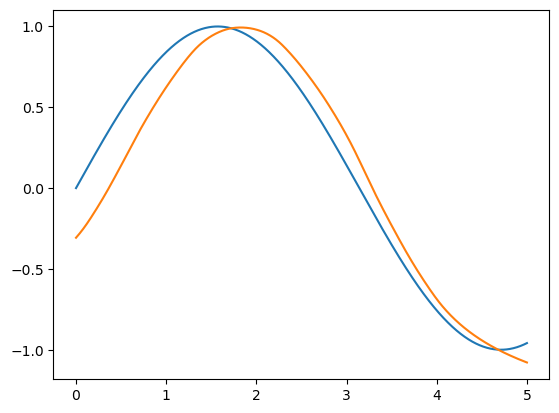

In [36]:
numerical_arguments = {
    0: (1.0,5.0),
    1: (1.0,5.0),
    2: (0.0,5.0)
}
categorical_arguments = {}


In [93]:
colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']
linewidth = 3.0
alpha = 0.5
markersize = 5.0
label_fontsize = 18

In [46]:
def evaluate_shape(shape,t):
    shape.to(torch.device('cpu'))
    t = torch.from_numpy(t).float()
    with torch.no_grad():
        return shape(t).numpy().flatten()

In [63]:
def extract_slope_intercept(shape,arg1,arg2):
    args = np.array([arg1,arg2])
    ys = evaluate_shape(shape,args)
    slope = (ys[1]-ys[0])/(args[1]-args[0])
    intercept = ys[0] - slope * args[0]
    return slope, intercept

In [96]:
def plot_1(ax):
    eq = cd2_df[cd2_df['num_of_shapes'] == 1].sort_values(by='r2_val',ascending=False).iloc[0,0]
    esr_best_1 = load_share_from_checkpoint(timestamp, eq, checkpoint_dir='checkpoints', task='regression',n_features=3)

    s3 = esr_best_1._program.model.shape_functions[0]

    t = np.linspace(0,5,1000)
    ax.plot(t,np.sin(t),'-', c=colors[0], markersize=markersize,linewidth=linewidth, alpha=alpha, label=r'$\sin$')
    ax.plot(t,evaluate_shape(s3,t),c=colors[1],linewidth=linewidth, alpha=alpha, label=r"$s_3$")
    ax.set_xlabel(r'$\theta$', fontsize=label_fontsize)
    ax.set_ylabel("Value", fontsize=label_fontsize)
    # plt.xscale('log')
    ax.legend(fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=15)
    
    # plt.show()
#     plt.savefig("torque_s3.pdf")

    # esr_best_1._program.plot_shape_functions(numerical_arguments,categorical_arguments)


mul(mul(X0, shape(X2)), X1)


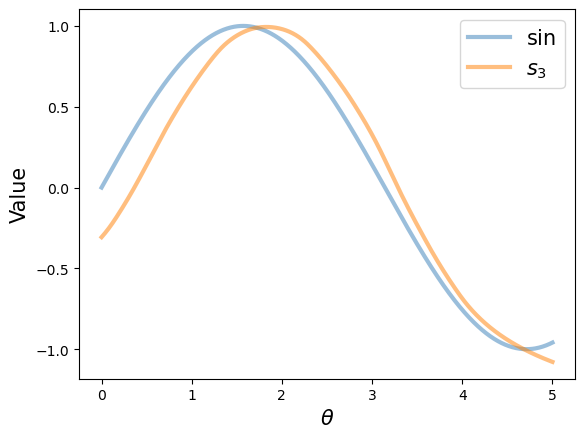

In [71]:
fig, ax = plt.subplots(1,1)
plot_1(ax)
plt.show()

In [97]:
def plot_2(ax):
    eq = cd2_df[cd2_df['num_of_shapes'] == 3].sort_values(by='r2_val',ascending=False).iloc[0,0]
    esr_best_3 = load_share_from_checkpoint(timestamp, eq, checkpoint_dir='checkpoints', task='regression',n_features=3)
    print(esr_best_3)
    s1 = esr_best_3._program.model.shape_functions[0]
    s2 = esr_best_3._program.model.shape_functions[2]
    s3 = esr_best_3._program.model.shape_functions[1]

    t = np.linspace(0,5,1000)
    # plt.plot(t,np.sin(t),'-', c=colors[0], markersize=markersize,linewidth=linewidth, alpha=alpha, label=r'$\sin$')
    ax.plot(t,evaluate_shape(s1,t),c=colors[2],linewidth=linewidth, alpha=alpha, label=r"$s_1$")
    ax.plot(t,evaluate_shape(s2,t),c=colors[3],linewidth=linewidth, alpha=alpha, label=r"$s_2$")
    ax.plot(t,evaluate_shape(s3,t),c=colors[1],linewidth=linewidth, alpha=alpha, label=r"$s_3$")
    ax.set_xlabel(r'$r$ / $F$ / $\theta$', fontsize=label_fontsize)
    ax.set_ylabel("Value", fontsize=label_fontsize)
    # plt.xscale('log')
    ax.legend(fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=15)
#     plt.show()
    # plt.savefig("torque_s3.pdf")

    # esr_best_1._program.plot_shape_functions(numerical_arguments,categorical_arguments)

    a1, b1 = extract_slope_intercept(s1,1,5)
    a2, b2 = extract_slope_intercept(s2,1,5)
    print(a1,b1,a2,b2)

In [88]:
def plot_3(ax):
    eq = cd2_df[cd2_df['num_of_shapes'] == 2].sort_values(by='r2_val',ascending=False).iloc[0,0]
    esr_best_3 = load_share_from_checkpoint(timestamp, eq, checkpoint_dir='checkpoints', task='regression',n_features=3)
    print(esr_best_3)
    s1 = esr_best_3._program.model.shape_functions[1]
    s3 = esr_best_3._program.model.shape_functions[0]

    t = np.linspace(0,5,1000)
    # plt.plot(t,np.sin(t),'-', c=colors[0], markersize=markersize,linewidth=linewidth, alpha=alpha, label=r'$\sin$')
    ax.plot(t,evaluate_shape(s1,t),c=colors[2],linewidth=linewidth, alpha=alpha, label=r"$s_1$")
#     ax.plot(t,evaluate_shape(s2,t),c=colors[3],linewidth=linewidth, alpha=alpha, label=r"$s_2$")
    ax.plot(t,evaluate_shape(s3,t),c=colors[1],linewidth=linewidth, alpha=alpha, label=r"$s_3$")
    ax.set_xlabel(r'$r$ / $\theta$', fontsize=label_fontsize)
    ax.set_ylabel("Value", fontsize=label_fontsize)
    # plt.xscale('log')
    ax.legend(fontsize=label_fontsize)
#     plt.show()
    # plt.savefig("torque_s3.pdf")

    # esr_best_1._program.plot_shape_functions(numerical_arguments,categorical_arguments)

    a1, b1 = extract_slope_intercept(s1,1,5)
#     a2, b2 = extract_slope_intercept(s2,1,5)
    print(a1,b1)

mul(mul(X0, shape(X2)), X1)
mul(mul(X0, shape(X2)), X1)
mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1))
mul(mul(shape(X0), shape(X2)), shape(X1))
-0.1994013637304306 -0.5565366297960281 0.3416445255279541 0.776421308517456


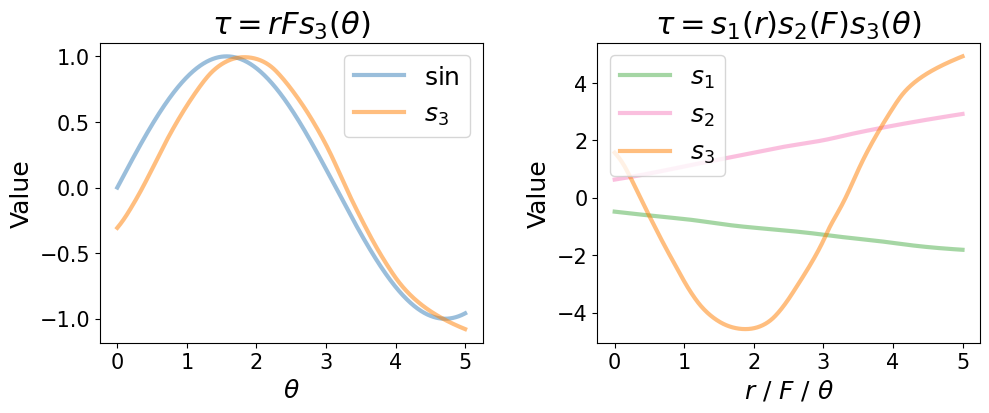

In [113]:
title_fontsize = 22
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
plot_1(ax1)
plot_2(ax2)
ax1.title.set_text(r"$\tau = r F s_3(\theta)$")
ax2.title.set_text(r"$\tau = s_1(r) s_2(F) s_3(\theta) $")
ax1.title.set_fontsize(title_fontsize)
ax2.title.set_fontsize(title_fontsize)
plt.subplots_adjust(left=0.10, bottom=0.15, right=0.98, top=0.9, wspace=0.3, hspace=None)
plt.show()
# plt.savefig('torque_two_plots.pdf')

mul(mul(shape(X2), X1), shape(X0))
{0: (0.0, 5.0), 1: (1.0, 5.0)}


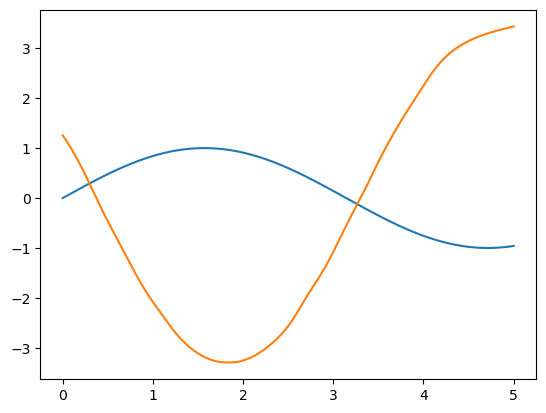

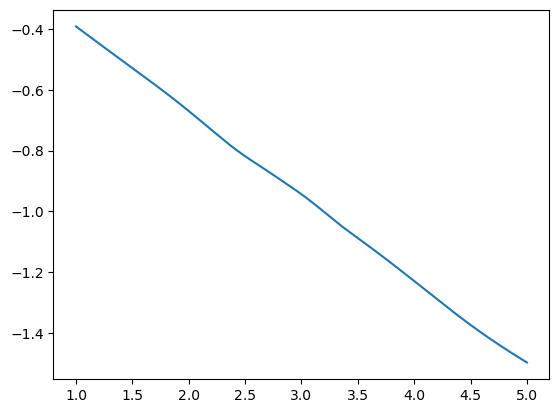

In [38]:
eq = cd2_df[cd2_df['num_of_shapes'] == 2].sort_values(by='r2_val',ascending=False).iloc[0,0]
esr_best_1 = load_share_from_checkpoint(timestamp, eq, checkpoint_dir='checkpoints', task='regression',n_features=3)
    
t = np.linspace(0,5,1000)
plt.plot(t,np.sin(t))
esr_best_1._program.plot_shape_functions(numerical_arguments,categorical_arguments)


In [29]:
numerical_arguments = {
    0: (1.0,5.0),
    1: (1.0,5.0),
    2: (0.0,5.0)
}
categorical_arguments = {}

{1: (1.0, 5.0), 0: (6.9323625564575195, 169.95281219482422), 2: (0.0, 5.0)}


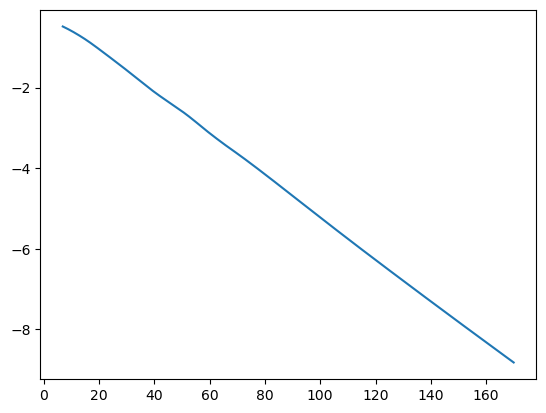

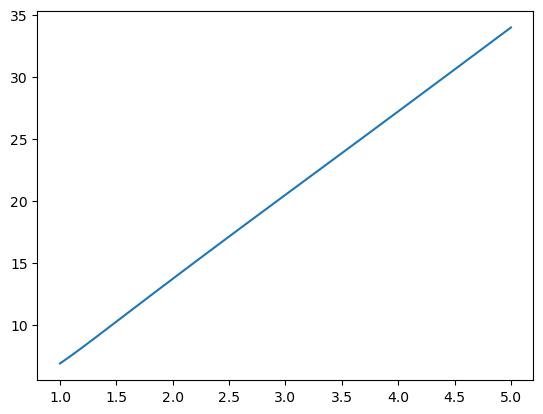

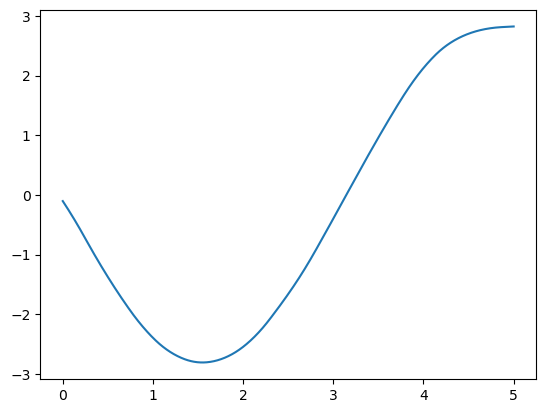

In [46]:
share2._program.plot_shape_functions(numerical_arguments, categorical_arguments)

In [26]:
from gplearn.gplearn.functions import _function_map
from gplearn.gplearn.fitness import _fitness_map
from gplearn.gplearn.utils import check_random_state
from gplearn.gplearn._program import _Program
from datetime import datetime


global_seed = 0
task='regression'

timestamp = datetime.now().strftime("%Y-%m-%dT%H.%M.%S")
constructor_dict_ShapeNN = {
        'n_hidden_layers':5,
        'width':10,
        'activation_name':'ELU'
        }

program_config = {
'function_set' : [_function_map['add'],_function_map['sub'],_function_map['mul'],_function_map['div'],_function_map['shape']],
'arities' : {1: [_function_map['shape']], 2: [_function_map['add'],_function_map['sub'],_function_map['mul'],_function_map['div']]},
'init_depth' : (2,5),
'init_method' : 'half and half',
'n_features' : 3,
'const_range' : None,
'metric' : _fitness_map['mse'],
'p_point_replace' : 0.2,
'parsimony_coefficient' : 0.0,
'random_state': check_random_state(global_seed+1),
'optim_dict': {
        'alg':'adam',
        'lr': 1e-2,
        'max_n_epochs':1000,
        'tol':1e-3,
        'n_iter_no_change':10,
        'task':task,
        'device':'cpu',
        'batch_size':1024,
        'shape_class':ShapeNN,
        'constructor_dict': constructor_dict_ShapeNN,
        'num_workers_dataloader': 0,
        'seed':2,
        },
'timestamp':timestamp
}

# for i in range(10):
#     program = _Program(**program_config)
#     print(program)
program_list = [_function_map['mul'],_function_map['mul'],0,1,_function_map['shape'],2]
# program_list = [_function_map['shape'],_function_map['add'],_function_map['div'],0,1,_function_map['shape'],2]
# program_list = [_function_map['shape'],_function_map['div'],_function_map['add'],0,_function_map['shape'],2,1]
# shape(div(add(X0, shape(X2)), X1))
program = _Program(**program_config, program=program_list)

In [27]:
device = torch.device('cpu')
# params['ohe_matrices'] = self._create_ohe_matrices(X,self.categorical_variables, device=device)

X_t = torch.from_numpy(np.array(X)).float().to(device)
y_t = torch.from_numpy(np.array(y)).float().to(device)
program.raw_fitness(X_t,y_t,sample_weight=np.ones(X_t.shape[0]),ohe_matrices={})

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
Missing logger folder: tb_logs\2023-01-24T03.02.48/mul(mul(X0, X1), shape(X2))


mul(mul(X0, X1), shape(X2))


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\trainer.py:1600: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 96 steps due to diverging loss.
Learning rate set to 0.030199517204020192
Restoring states from the checkpoint path at lightning_logs\.lr_find_1fa1b711-2ae8-493c-9511-da475db10d4a.ckpt
Restored all states from the checkpoint file at lightning_logs\.lr_find_1fa1b711-2ae8-493c-9511-da475db10d4a.ckpt
C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


mul(mul(X0, X1), shape(X2))
mul(mul(X0, X1), shape(X2)) | raw_fitness: 0.004828390635522296


C:\Users\krkac\Miniconda3\envs\share\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


0.004828390635522296